<a href="https://colab.research.google.com/github/ojan0319/prediksiRumah/blob/main/Prediksi_rumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data loading, data check-ups and wrangling
import pandas as pd
import numpy as np

# Data exploration - graphical presentations and analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm
from scipy import stats

# Feature engineering and data wrangling
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE

# Machine learning
from sklearn import preprocessing
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Read train data
import os;
os.listdir('..')

train_df = pd.read_csv('/content/train.csv')
# Read test data
test_df = pd.read_csv('/content/test.csv')

In [ ]:
# Check the sizes of the train and test data sets
print("Train data set size:", train_df.shape)
print("Test data set size:", test_df.shape)

Train data set size: (1460, 81)
Test data set size: (1459, 80)


In [ ]:
# Check the first five values of the train data set
train_df.head().style.background_gradient(axis=0, gmap=train_df['SalePrice'], cmap='Greens')

In [ ]:
test_df.head().style.background_gradient(axis=0, gmap=train_df['SalePrice'], cmap='Blues')

In [ ]:
test_df.tail().style.background_gradient(axis=0, gmap=train_df['SalePrice'], cmap='Blues')

In [ ]:
# Identify the train data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Separate the data set to include numerical data only
numerical_df = train_df.select_dtypes(include=[np.number])
numerical_df = numerical_df.drop(['Id'], axis = 1)

# Show the first five values of the numerical data
numerical_df.head().style.background_gradient(axis=0, gmap=train_df['SalePrice'], cmap='Greens')

In [ ]:
# Identify the titles of numerical features
numerical_features = numerical_df.columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
# Separate the data set to include categorical data only
categorical_df = train_df.select_dtypes(exclude=[np.number])

# Show the first five values of the categorical data
categorical_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [ ]:
# Identify the titles of categorical features
categorical_features = categorical_df.columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# Check the statistics in the numerical data set
numerical_df.describe().T.style.background_gradient(cmap = "Greens") 

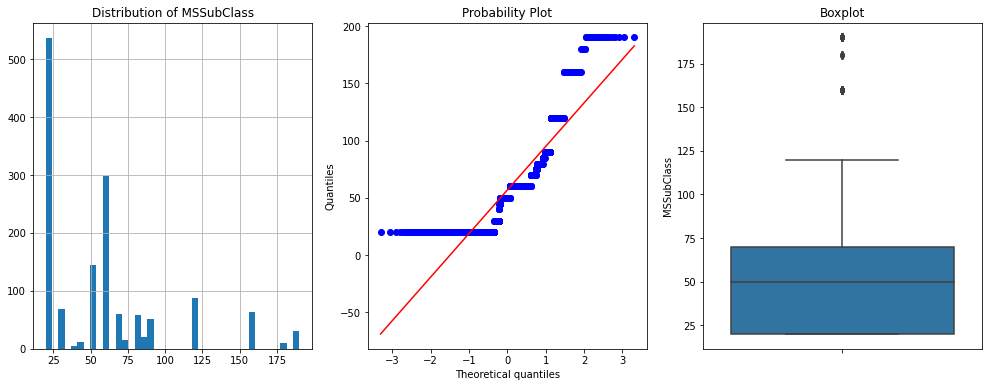

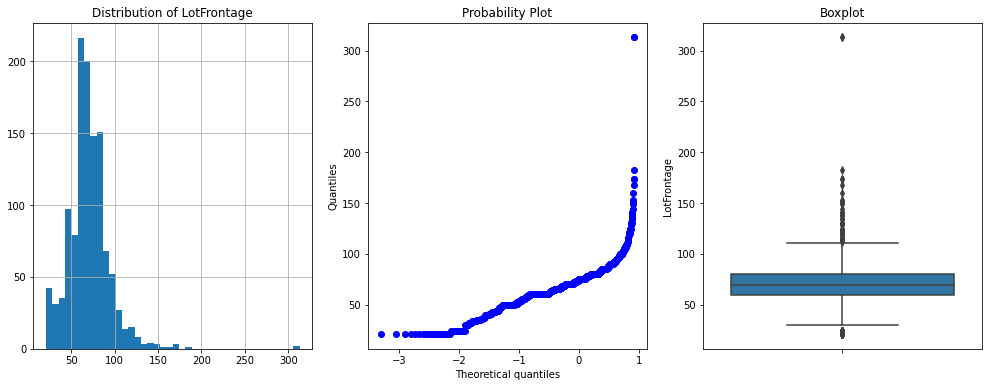

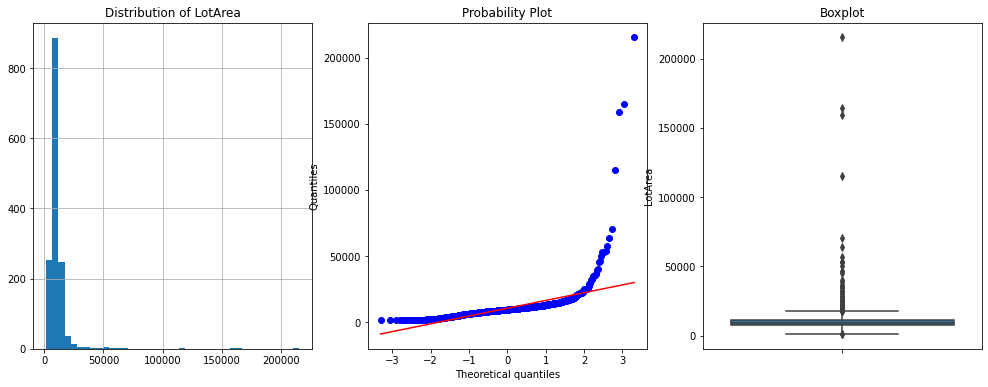

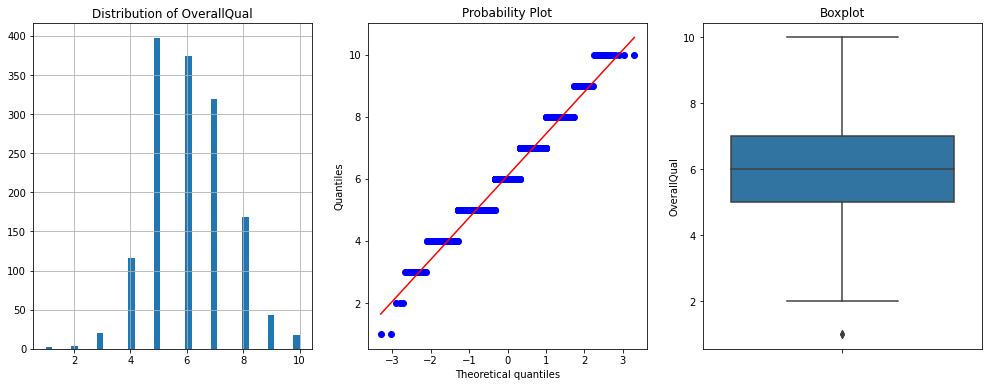

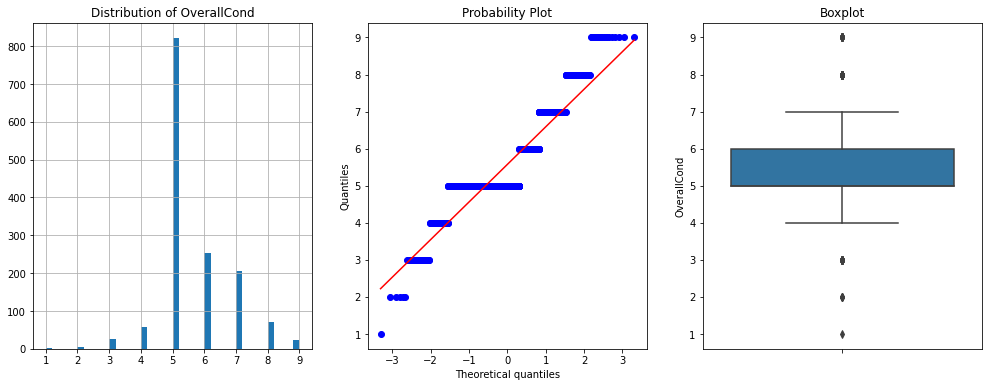

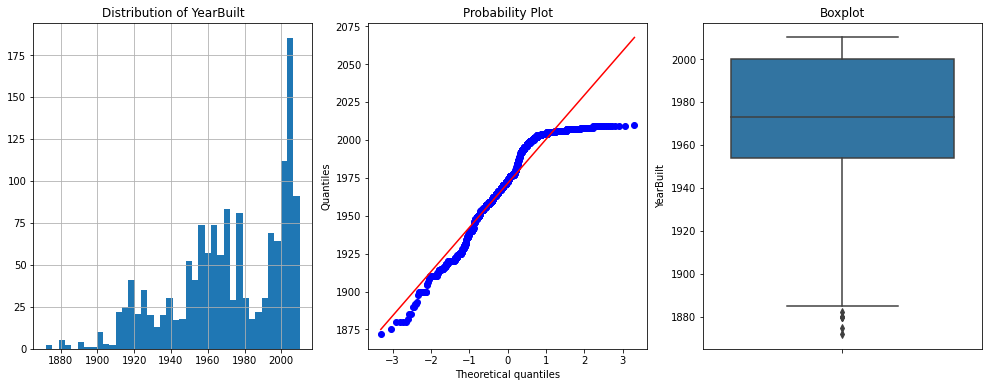

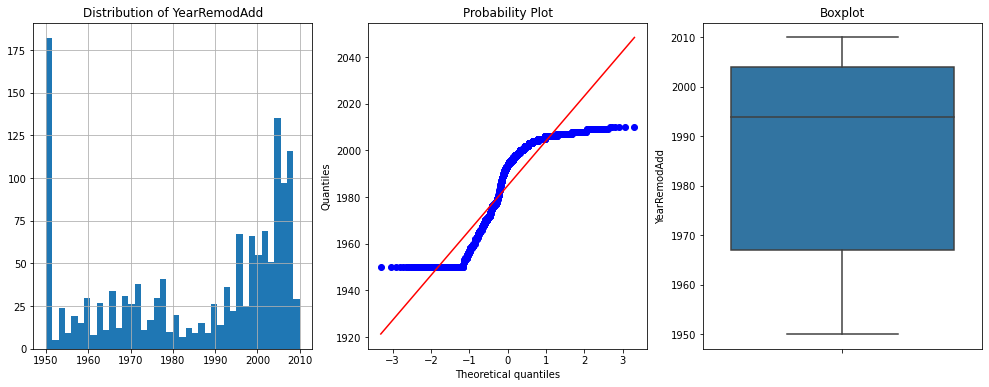

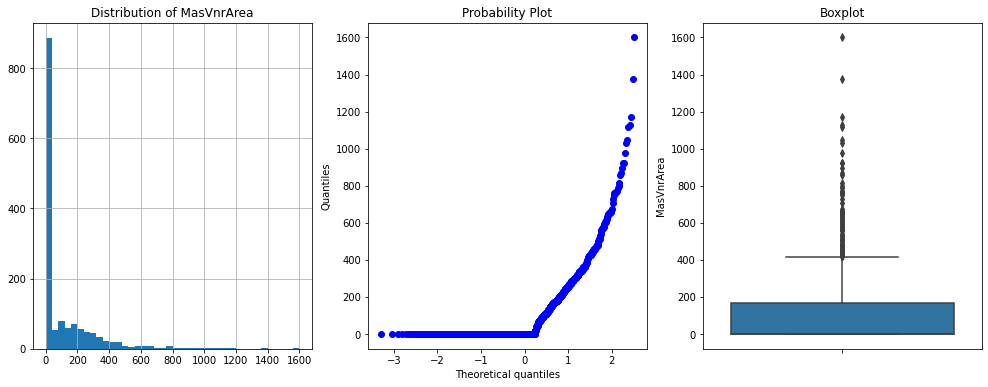

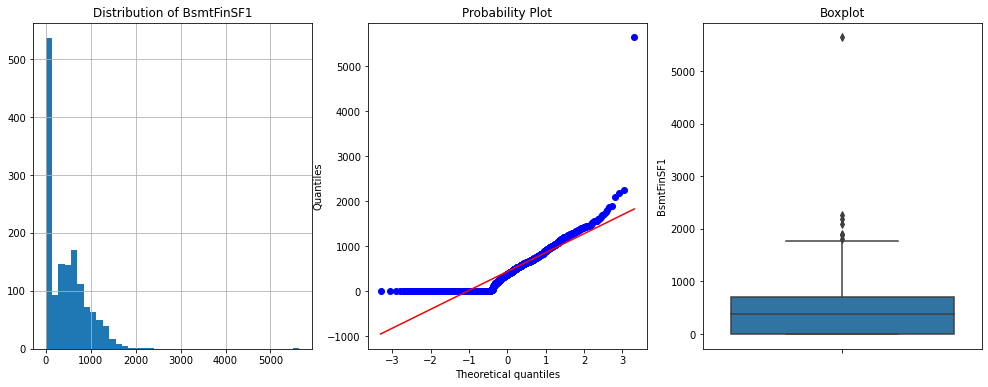

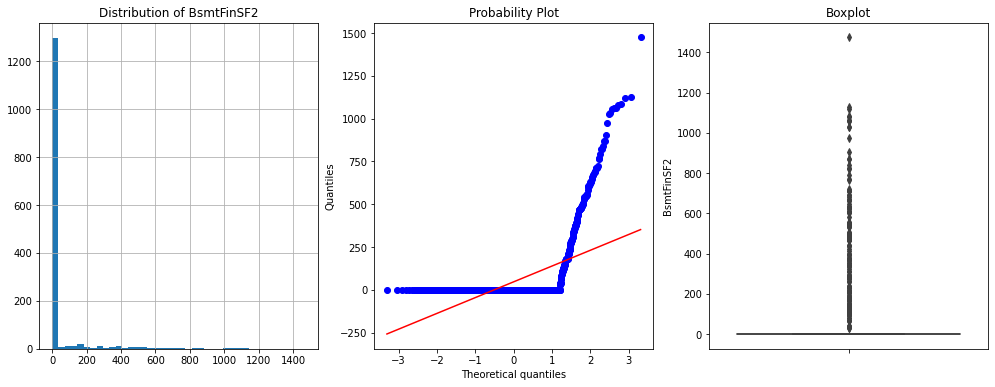

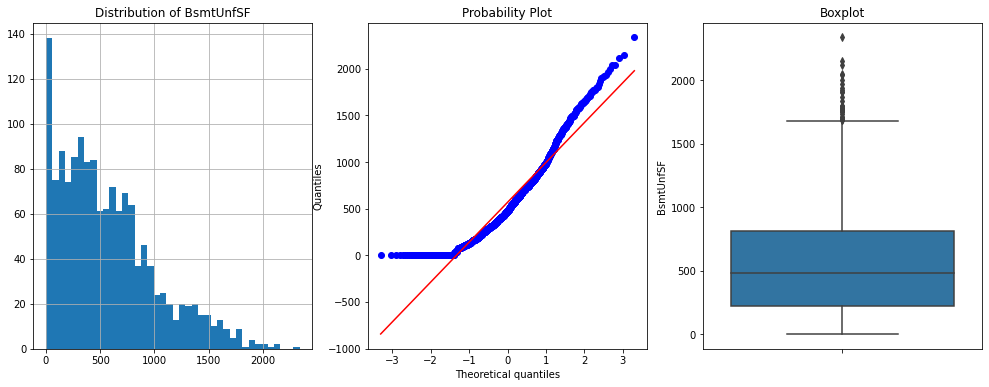

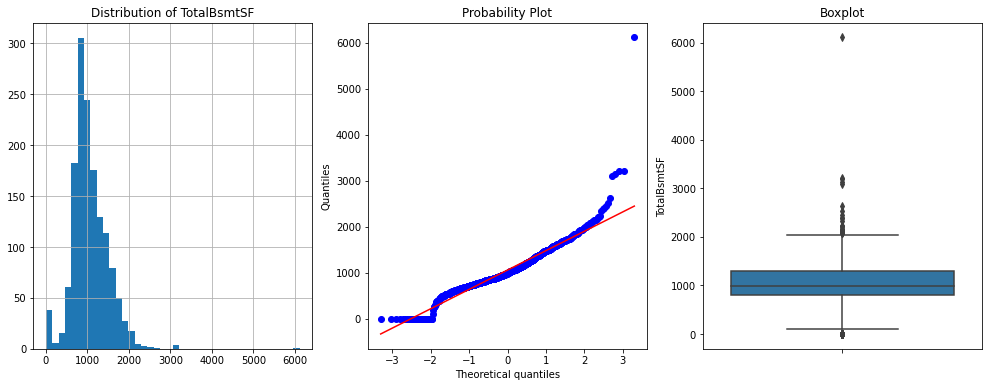

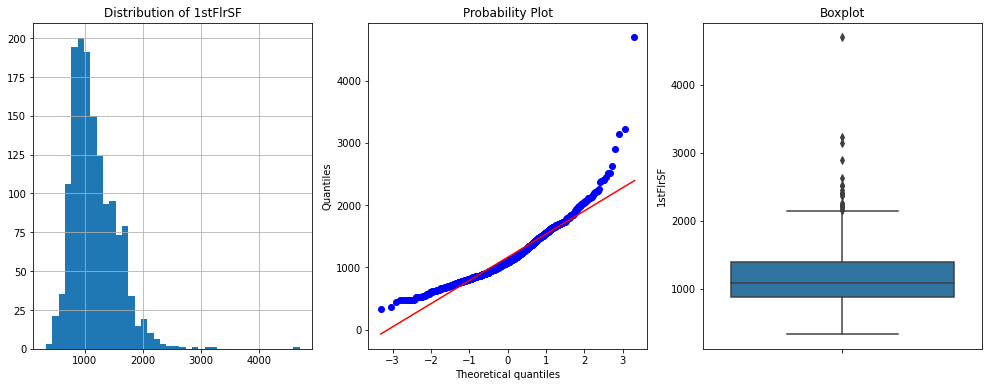

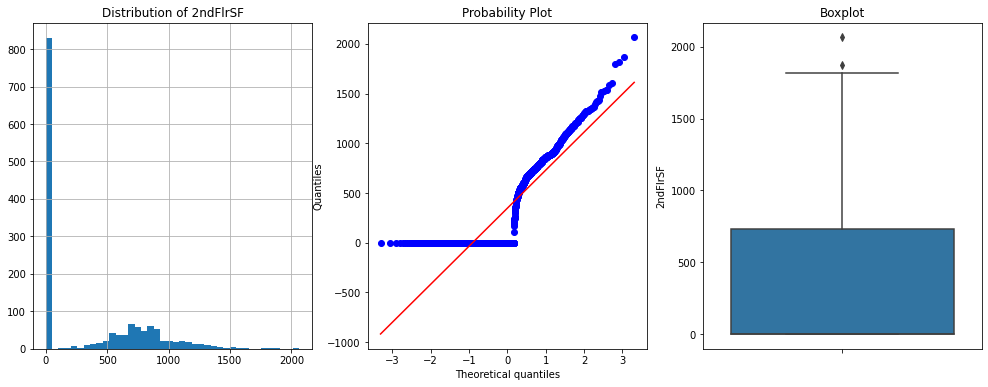

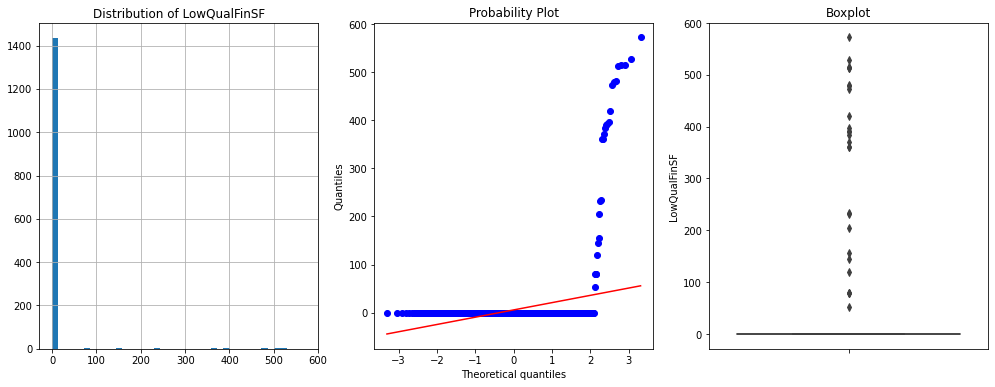

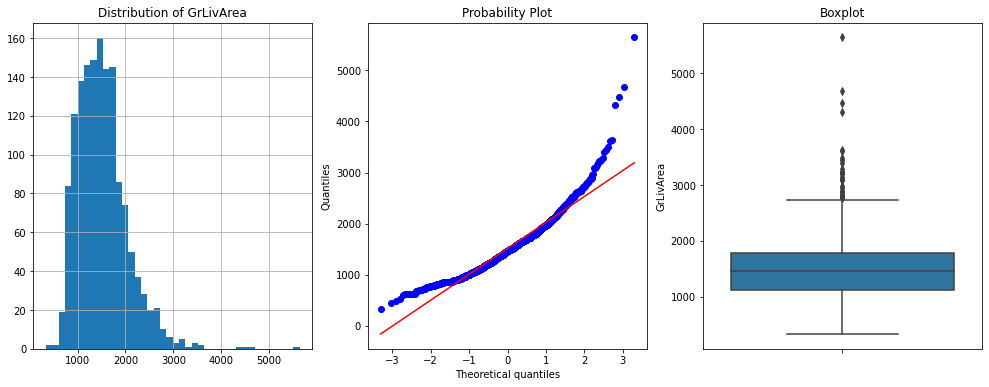

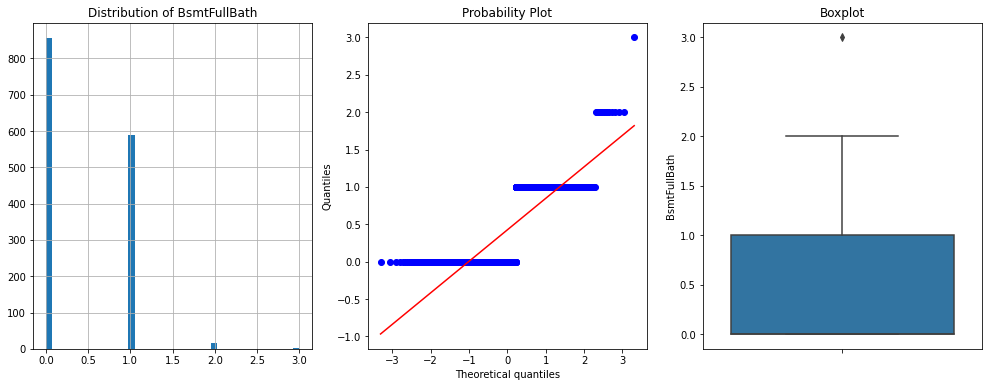

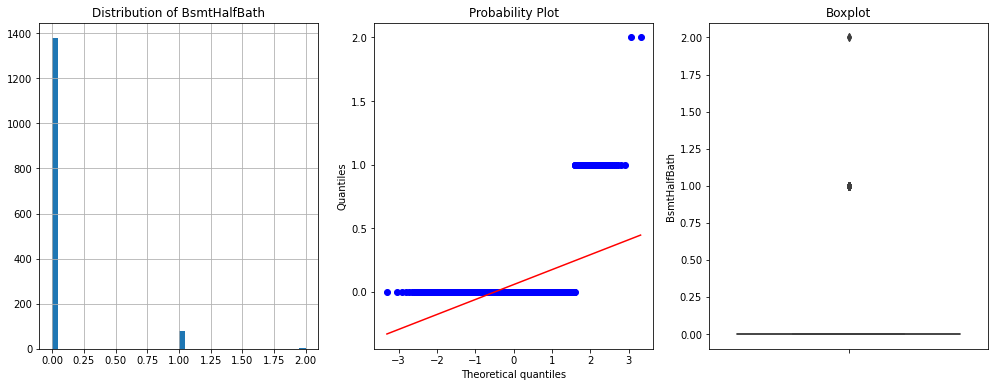

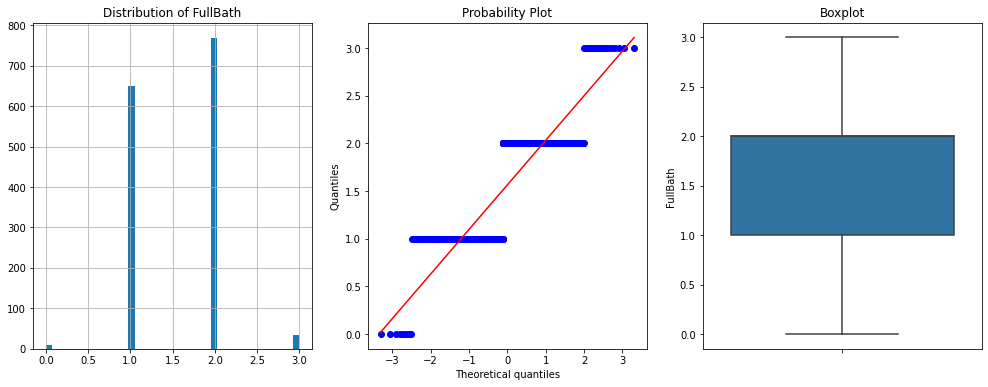

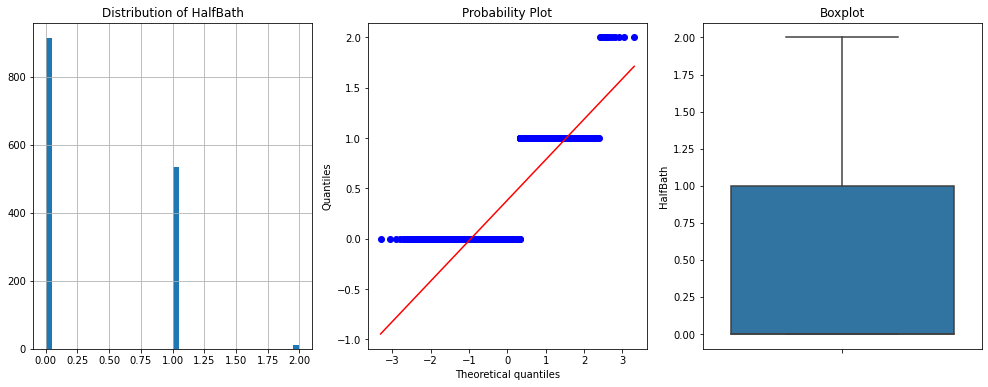

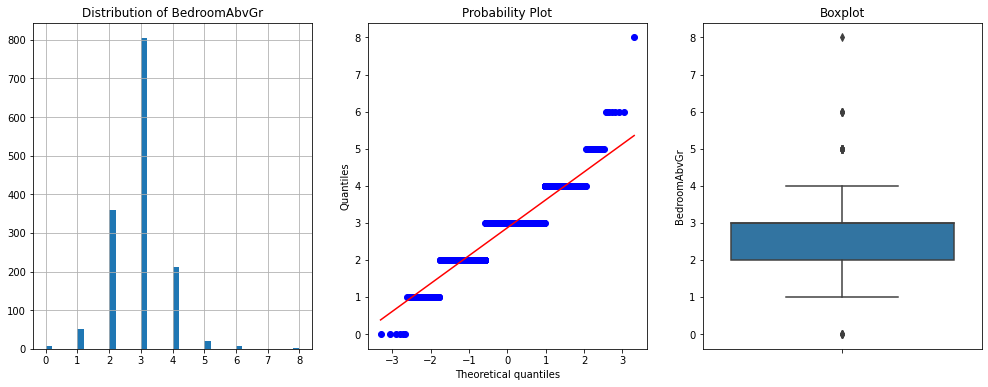

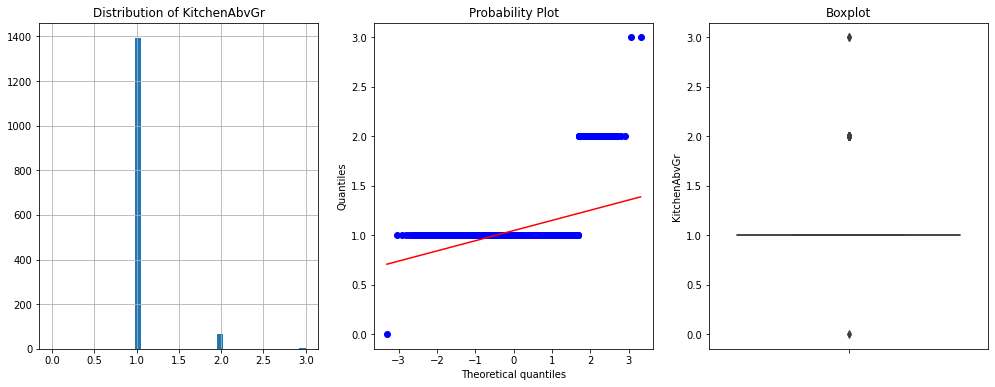

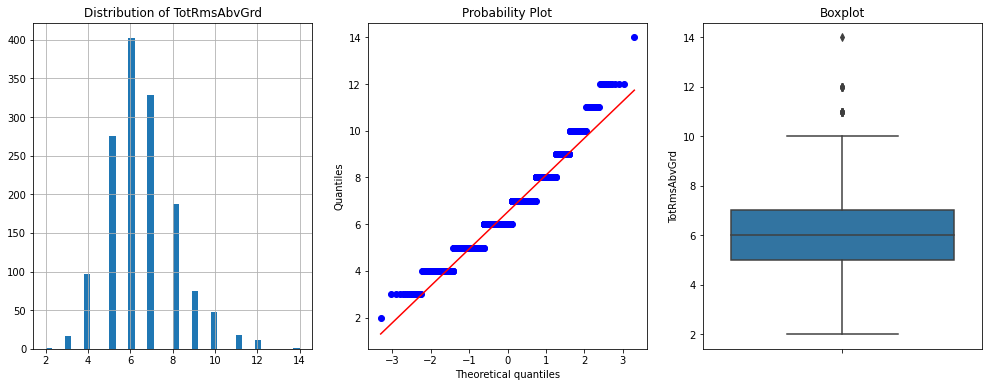

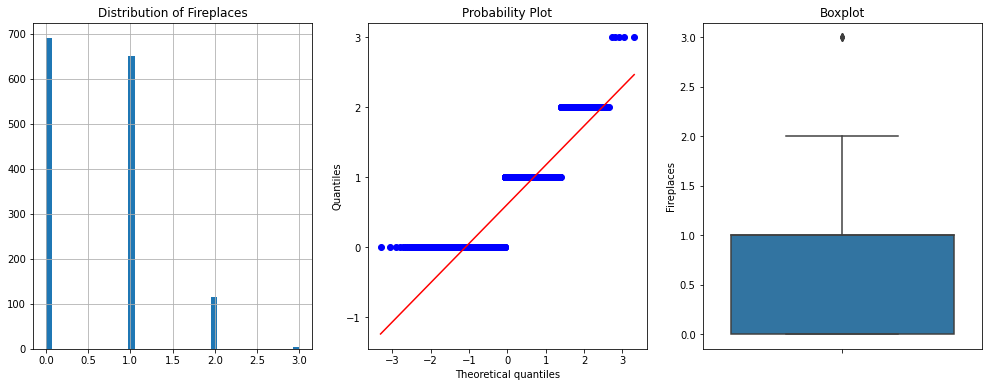

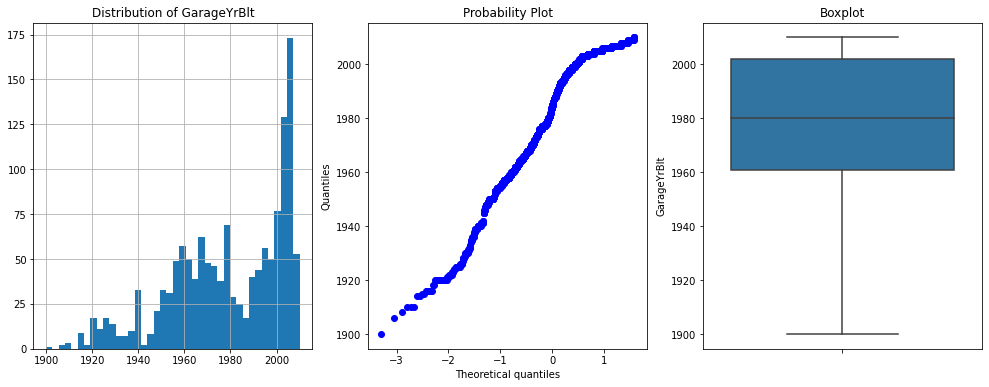

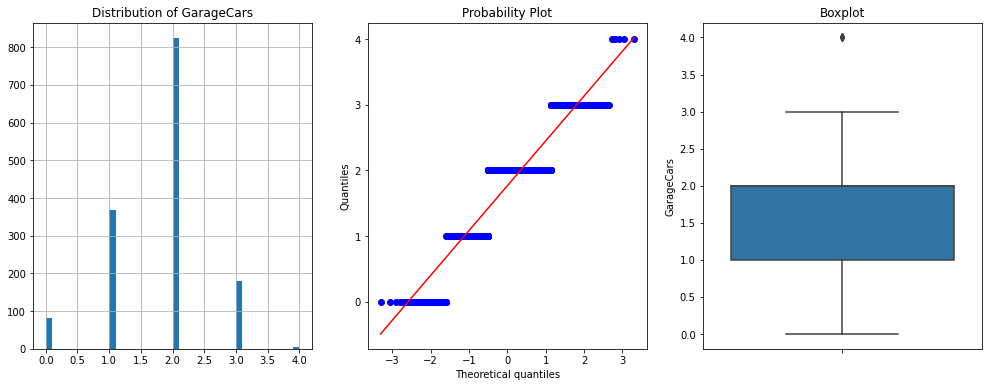

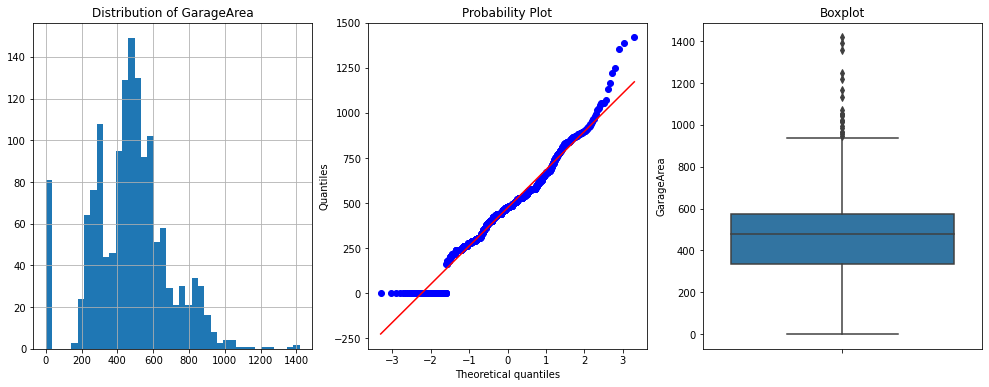

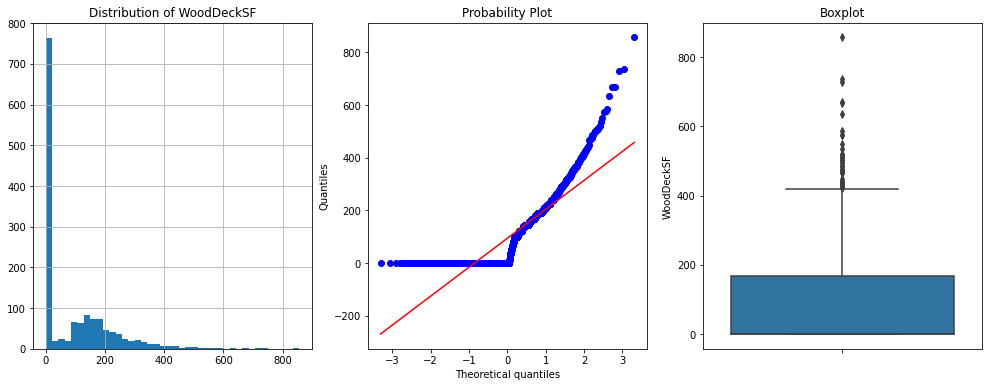

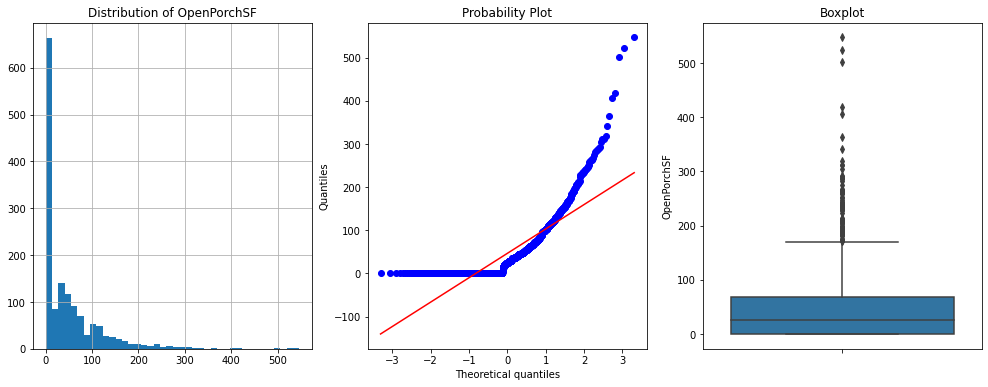

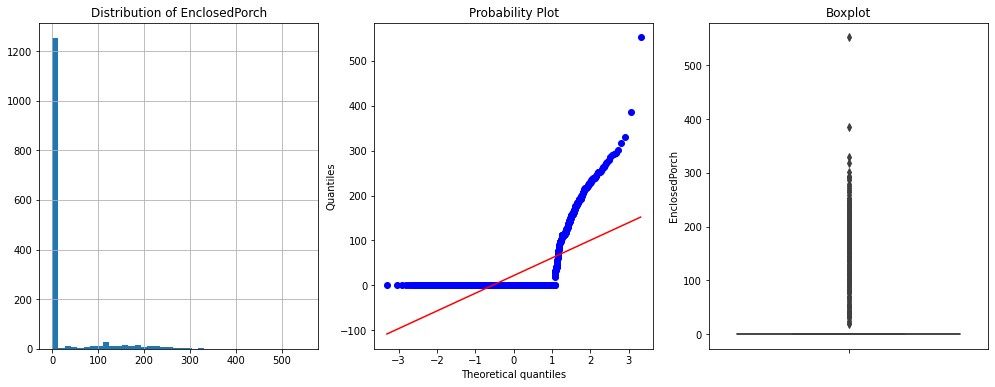

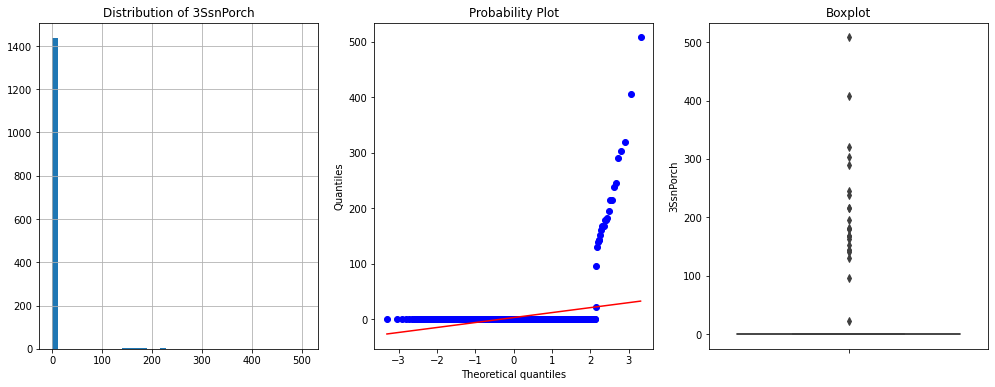

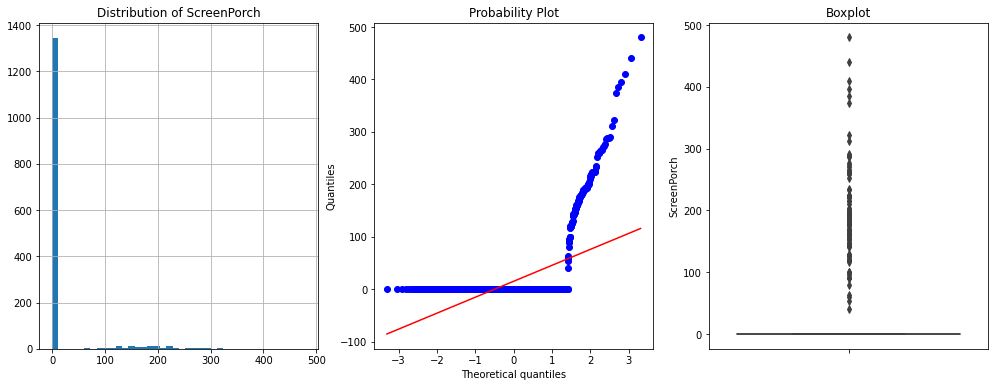

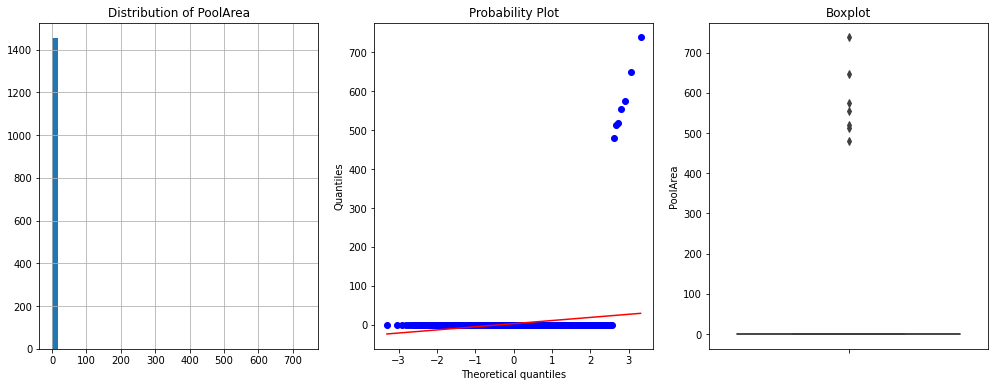

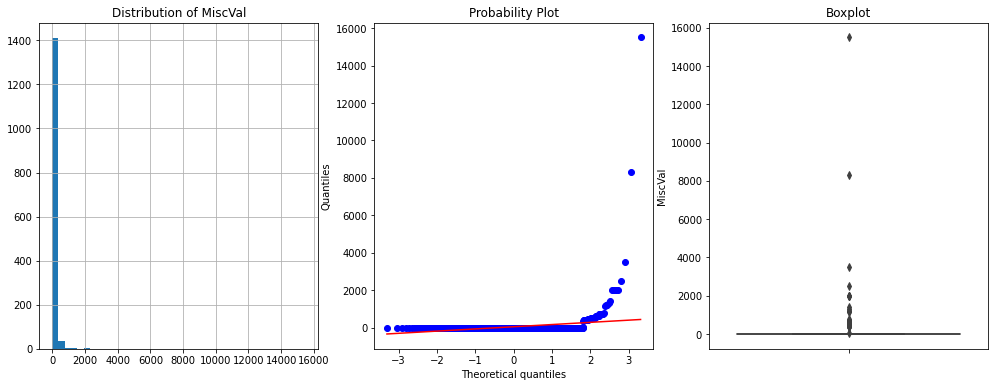

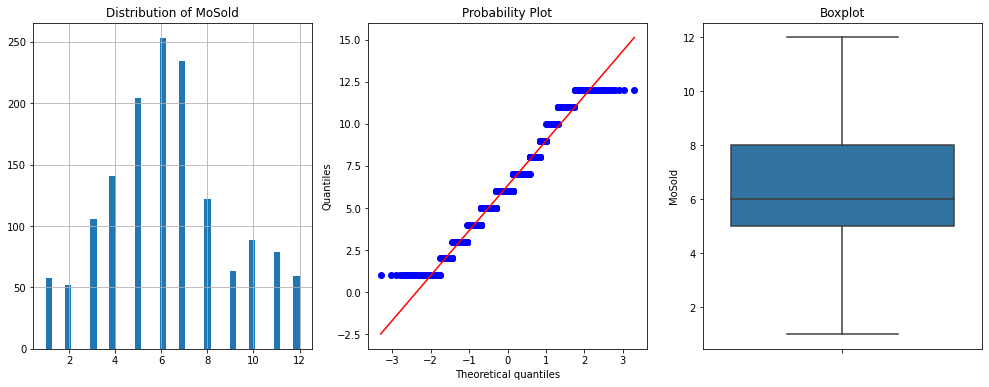

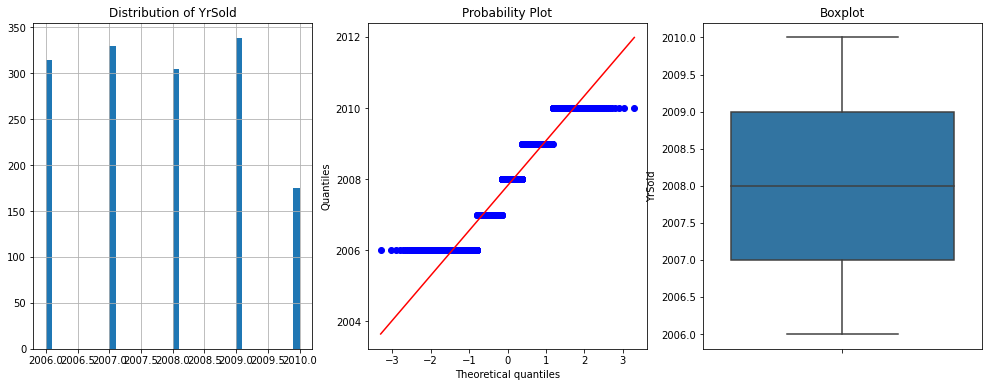

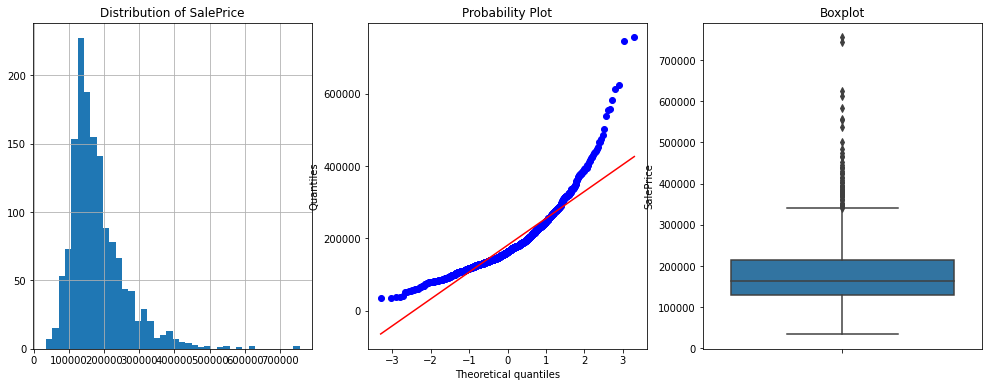

In [ ]:
# Check the distbution of the variables in the numerical data

def num_plot(df, var):
    fig = plt.figure(figsize = (17, 6))
    plt.subplot(1,3,1)
    df[var].hist(bins = 40)
    plt.title(f"Distribution of {var}")
    
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist = "norm", plot = plt)
    plt.ylabel('Quantiles')
    
    plt.subplot(1,3,3)
    sns.boxplot(y = df[var])
    plt.title("Boxplot")
    plt.show()
    
for var in numerical_df:
    num_plot(train_df, var)

In [ ]:
# Calculation of skewness and curtosis to validate the discussions above
for var in numerical_df:
    skewness = train_df[var].skew()
    if skewness > 0:
        print(f"{var} is positively skewed.")
    else:
        print(f"{var} is negatively skewed.")
    kurtosis = train_df[var].kurt()
    if kurtosis > 3:
        print(f"And {var} is also leptokurtic and may produce outliers rather than a normal distribution. \n")
    elif kurtosis < 3:
        print(f"And {var} is also playkurtic.\n")
    else:
        print(f"And {var} also has a normal distribution.")

MSSubClass is positively skewed.
And MSSubClass is also playkurtic.

LotFrontage is positively skewed.
And LotFrontage is also leptokurtic and may produce outliers rather than a normal distribution. 

LotArea is positively skewed.
And LotArea is also leptokurtic and may produce outliers rather than a normal distribution. 

OverallQual is positively skewed.
And OverallQual is also playkurtic.

OverallCond is positively skewed.
And OverallCond is also playkurtic.

YearBuilt is negatively skewed.
And YearBuilt is also playkurtic.

YearRemodAdd is negatively skewed.
And YearRemodAdd is also playkurtic.

MasVnrArea is positively skewed.
And MasVnrArea is also leptokurtic and may produce outliers rather than a normal distribution. 

BsmtFinSF1 is positively skewed.
And BsmtFinSF1 is also leptokurtic and may produce outliers rather than a normal distribution. 

BsmtFinSF2 is positively skewed.
And BsmtFinSF2 is also leptokurtic and may produce outliers rather than a normal distribution. 

Bsm

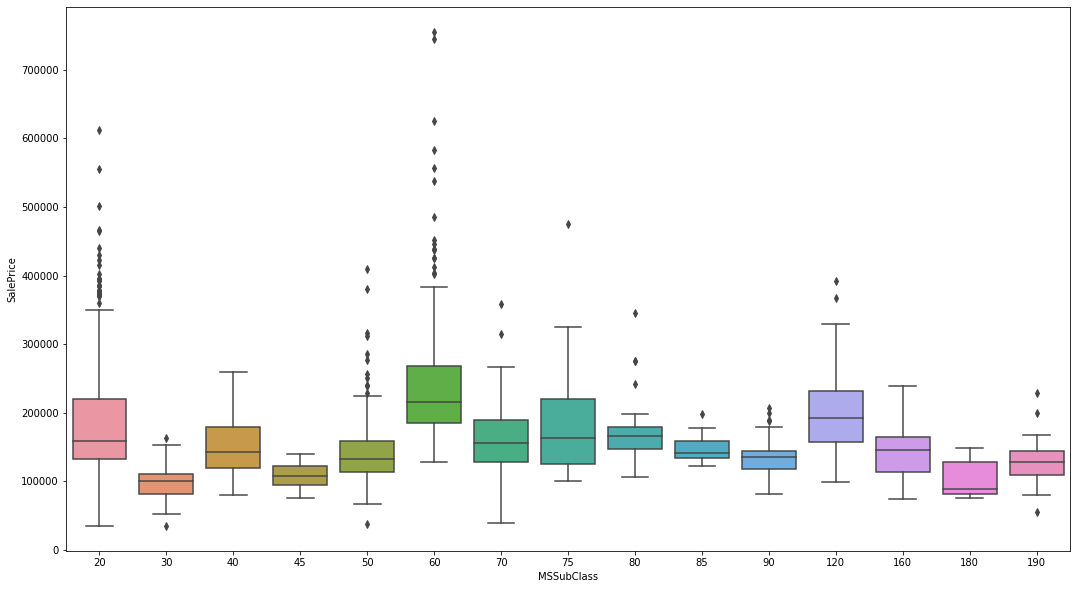

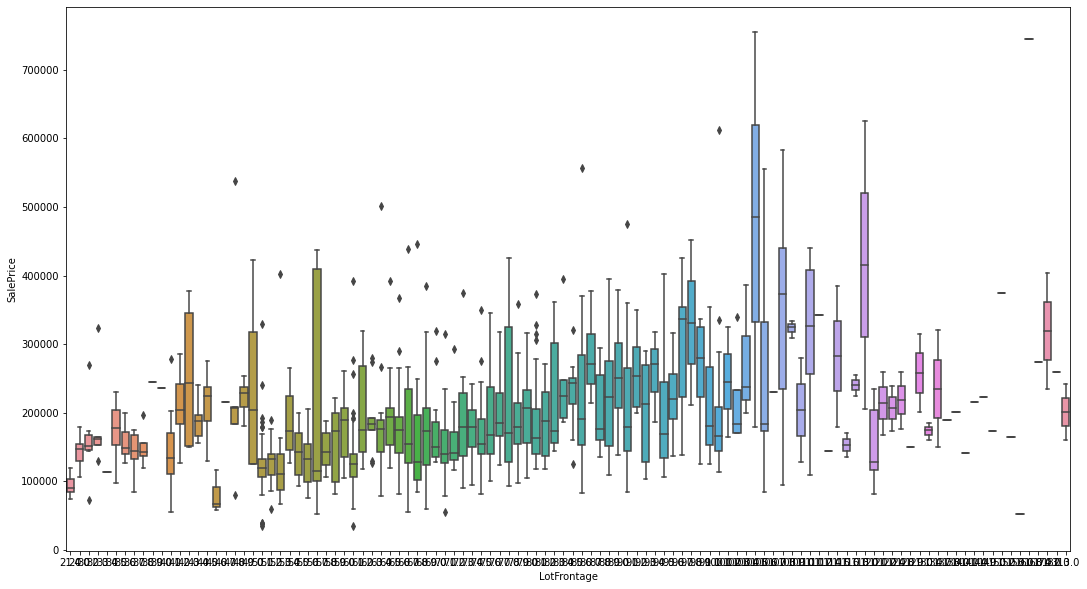

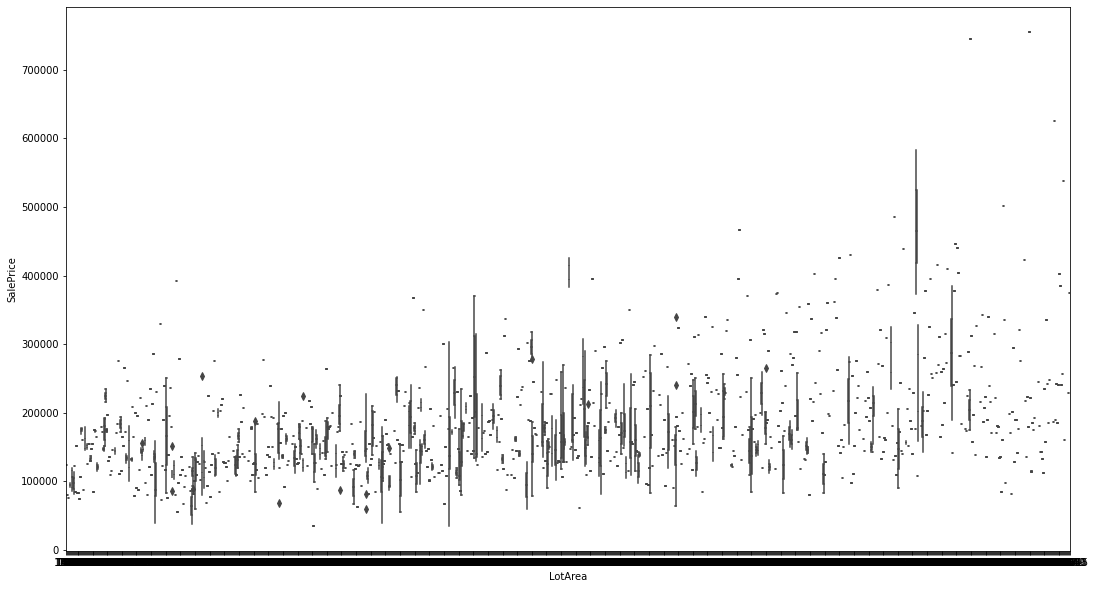

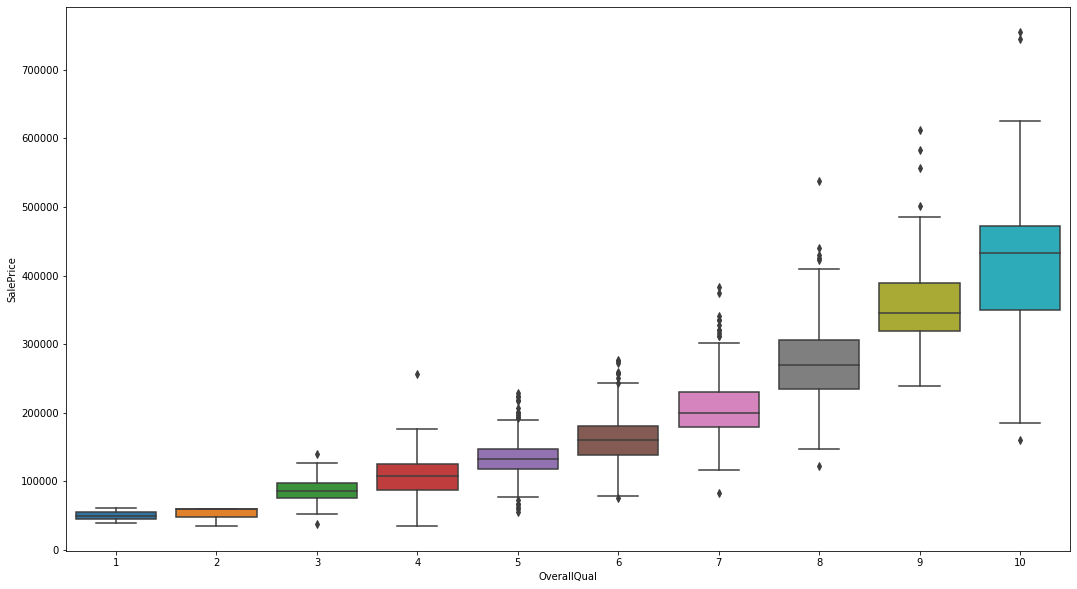

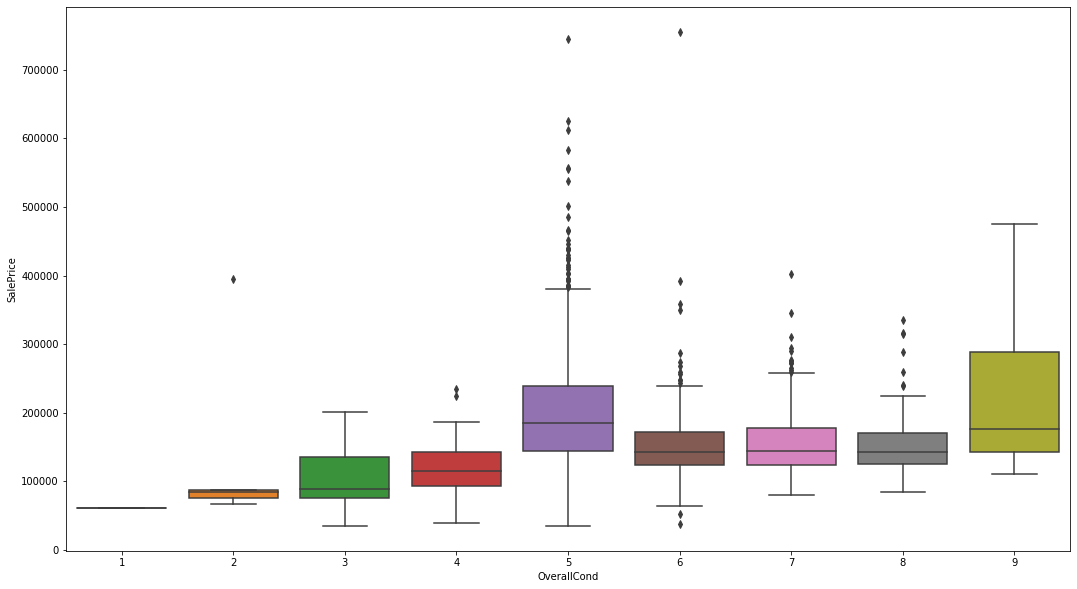

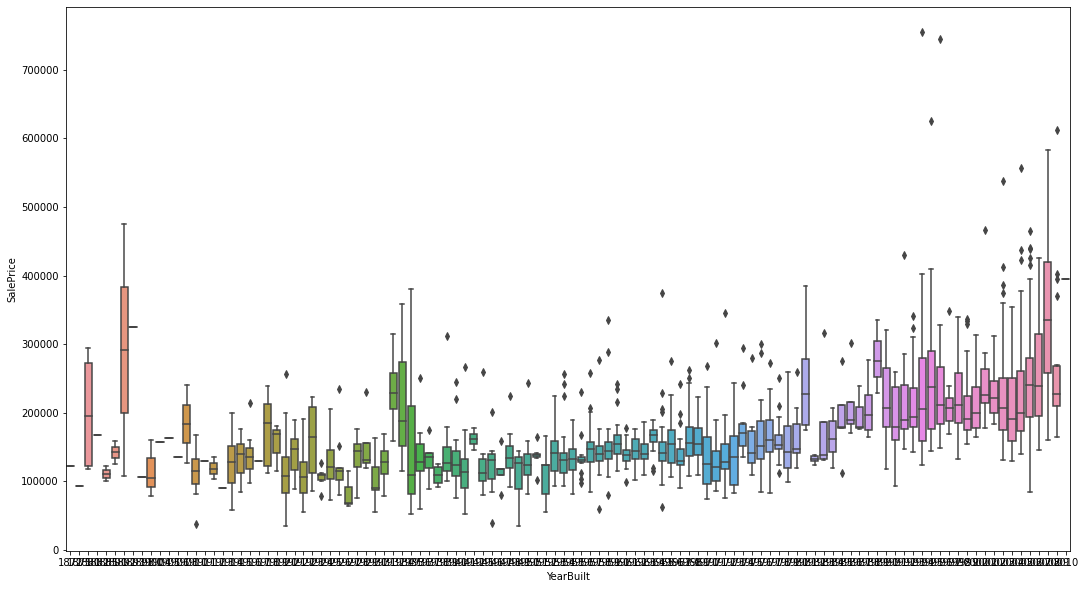

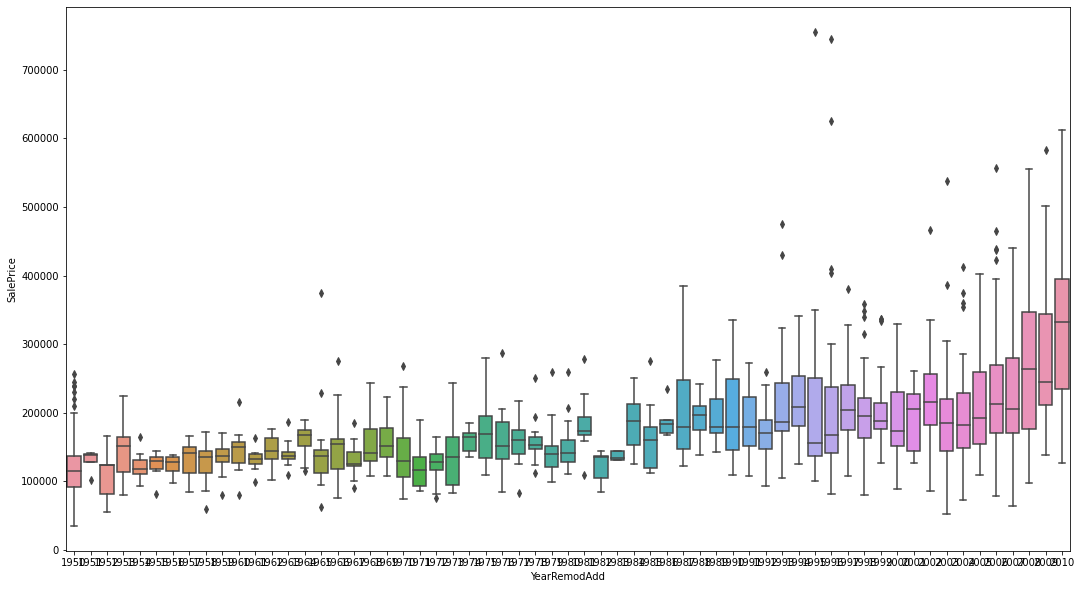

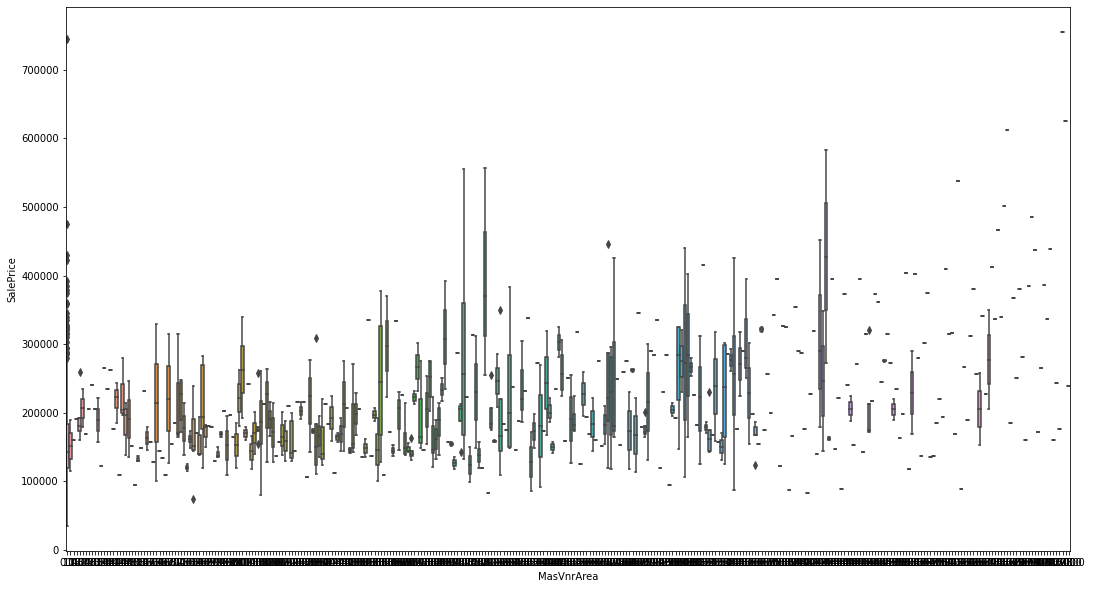

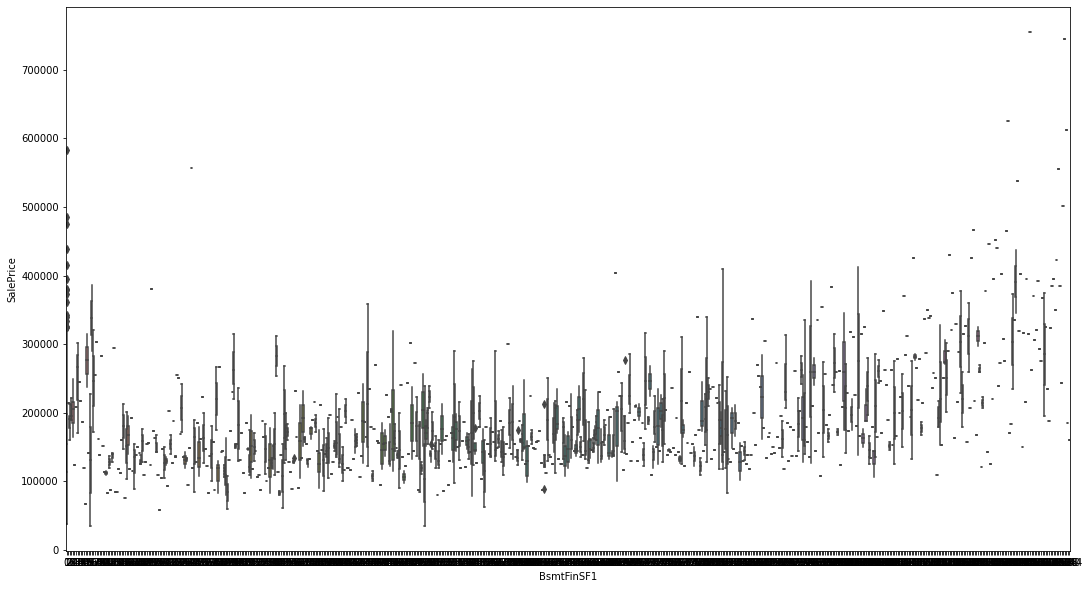

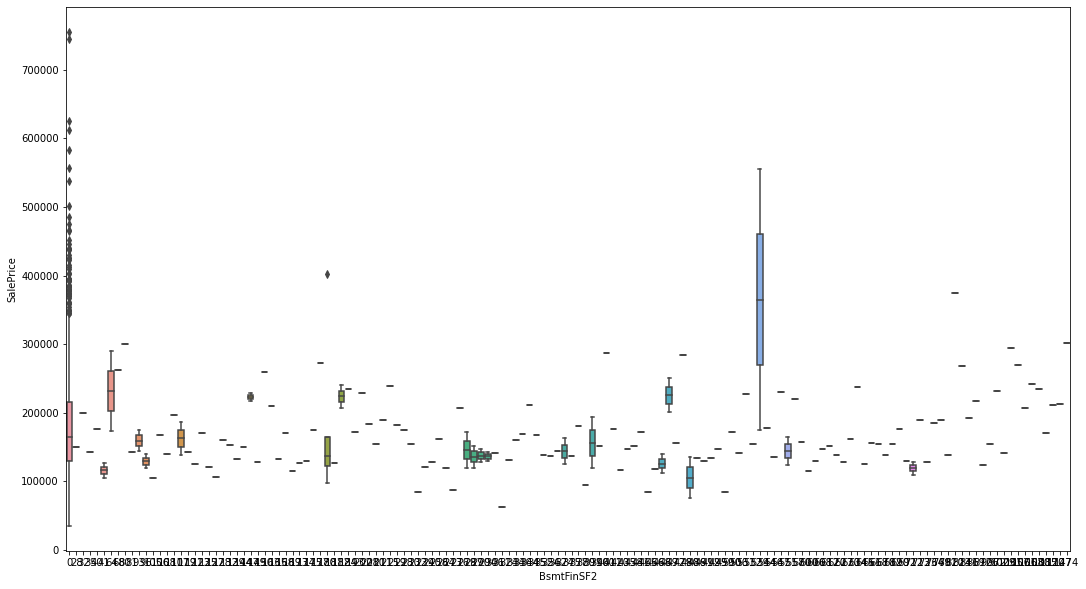

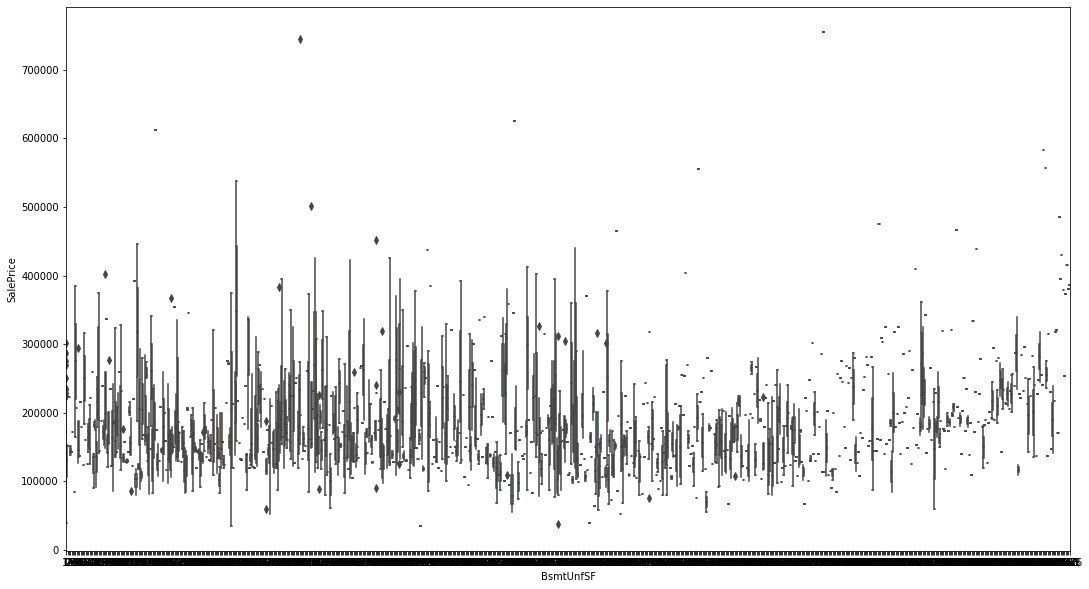

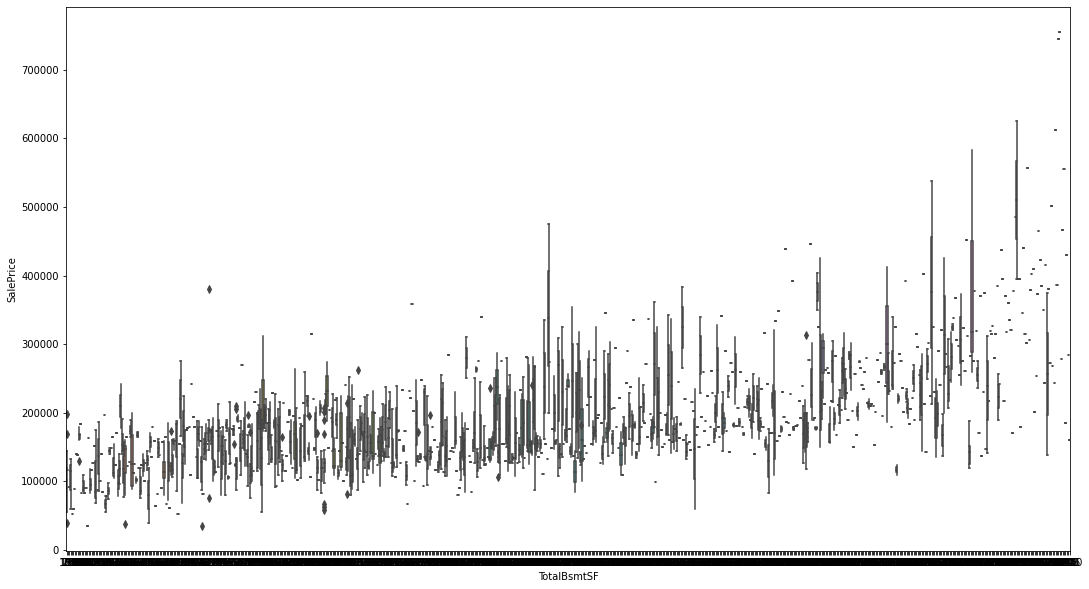

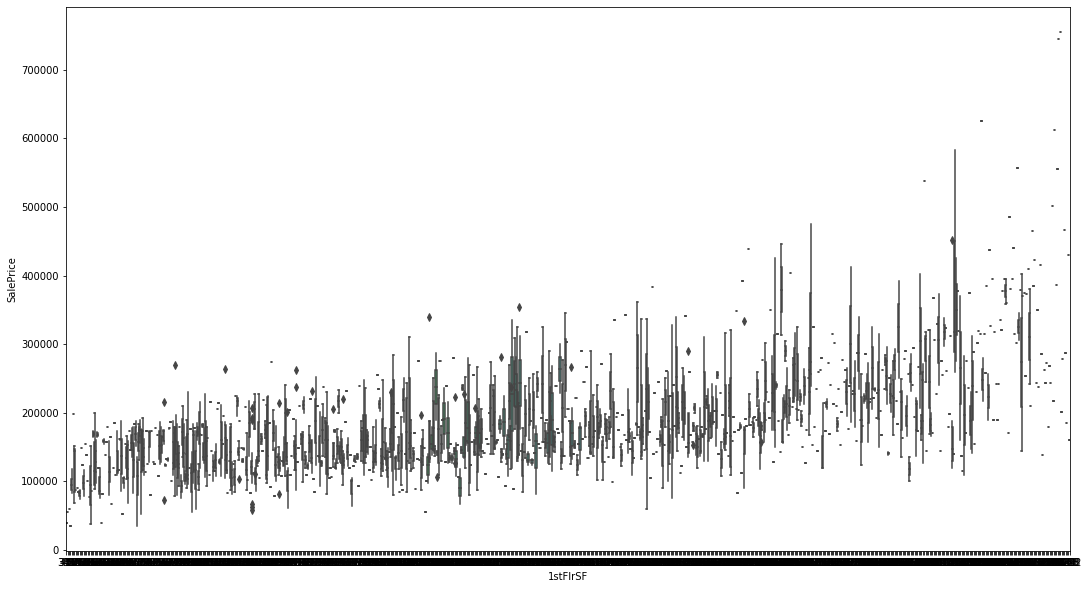

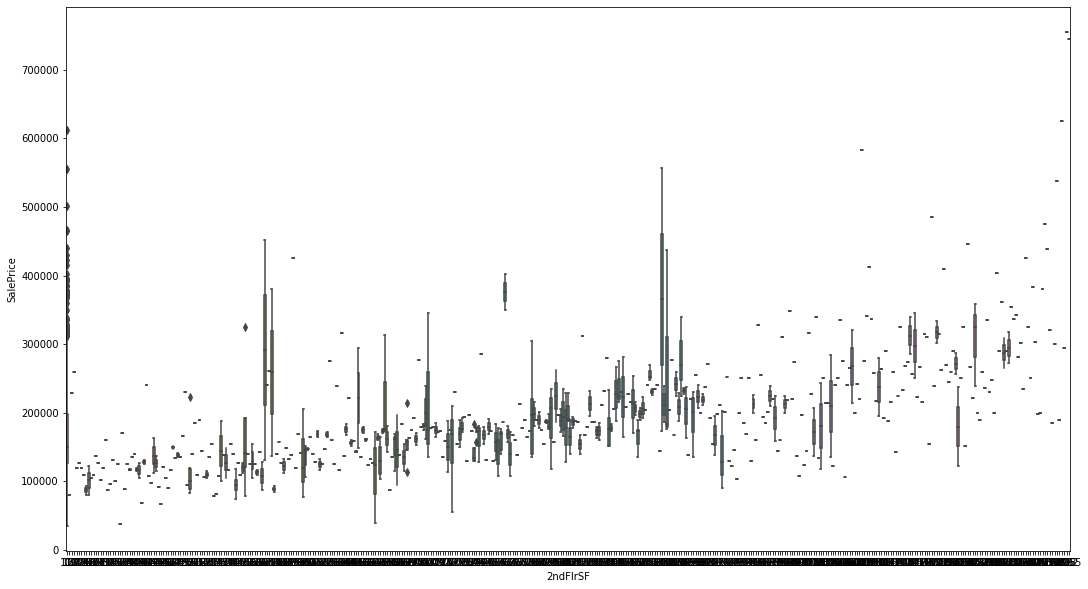

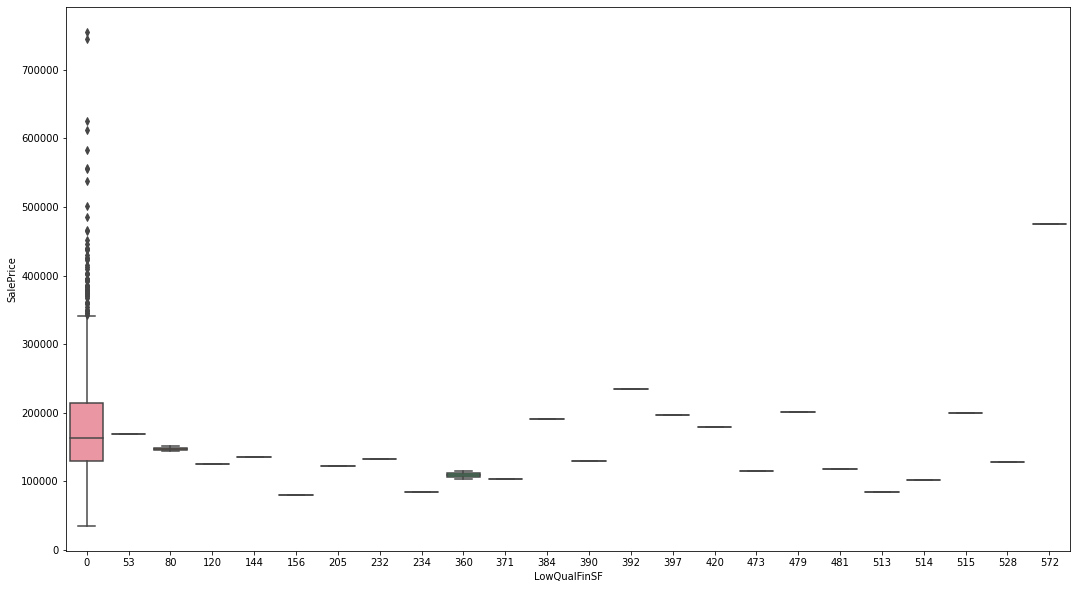

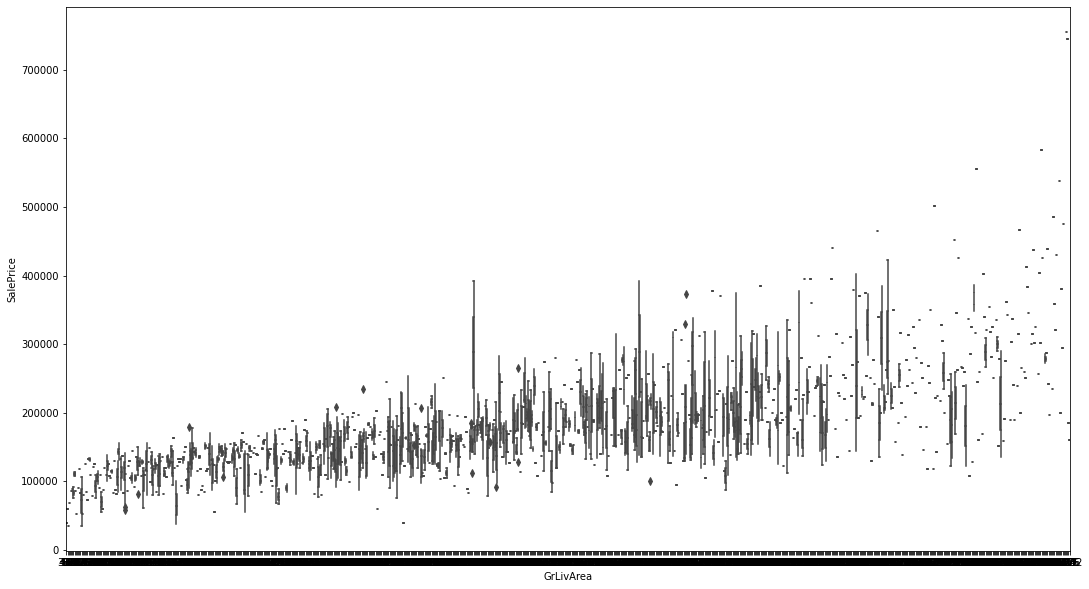

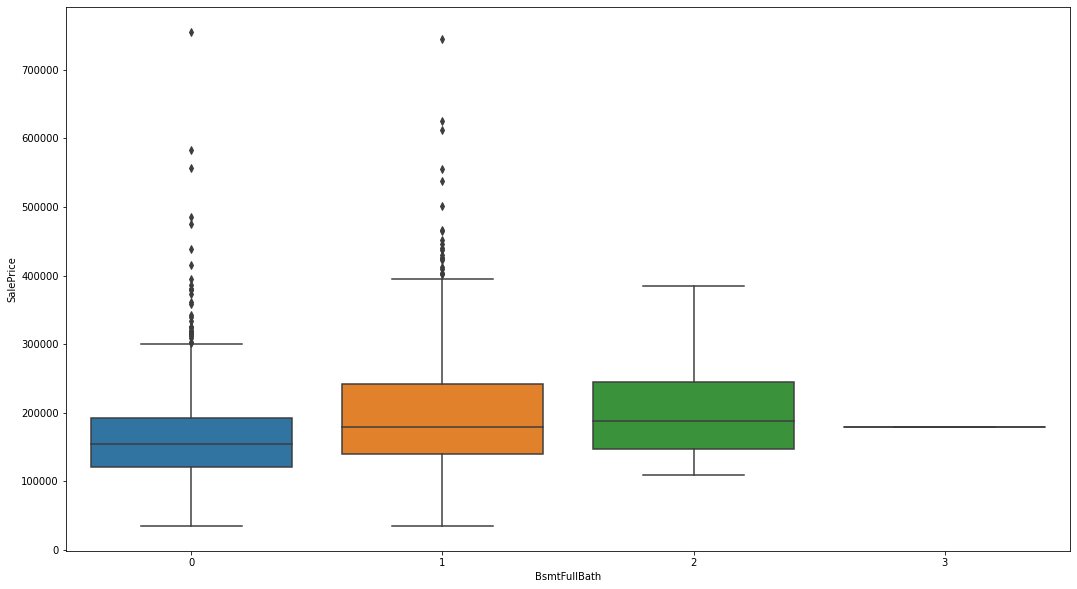

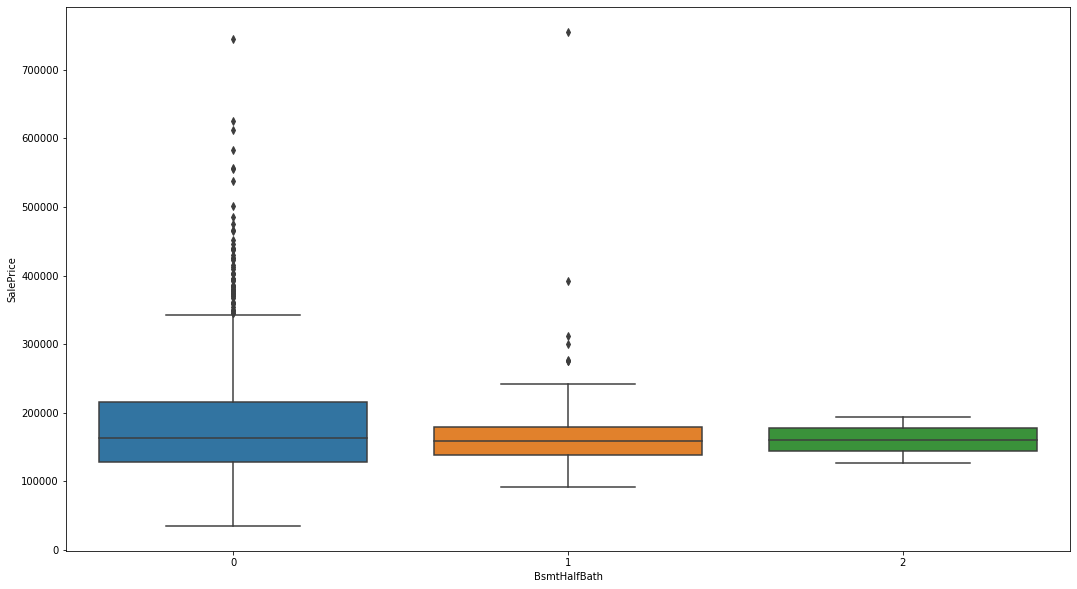

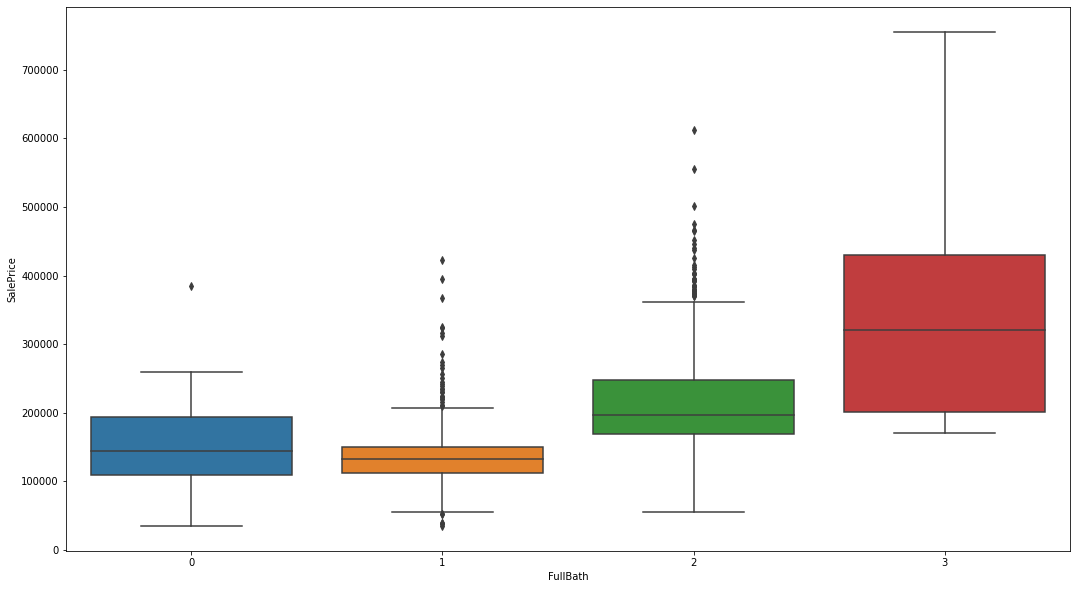

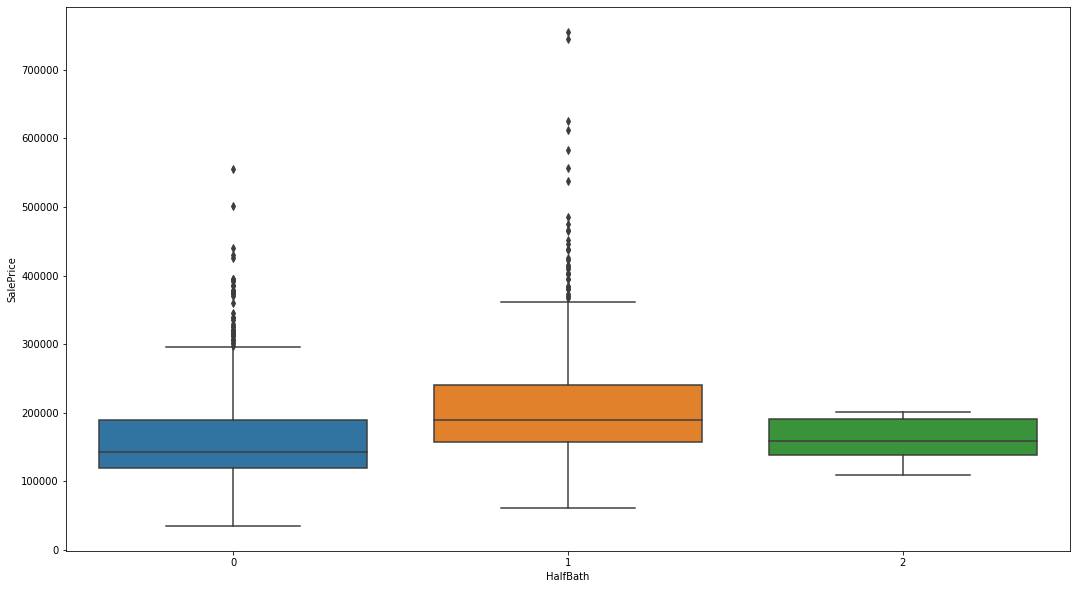

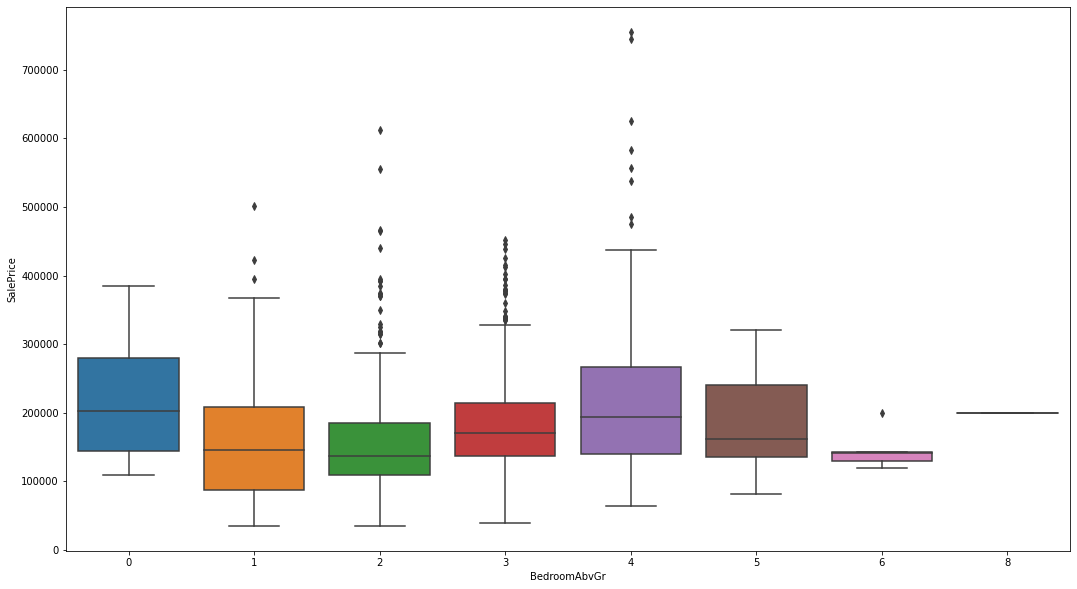

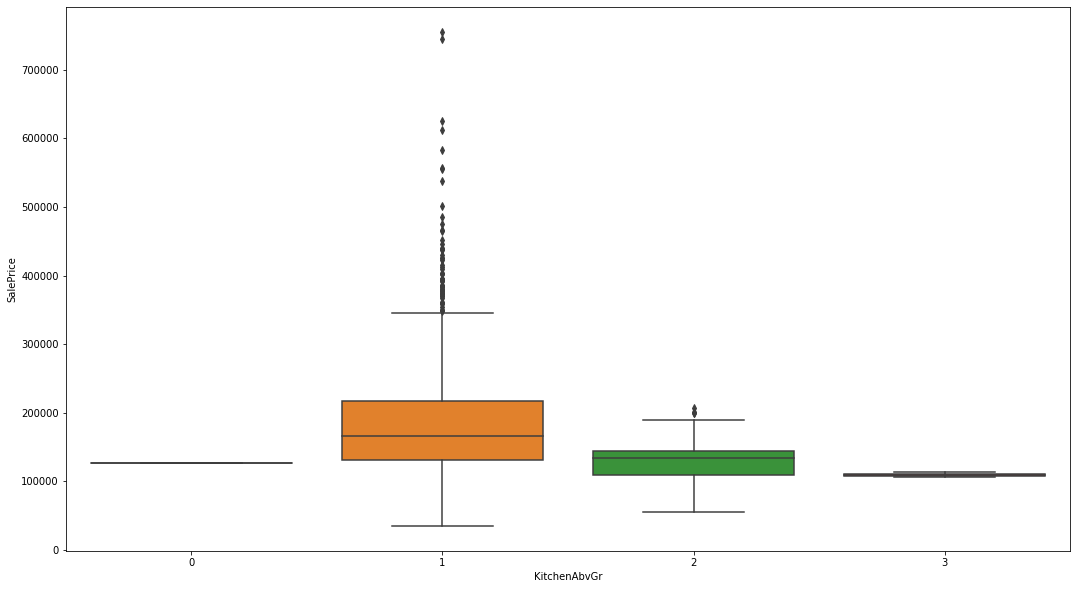

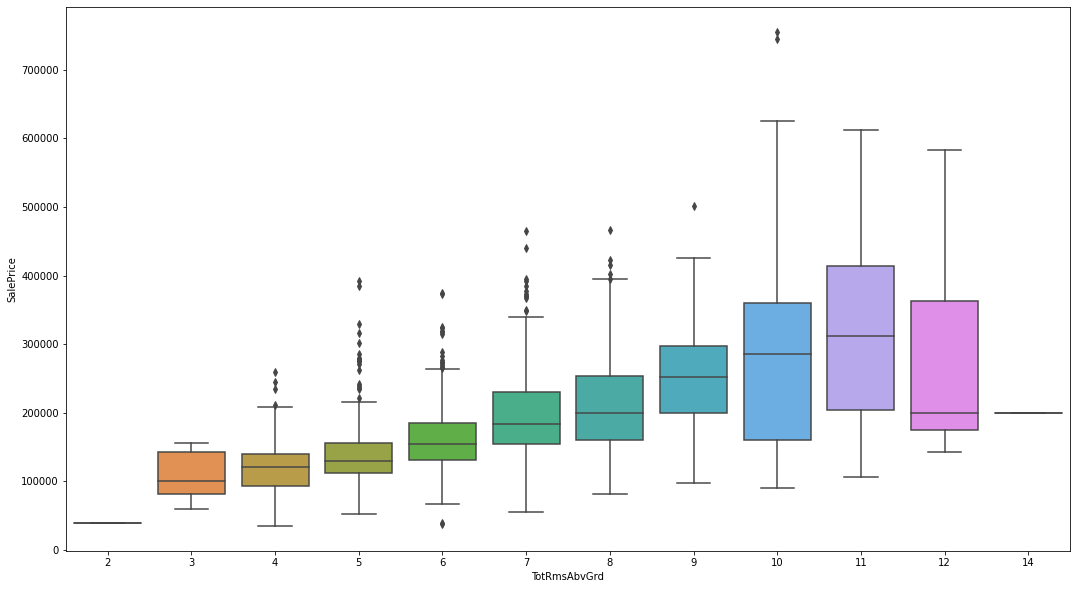

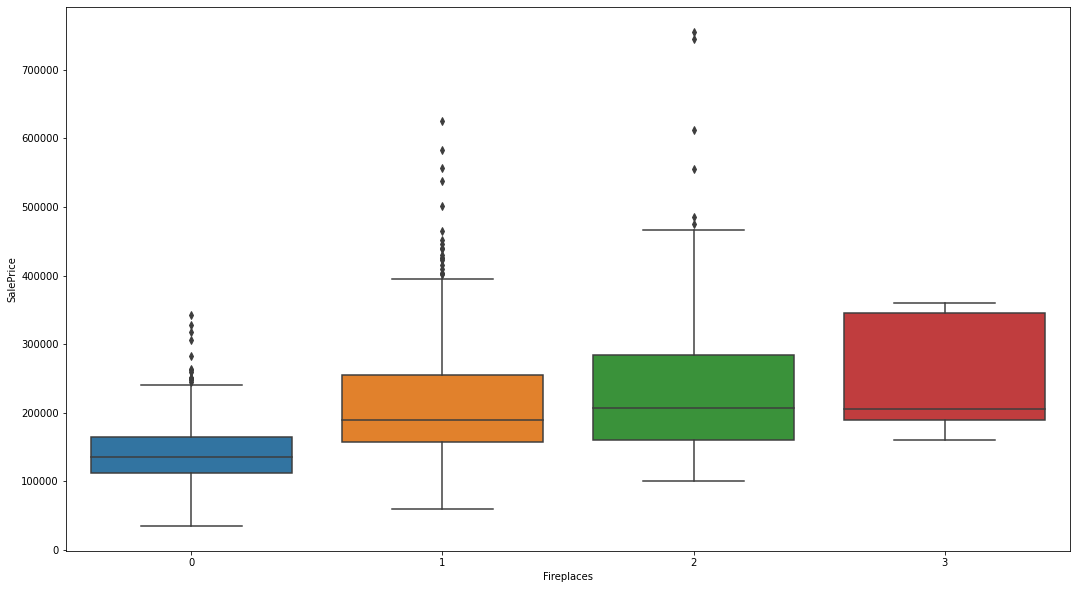

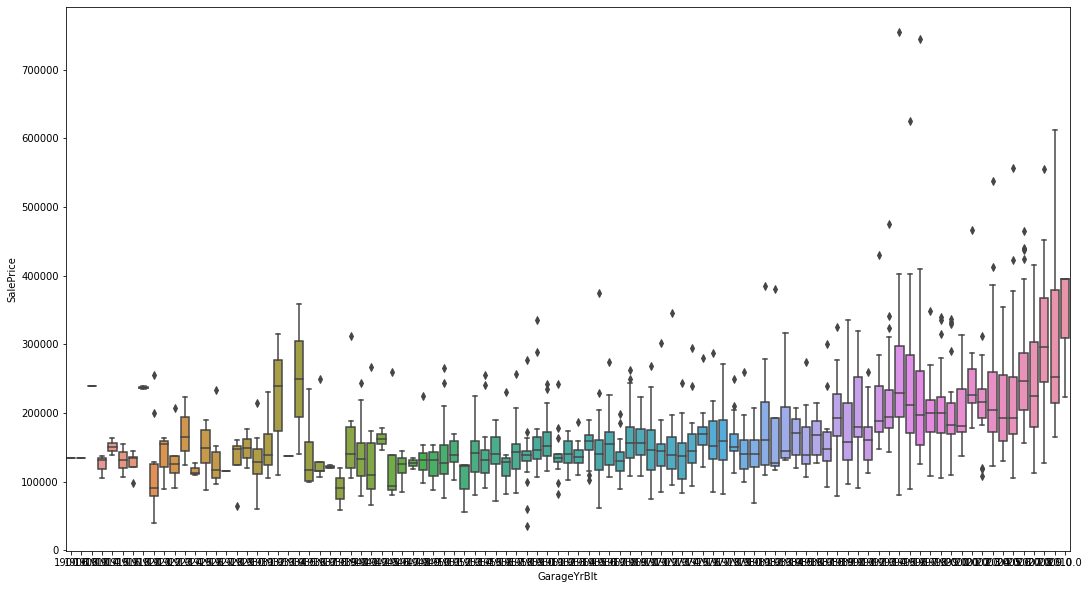

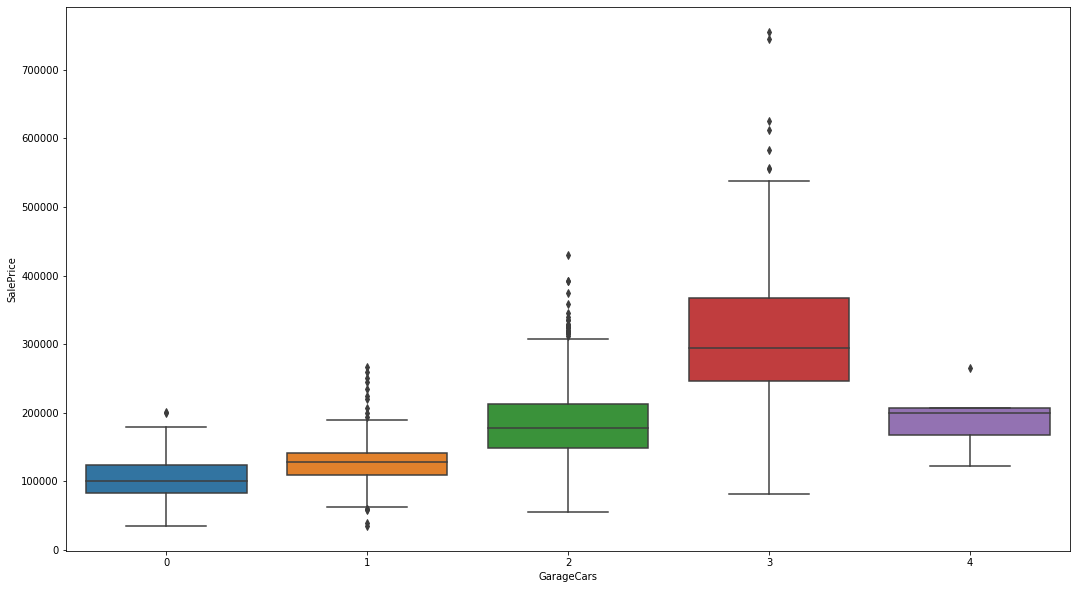

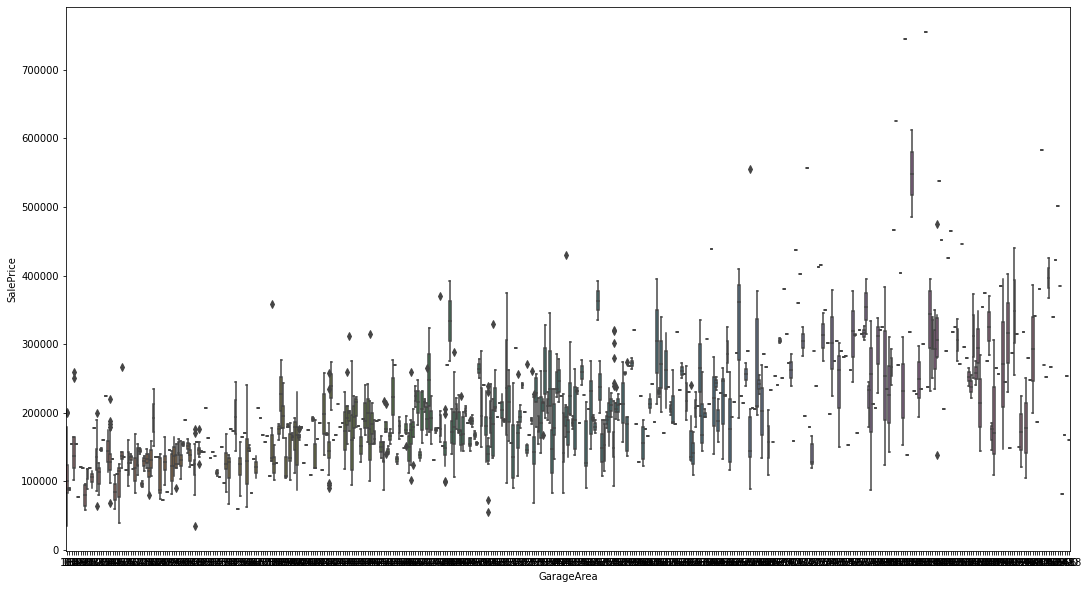

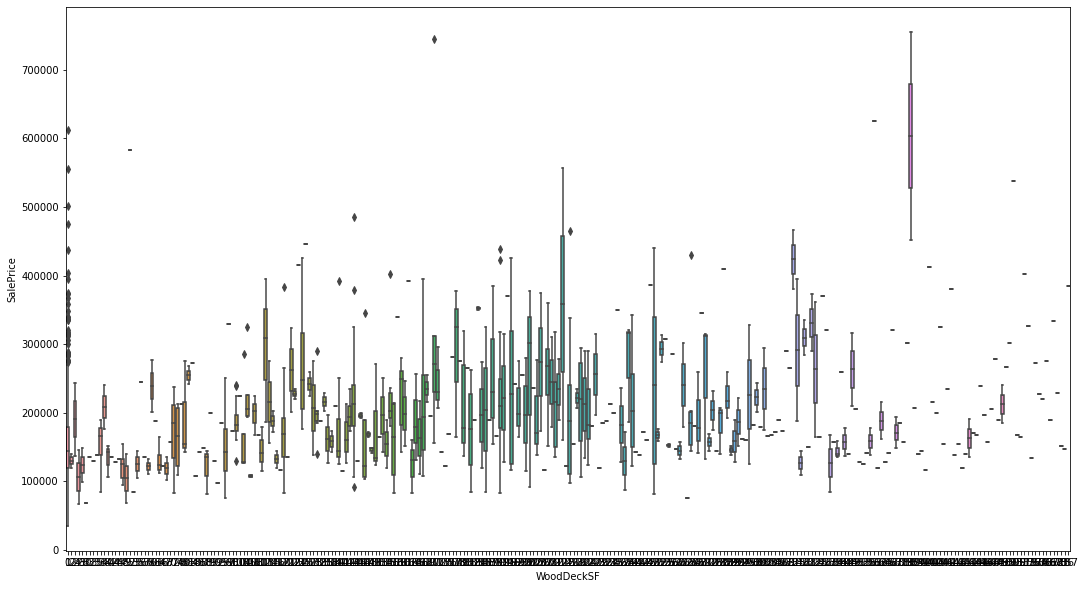

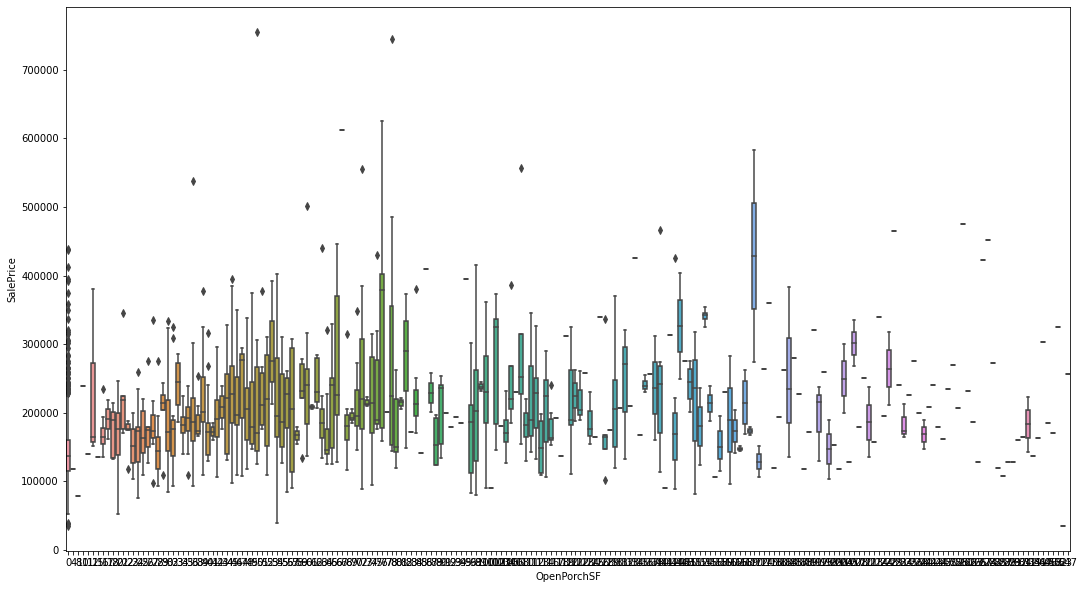

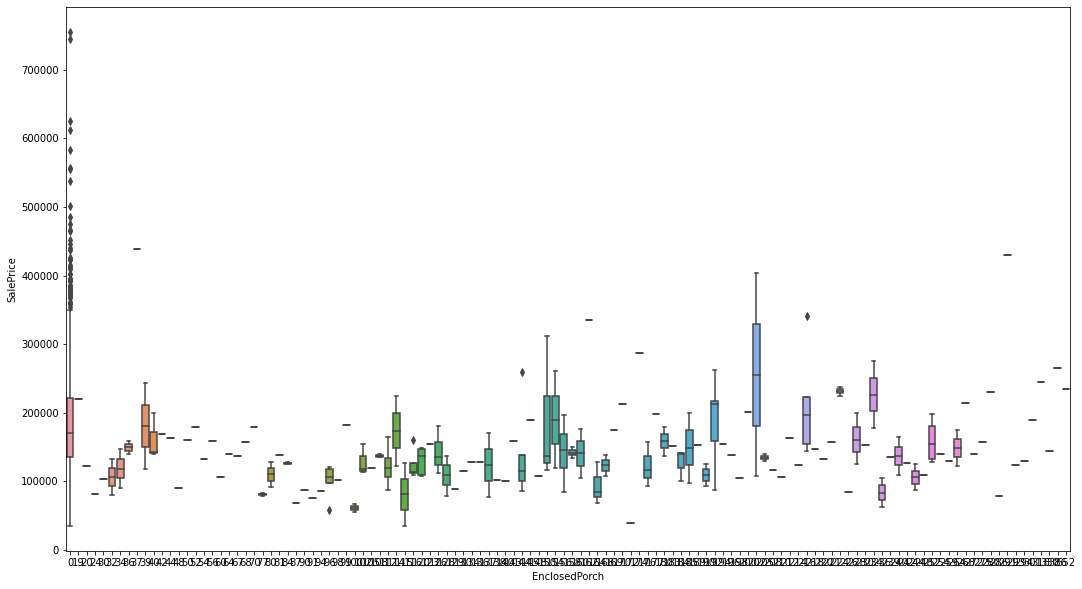

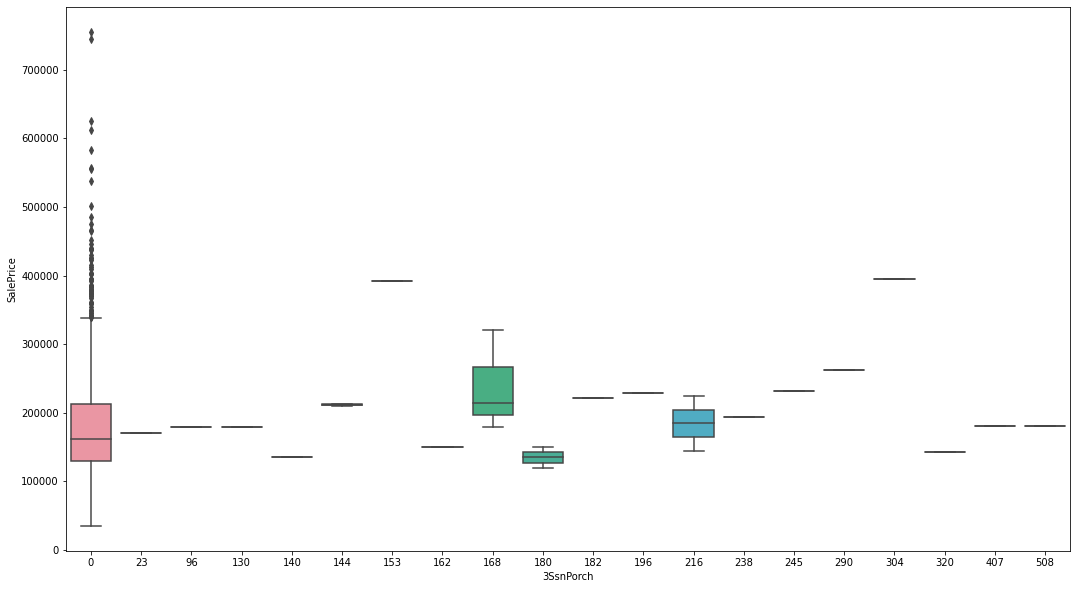

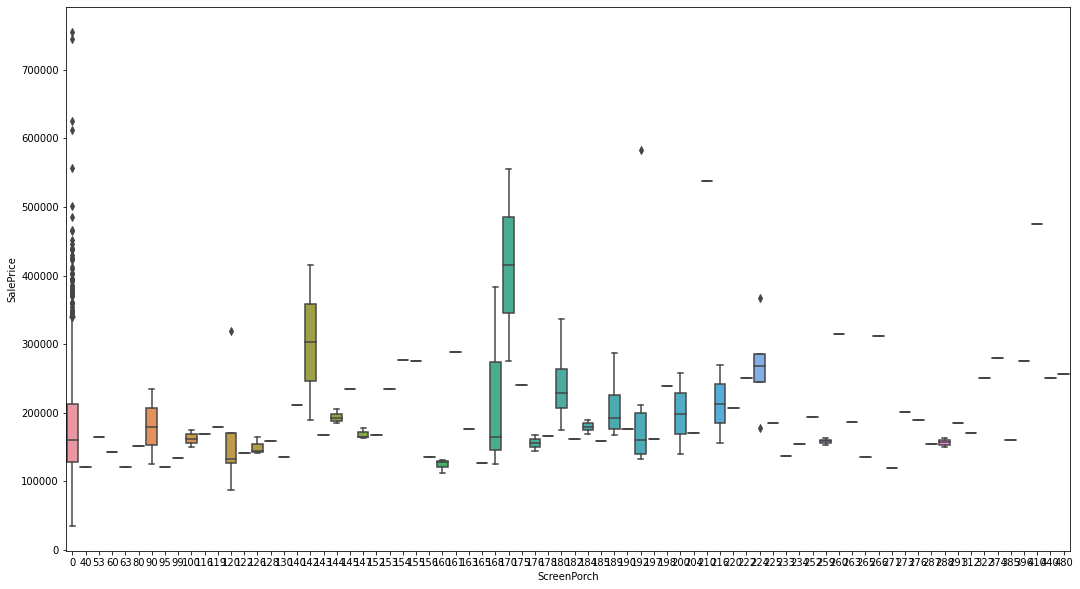

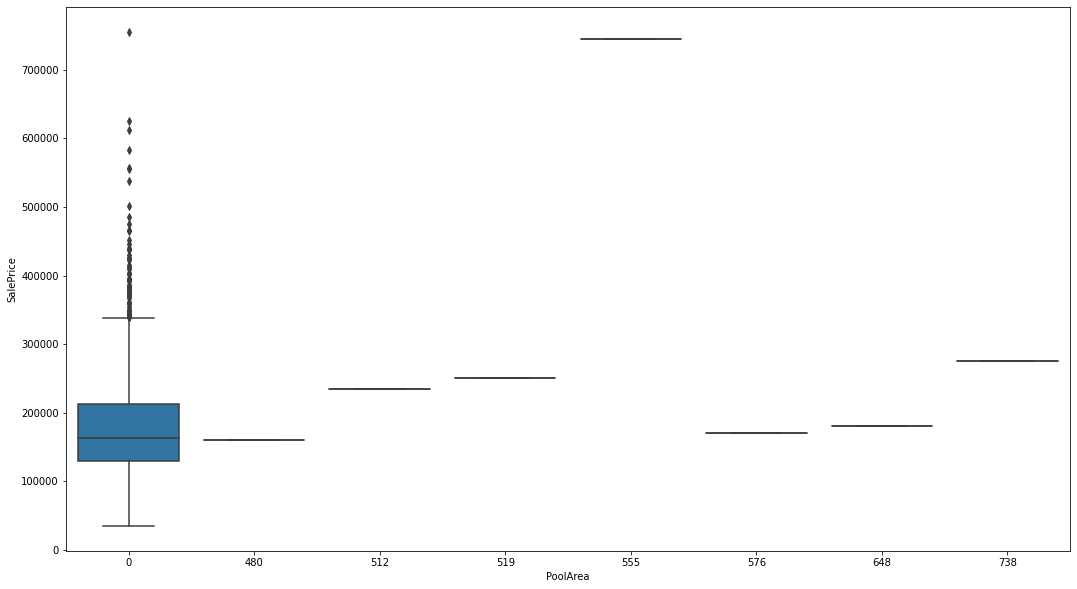

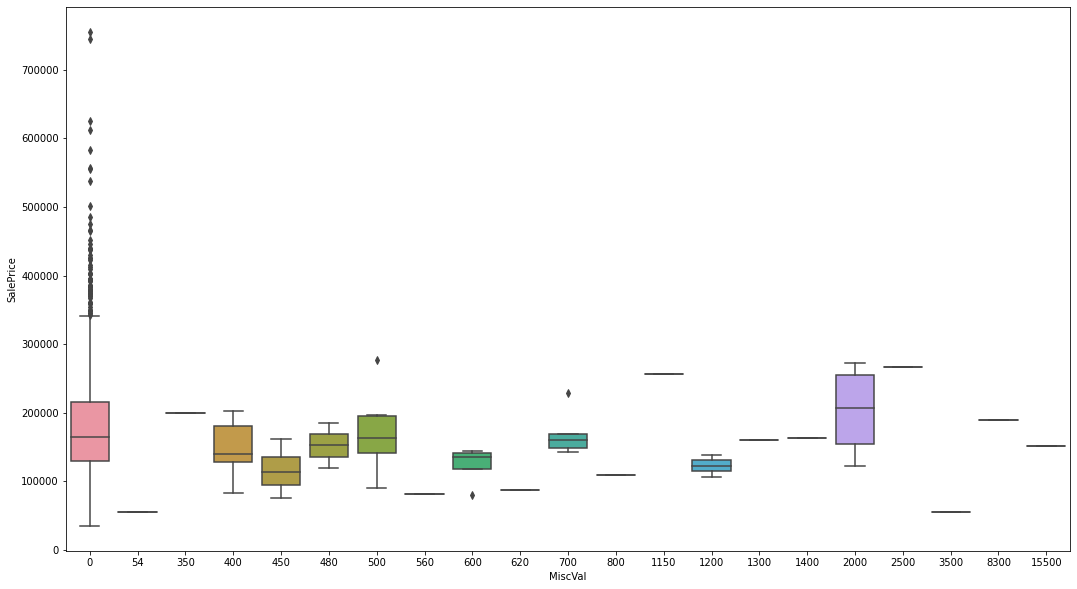

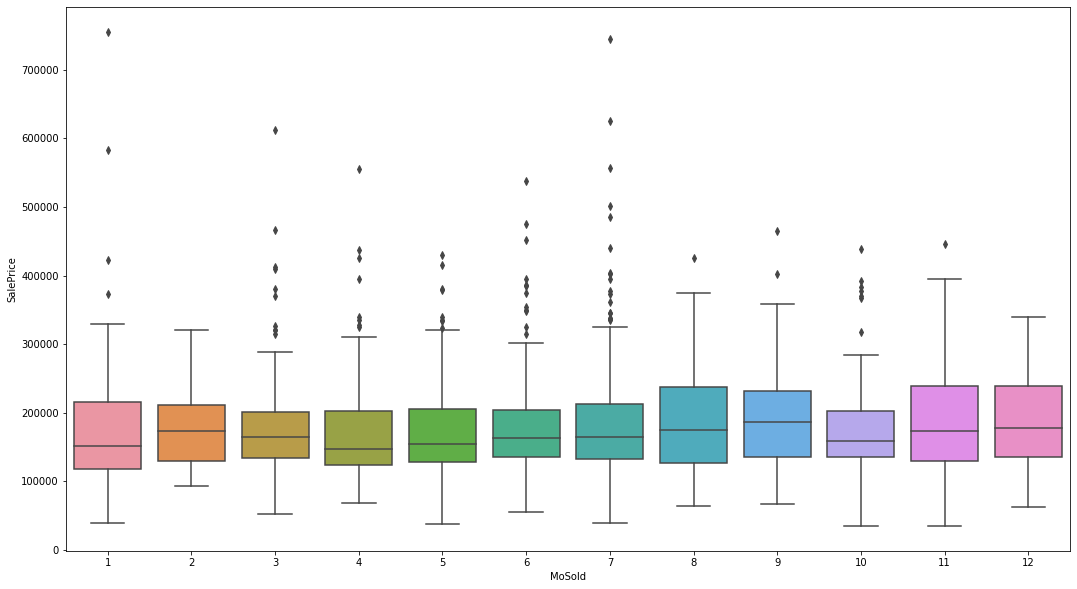

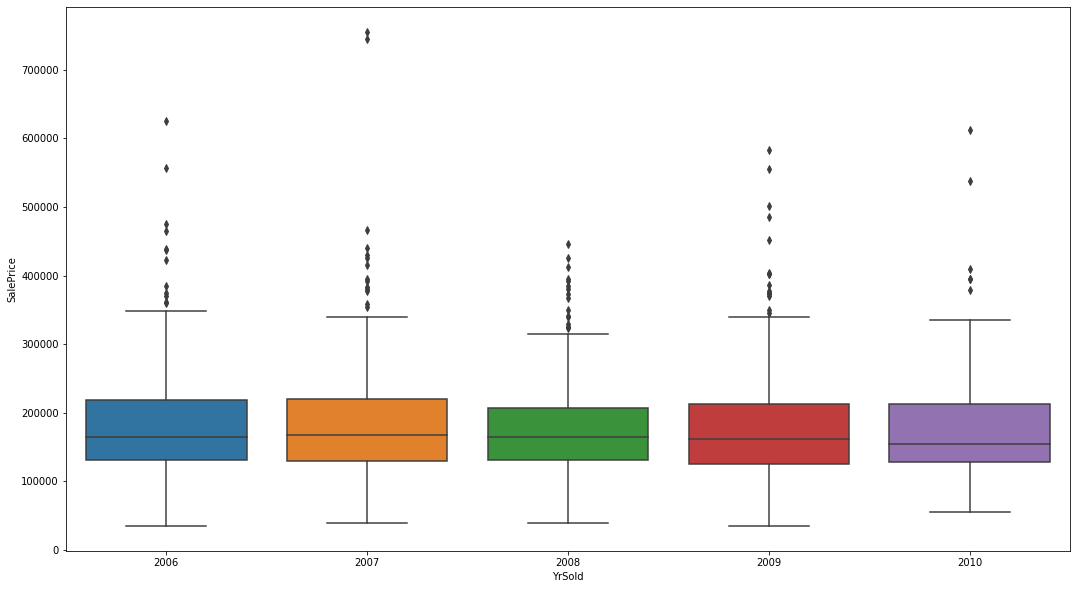

In [ ]:
# Show how each variable compares with the target variable
num_data = numerical_df.drop(['SalePrice'], axis = 1)
for var in num_data:
    plt.rcParams.update({'figure.max_open_warning': 0})
    f, ax = plt.subplots(figsize = (18, 10))
    fig = sns.boxplot(x = num_data[var], y = train_df['SalePrice'])

In [ ]:
# Show the statistics of the categorical data
categorical_df.describe(include = ['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

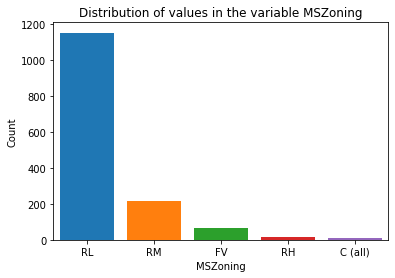

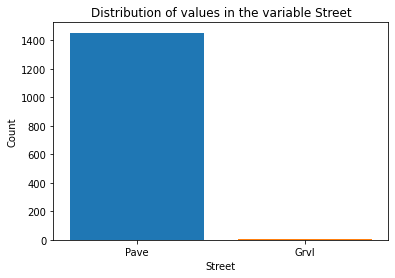

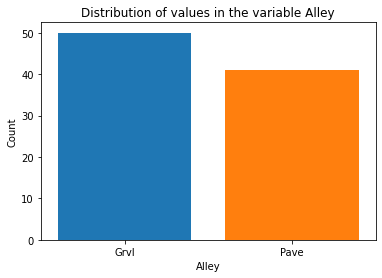

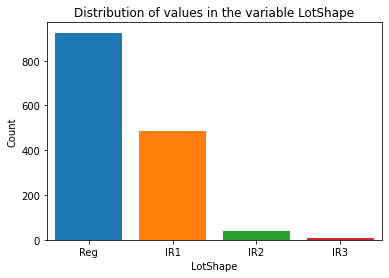

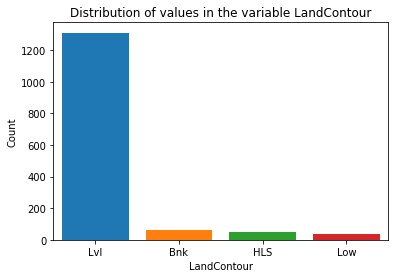

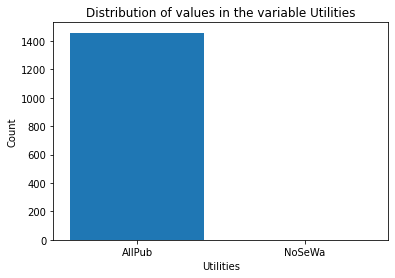

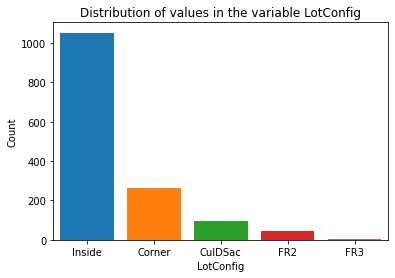

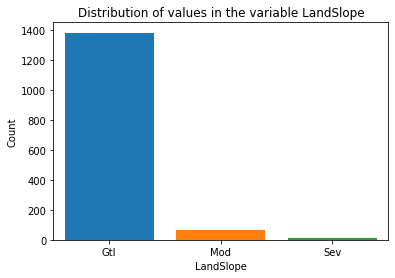

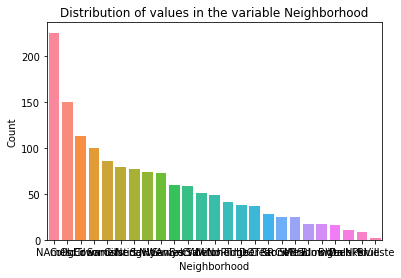

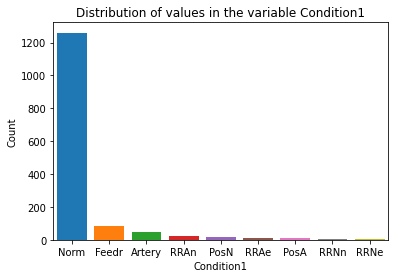

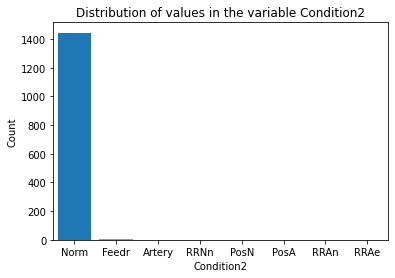

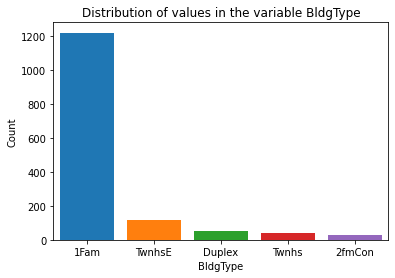

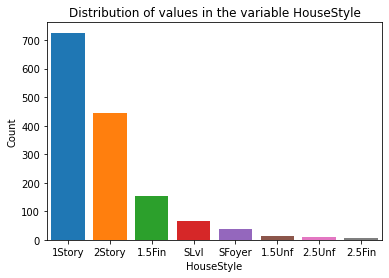

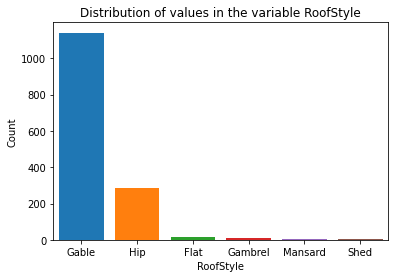

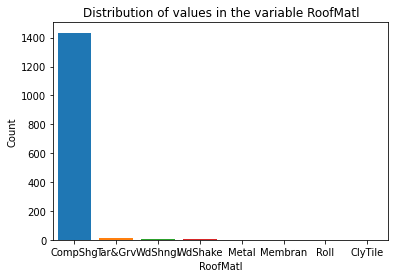

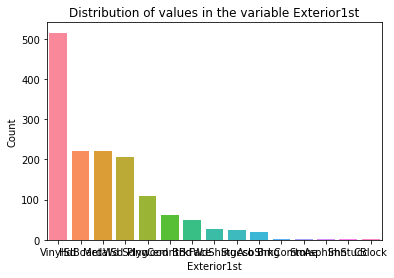

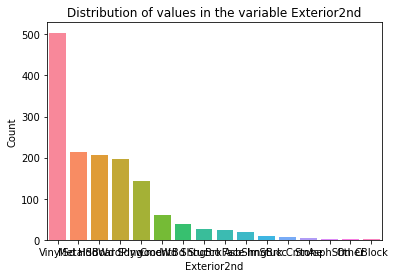

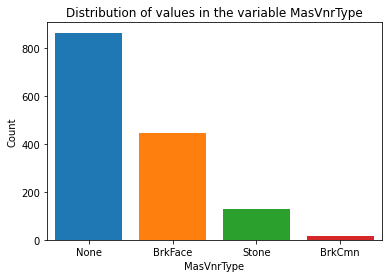

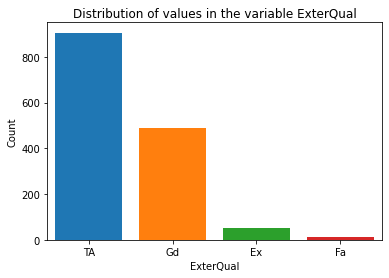

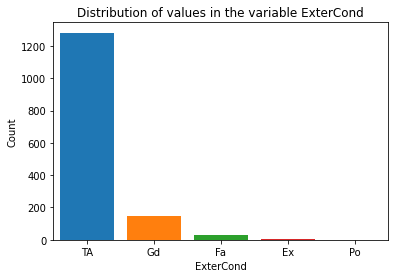

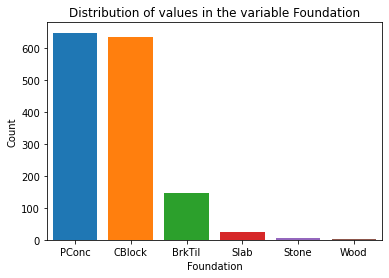

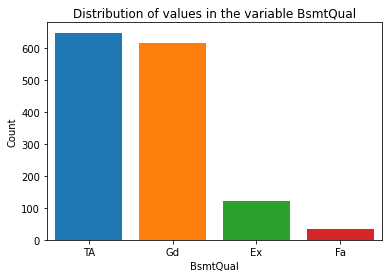

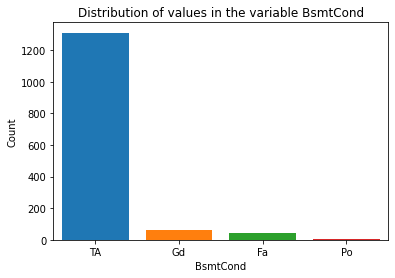

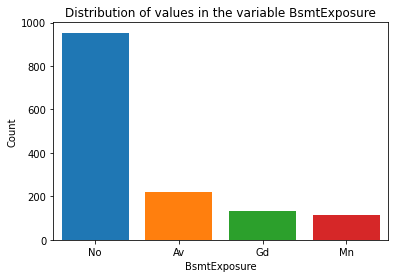

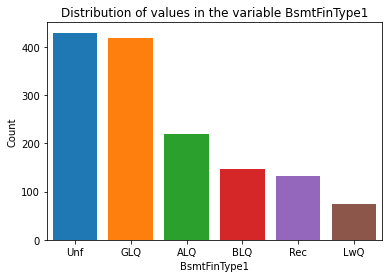

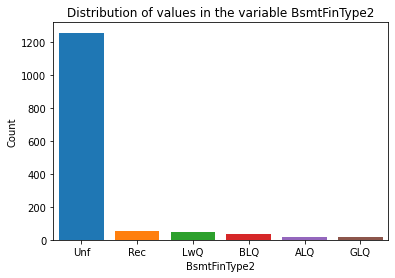

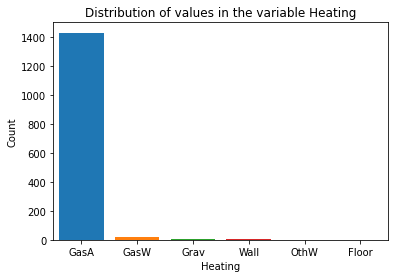

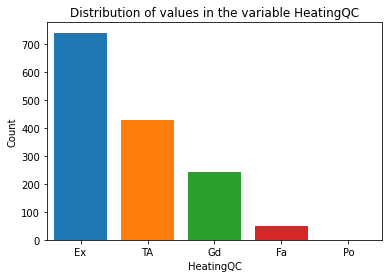

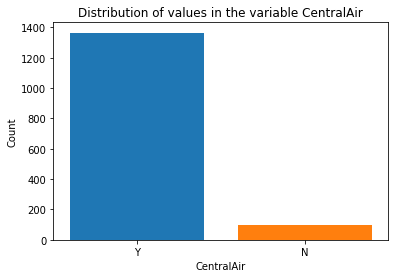

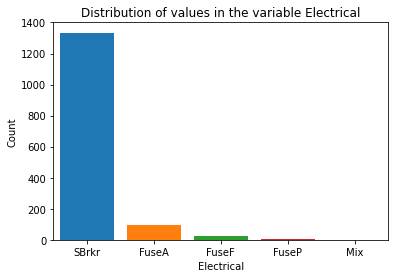

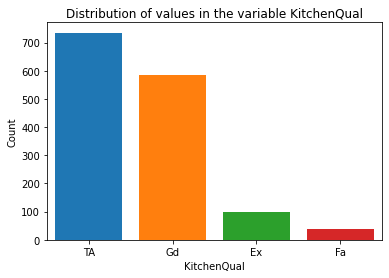

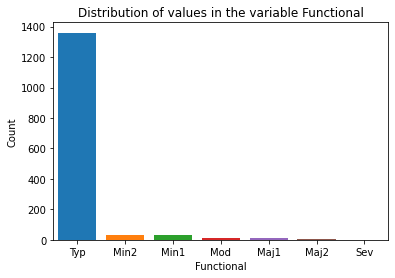

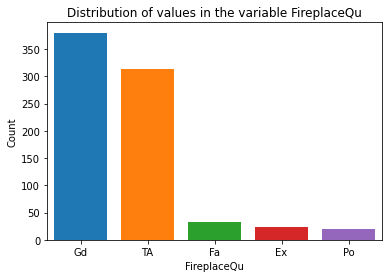

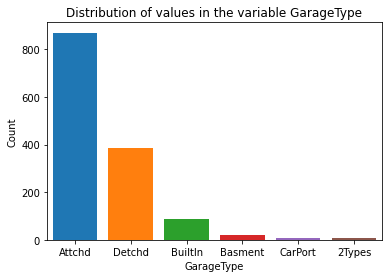

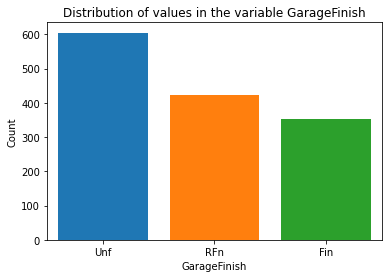

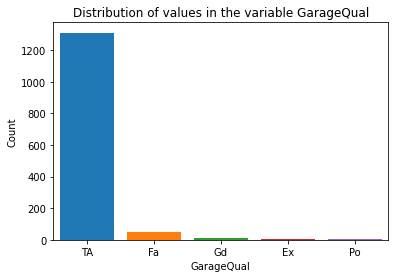

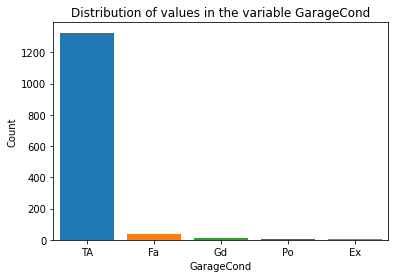

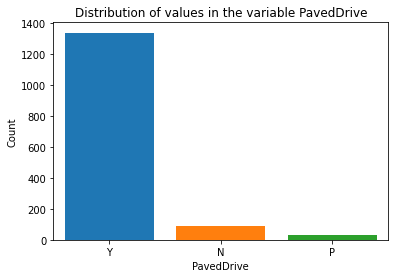

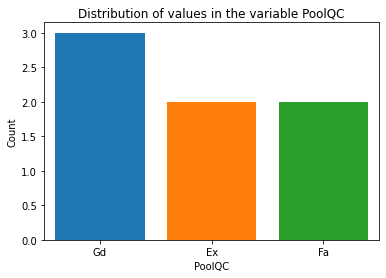

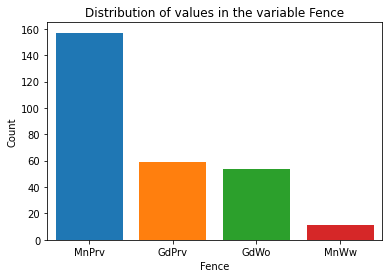

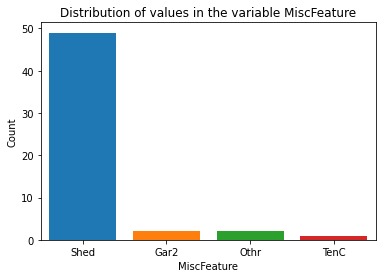

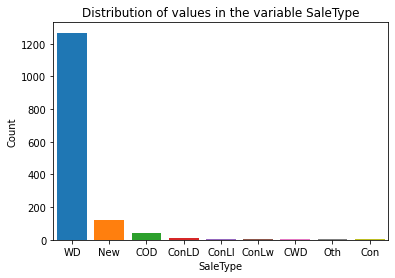

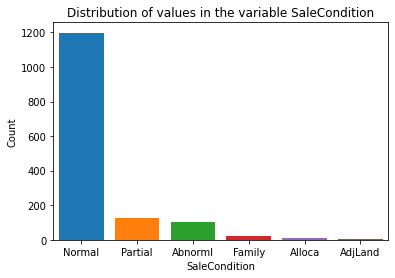

In [ ]:
# Show the distribution of categorical data
for cat in categorical_df:
    plt.figure()
    sns.barplot(
            x = categorical_df[cat].value_counts().index,
            y = categorical_df[cat].value_counts(),
            saturation = 1).set(title = f"Distribution of values in the variable {cat}");
    plt.xlabel(cat)
    plt.ylabel('Count')

In [ ]:
# Combine the two datasets
frames = [train_df, test_df]
combined_df = pd.concat(frames, axis = 0)
combined_df = combined_df.drop(['Id', 'SalePrice'], axis = 1)

In [ ]:
# Extract the target variable
Y = train_df['SalePrice']

In [ ]:
# Generate a dataframe showing the total number of missing values
nan_count_df = combined_df.isnull().sum().sort_values(ascending = False)
nan_proportions_df = ((combined_df.isnull().sum() / combined_df.isnull().count())*100).sort_values(ascending = False)

In [ ]:
# combine the dataframes and print

nans_df = pd.concat([nan_count_df, nan_proportions_df], 
                    keys = ["total number of nans", 'total percentage of nans'],axis = 1)

print(nans_df.head(10))

              total number of nans  total percentage of nans
PoolQC                        2909                 99.657417
MiscFeature                   2814                 96.402878
Alley                         2721                 93.216855
Fence                         2348                 80.438506
FireplaceQu                   1420                 48.646797
LotFrontage                    486                 16.649538
GarageYrBlt                    159                  5.447071
GarageFinish                   159                  5.447071
GarageQual                     159                  5.447071
GarageCond                     159                  5.447071


In [ ]:
# Eliminate irrelevant variables 
combined_df = combined_df.drop((nans_df[nans_df["total number of nans"] > 100]).index, axis = 1)
combined_df.isnull().sum().sort_values(ascending = False)

BsmtExposure     82
BsmtCond         82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
                 ..
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
SaleCondition     0
Length: 68, dtype: int64

In [ ]:
# Check for numerical values in numerical data
combined_df.select_dtypes(['int', 'float']).isnull().sum()

MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [ ]:
# Check for missing values in categorical data
combined_df.select_dtypes(exclude = ['int', 'float']).isnull().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       1
Functional        2
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

In [ ]:
# Handling missing values in numerical data
numerical_df = [col for col in combined_df.select_dtypes(['int', 'float'])]

for col in numerical_df:
    combined_df[col].fillna(combined_df[col].median(), inplace = True)

In [ ]:
# Handling missing values in categorical data
categorical_df = [col for col in combined_df.select_dtypes(exclude = ['int', 'float'])]

for col in categorical_df:
    combined_df[col].fillna(combined_df[col].value_counts().index[0], inplace = True)

In [ ]:
# Check for missing values in the data set
combined_df.isnull().sum().sum()

0

In [ ]:
# Detect outliers in combined data set
def detect_outlier(feature):
    outliers = []
    data = combined_df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print(f"\nOutlier caps for {feature}")
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i > data.quantile(.99)])))

In [ ]:
# Determine what the upperbound should be for continuous features in combined data set
for feat in numerical_df:
    detect_outlier(feat)


Outlier caps for MSSubClass
  --95p: 160.0 / 78 values exceed that
  --3sd: 184.7 / 61 values exceed that
  --99p: 190.0 / 0 values exceed that

Outlier caps for LotArea
  --95p: 17142.9 / 146 values exceed that
  --3sd: 33825.0 / 29 values exceed that
  --99p: 33038.6 / 30 values exceed that

Outlier caps for OverallQual
  --95p: 8.0 / 138 values exceed that
  --3sd: 10.3 / 4 values exceed that
  --99p: 10.0 / 0 values exceed that

Outlier caps for OverallCond
  --95p: 8.0 / 41 values exceed that
  --3sd: 8.9 / 58 values exceed that
  --99p: 9.0 / 0 values exceed that

Outlier caps for YearBuilt
  --95p: 2007.0 / 77 values exceed that
  --3sd: 2062.2 / 8 values exceed that
  --99p: 2008.0 / 28 values exceed that

Outlier caps for YearRemodAdd
  --95p: 2007.0 / 128 values exceed that
  --3sd: 2046.9 / 0 values exceed that
  --99p: 2009.0 / 13 values exceed that

Outlier caps for MasVnrArea
  --95p: 466.0 / 145 values exceed that
  --3sd: 637.9 / 63 values exceed that
  --99p: 770.5 / 

In [ ]:
# Capping features in combined_df to remover outliers in numerical features

# Upper bounded outliers
for var in ['MSSubClass' ,'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'Fireplaces','GarageArea', 
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']:
    combined_df[var].clip(upper=combined_df[var].quantile(.95), inplace=True)

# Lower and Upper bounded outliers
for var in ['LotArea', 'TotalBsmtSF', 'OverallCond', 'BedroomAbvGr', 'KitchenAbvGr']:
    combined_df[var].clip(lower = combined_df[var].quantile(.05), upper = combined_df[var].quantile(0.95), inplace=True)
      
# Lower bounded outliers    
for var in ['OverallQual', 'YearBuilt']:
    combined_df[var].clip(lower=combined_df[var].quantile(.95), inplace=True)

In [ ]:
# Reconcatenate the train data set to recheck the outliers in numerical features
x_train = combined_df[:len(train_df)]

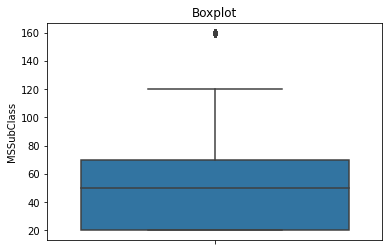

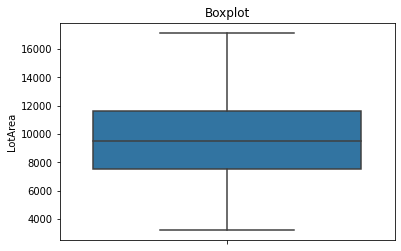

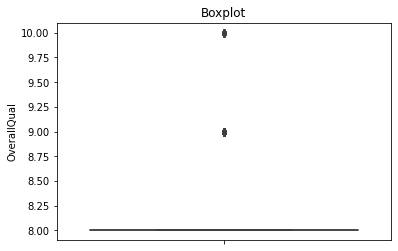

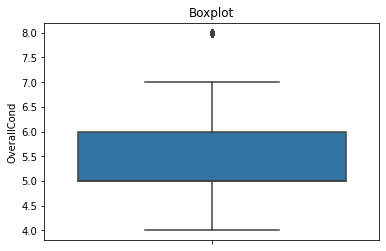

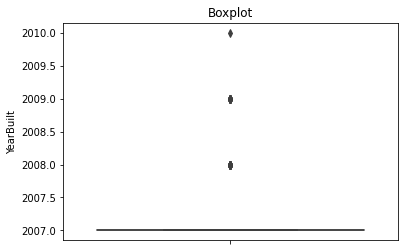

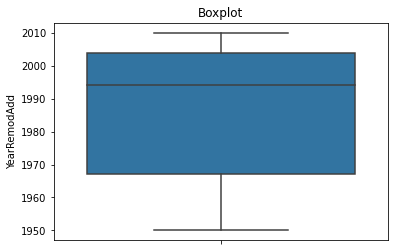

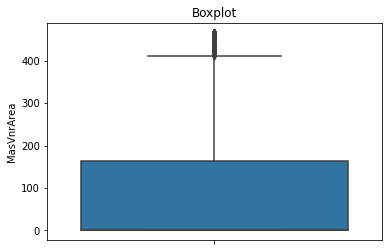

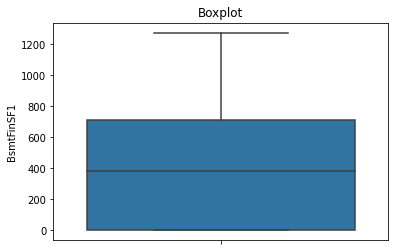

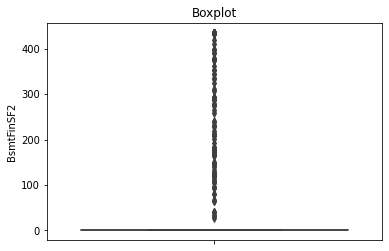

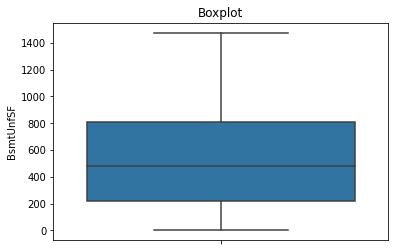

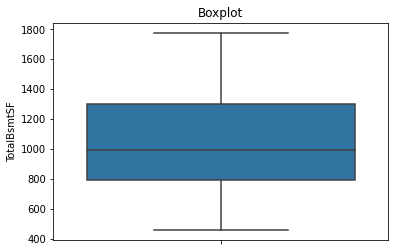

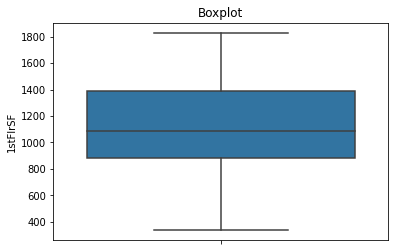

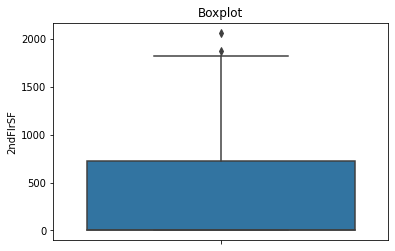

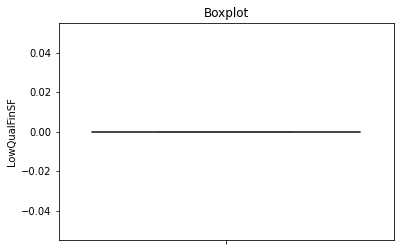

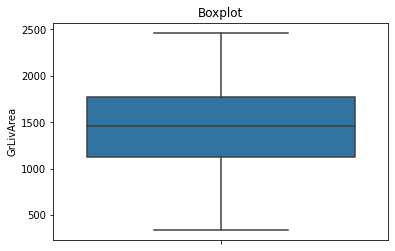

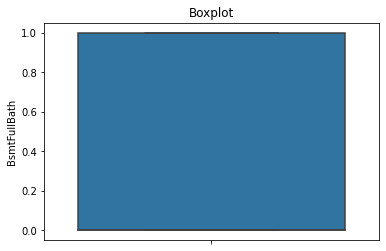

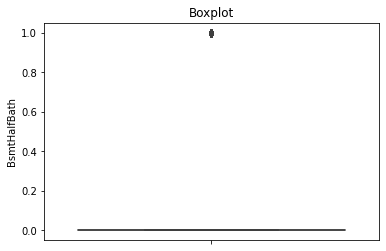

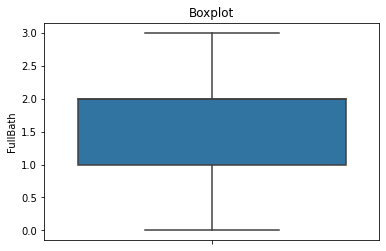

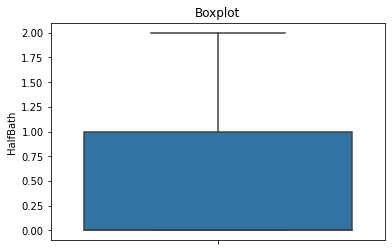

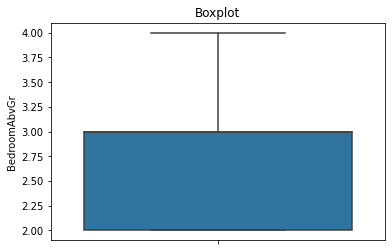

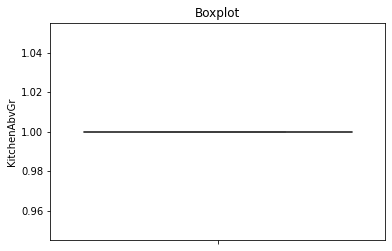

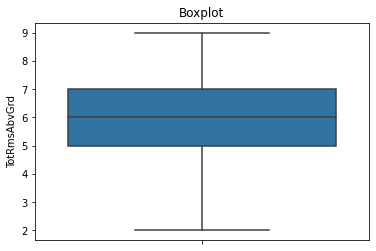

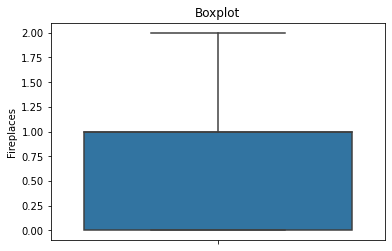

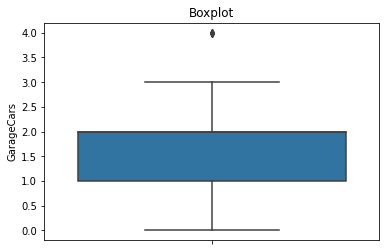

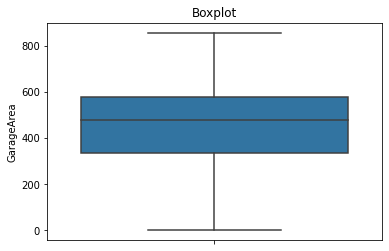

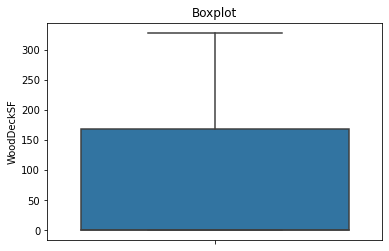

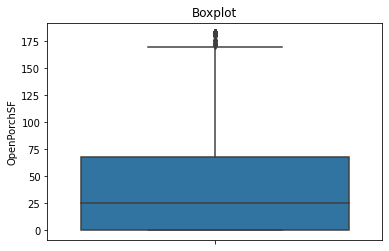

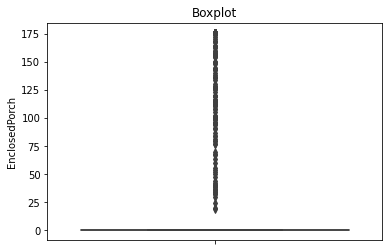

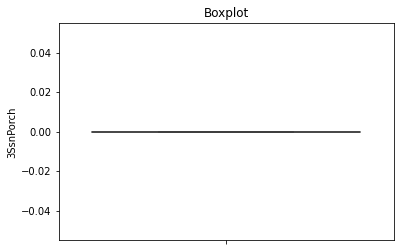

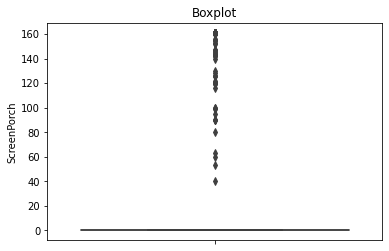

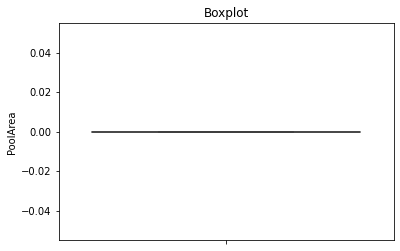

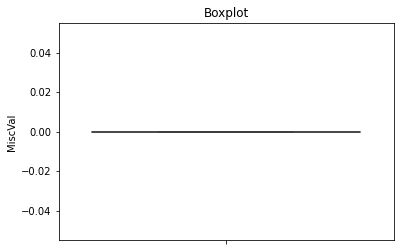

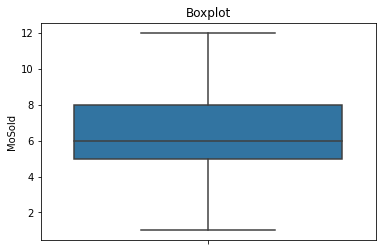

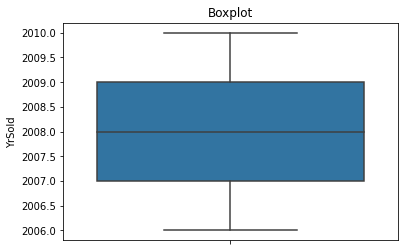

In [ ]:
# Check for the presence of outliers in the numerical data again
numerical_df_train = x_train.select_dtypes(['int', 'float'])

def num_plot(df, var):
    
    plt.subplot(1,1,1)
    sns.boxplot(y = df[var])
    plt.title("Boxplot")
    plt.show()
    
for var in numerical_df_train:
    num_plot(numerical_df_train, var)

In [ ]:
# Check for skewness in the numerical features for the entire data set
vars_skewed = combined_df[numerical_df].apply(lambda x: skew(x)).sort_values(ascending = False)
vars_skewed

YearBuilt        7.442764
OverallQual      5.189142
BsmtHalfBath     3.707260
ScreenPorch      3.040916
BsmtFinSF2       2.995464
EnclosedPorch    2.370024
MasVnrArea       1.447672
OpenPorchSF      1.214885
MSSubClass       1.191260
OverallCond      0.943757
2ndFlrSF         0.861675
WoodDeckSF       0.846377
HalfBath         0.694566
BsmtUnfSF        0.681439
Fireplaces       0.588348
BsmtFinSF1       0.552106
GrLivArea        0.461204
1stFlrSF         0.395660
TotalBsmtSF      0.392617
BsmtFullBath     0.344142
LotArea          0.257051
MoSold           0.195884
FullBath         0.167606
TotRmsAbvGrd     0.160846
BedroomAbvGr     0.148238
YrSold           0.132399
KitchenAbvGr     0.000000
3SsnPorch        0.000000
LowQualFinSF     0.000000
PoolArea         0.000000
MiscVal          0.000000
GarageArea      -0.151633
GarageCars      -0.218593
YearRemodAdd    -0.451020
dtype: float64

In [ ]:
# Correct the skeness in numerical features that have skewness great than 0.3
high_skew = vars_skewed[abs(vars_skewed) > 0.3]
high_skew

YearBuilt        7.442764
OverallQual      5.189142
BsmtHalfBath     3.707260
ScreenPorch      3.040916
BsmtFinSF2       2.995464
EnclosedPorch    2.370024
MasVnrArea       1.447672
OpenPorchSF      1.214885
MSSubClass       1.191260
OverallCond      0.943757
2ndFlrSF         0.861675
WoodDeckSF       0.846377
HalfBath         0.694566
BsmtUnfSF        0.681439
Fireplaces       0.588348
BsmtFinSF1       0.552106
GrLivArea        0.461204
1stFlrSF         0.395660
TotalBsmtSF      0.392617
BsmtFullBath     0.344142
YearRemodAdd    -0.451020
dtype: float64

In [ ]:
# Correct the skeness in the numerical features
for feat in high_skew.index:
    combined_df[feat] = np.log1p(combined_df[feat])

In [ ]:
# Check for skewness in the numerical data again for the entire data set
vars_skewed = combined_df[numerical_df].apply(lambda x: skew(x)).sort_values(ascending = False)
vars_skewed

YearBuilt        7.441459
OverallQual      5.056025
BsmtHalfBath     3.707260
ScreenPorch      2.924905
BsmtFinSF2       2.425077
EnclosedPorch    1.938643
OverallCond      0.662615
HalfBath         0.580692
MasVnrArea       0.520174
BsmtFullBath     0.344142
2ndFlrSF         0.305049
LotArea          0.257051
Fireplaces       0.204337
MSSubClass       0.200959
MoSold           0.195884
FullBath         0.167606
TotRmsAbvGrd     0.160846
BedroomAbvGr     0.148238
WoodDeckSF       0.146367
YrSold           0.132399
KitchenAbvGr     0.000000
LowQualFinSF     0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
OpenPorchSF     -0.067221
GarageArea      -0.151633
1stFlrSF        -0.210829
GarageCars      -0.218593
GrLivArea       -0.232240
TotalBsmtSF     -0.296356
YearRemodAdd    -0.458157
BsmtFinSF1      -0.624707
BsmtUnfSF       -2.177902
dtype: float64

In [ ]:
# Capping outliers in the target variable
# Upper bound
Y.clip(upper=Y.quantile(.95), inplace=True)

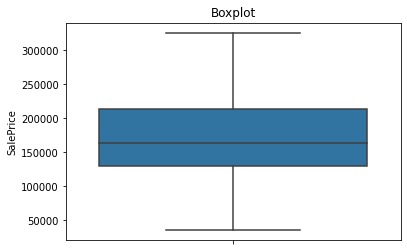

In [ ]:
# Check for outliers in the target variable
sns.boxplot(y = Y)
plt.title("Boxplot")
plt.show()

In [ ]:
# Check for skewness in the the targer variable
vars_skewed = Y.skew()
print("Before handling the skewness in target variable:", vars_skewed)

# Since its positively skewed and greater than 0.3, handle the skewness in the target variable
Y = np.log1p(Y)

# Check for skewness in the the target variable again
vars_skewed = Y.skew()
print("After handling the skewness in target variable:", vars_skewed)

Before handling the skewness in target variable: 0.7215586638935813
After handling the skewness in target variable: -0.22979430478788918


In [ ]:
# Categorical data
categorical_df = combined_df.select_dtypes(exclude = ['int', 'float'])
categorical_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# Convert the categorical data to numerical data
for feature in categorical_df:
    le = preprocessing.LabelEncoder()
    combined_df[feature] = le.fit_transform(combined_df[feature].astype(str))

In [ ]:
# Reconcatenate the train data set to recheck the outliers in categoricalfeatures
x_train = combined_df[:len(train_df)]

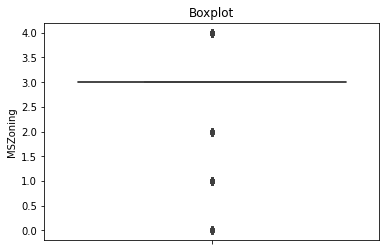

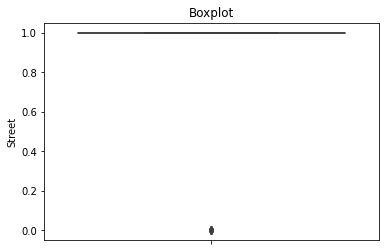

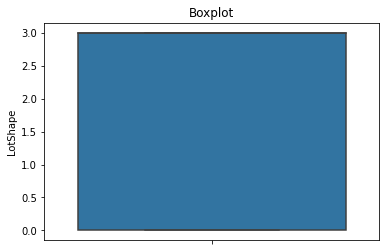

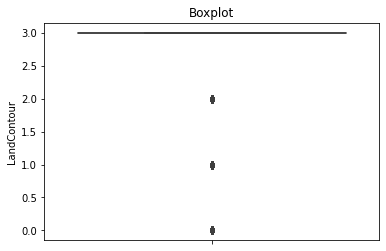

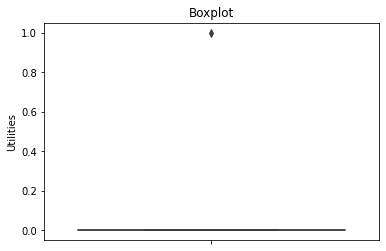

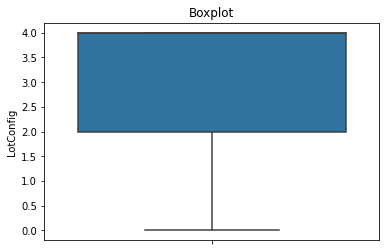

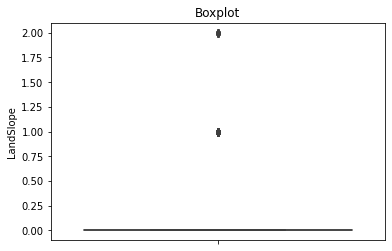

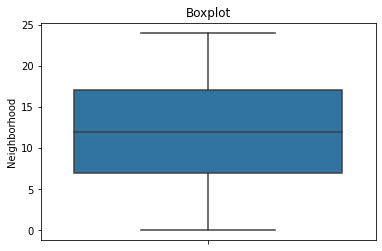

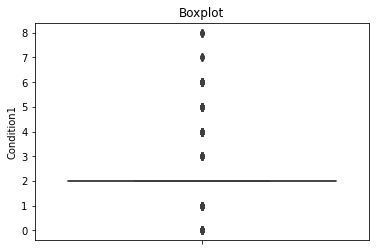

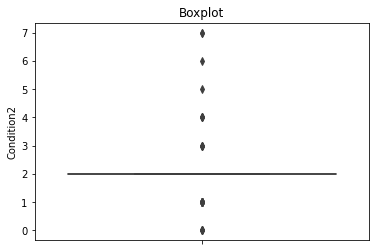

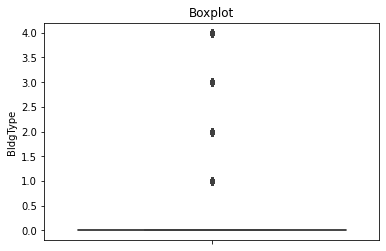

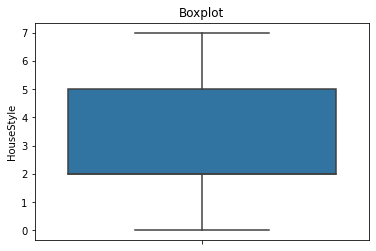

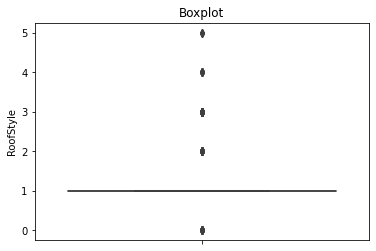

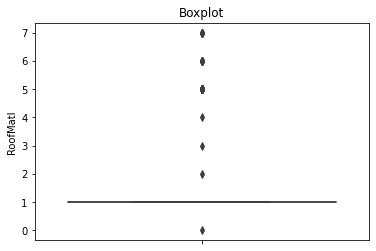

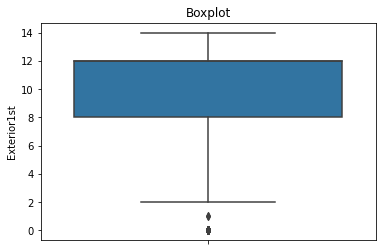

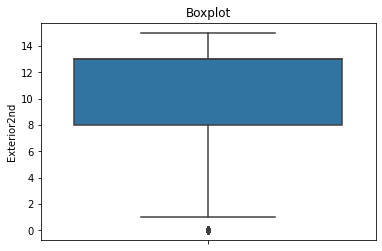

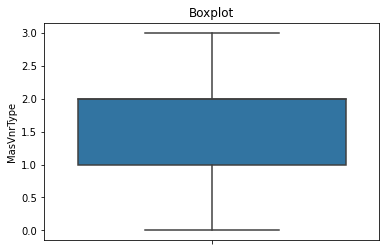

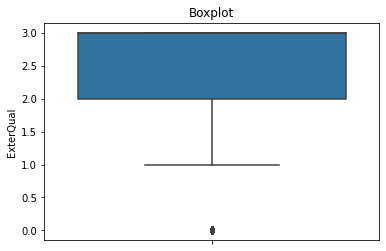

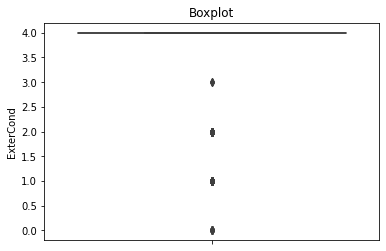

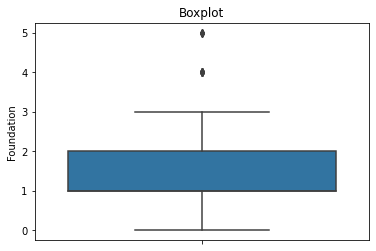

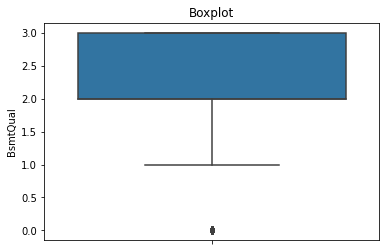

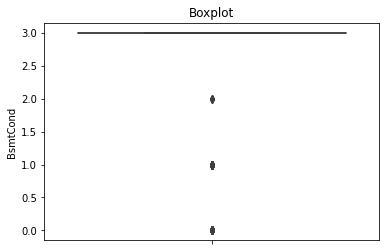

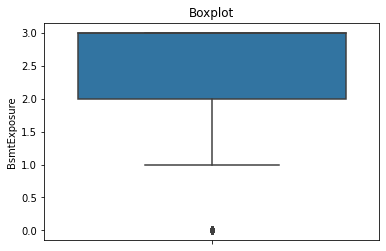

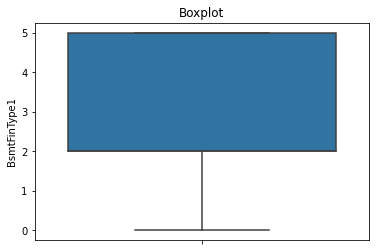

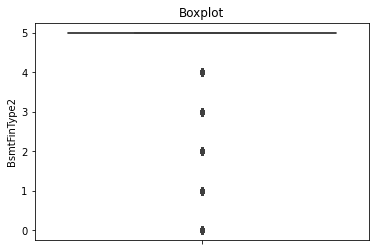

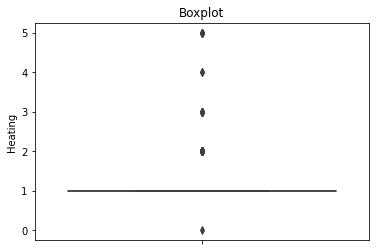

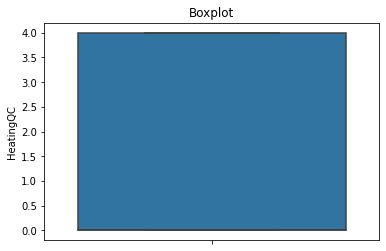

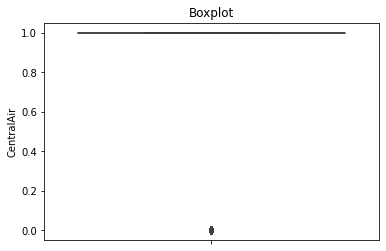

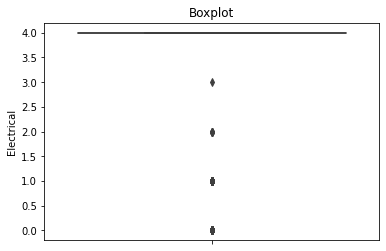

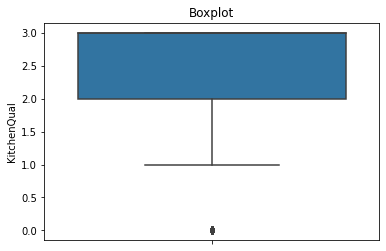

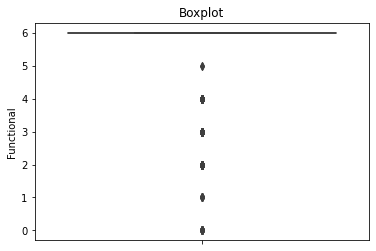

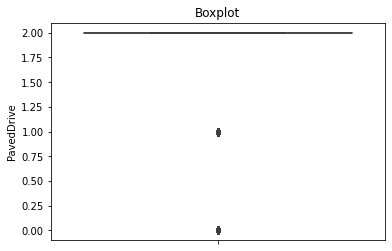

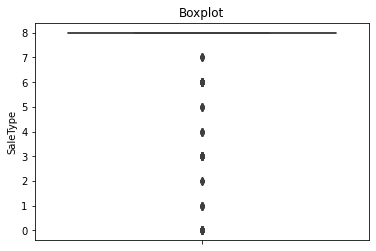

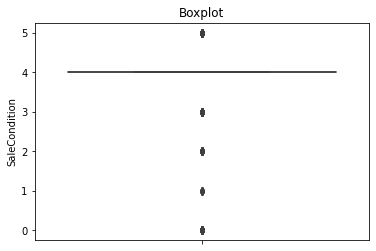

In [ ]:
# Identify the outliers in categorical data in the combined data frame
for feat in categorical_df:
    plt.subplot(1,1,1)
    sns.boxplot(y = combined_df[feat])
    plt.title("Boxplot")
    plt.show()

In [ ]:
# Detect outliers in catgorical data of the combined data set
def detect_outlier(feature):
    outliers = []
    data = combined_df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print(f"\nOutlier caps for {feature}")
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i > data.quantile(.99)])))

In [ ]:
for feat in categorical_df:
    detect_outlier(feat)


Outlier caps for MSZoning
  --95p: 4.0 / 0 values exceed that
  --3sd: 5.0 / 164 values exceed that
  --99p: 4.0 / 0 values exceed that

Outlier caps for Street
  --95p: 1.0 / 0 values exceed that
  --3sd: 1.2 / 12 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for LotShape
  --95p: 3.0 / 0 values exceed that
  --3sd: 6.2 / 0 values exceed that
  --99p: 3.0 / 0 values exceed that

Outlier caps for LandContour
  --95p: 3.0 / 0 values exceed that
  --3sd: 4.9 / 117 values exceed that
  --99p: 3.0 / 0 values exceed that

Outlier caps for Utilities
  --95p: 0.0 / 1 values exceed that
  --3sd: 0.1 / 1 values exceed that
  --99p: 0.0 / 1 values exceed that

Outlier caps for LotConfig
  --95p: 4.0 / 0 values exceed that
  --3sd: 7.9 / 0 values exceed that
  --99p: 4.0 / 0 values exceed that

Outlier caps for LandSlope
  --95p: 0.0 / 141 values exceed that
  --3sd: 0.8 / 141 values exceed that
  --99p: 1.0 / 16 values exceed that

Outlier caps for Neighborhood
  --95p: 2

In [ ]:
# Capping features in combined_df to remove outliers in categorical features

# Upper bounded outliers
for cat in ['Utilities', 'LandSlope', 'BldgType', 'Foundation']:
    combined_df[cat].clip(upper=combined_df[cat].quantile(.95), inplace=True)

# Less lower but more upper bounded outliers
for cat in ['MSZoning','SaleCondition']:
    combined_df[cat].clip(lower = combined_df[cat].quantile(.01), upper = combined_df[cat].quantile(0.99), inplace=True)

# Much lower but less upper bounded outliers
for cat in ['Condition1', 'Condition2','RoofStyle', 'RoofMatl', 'Heating']:
    combined_df[cat].clip(lower = combined_df[cat].quantile(.05), upper = combined_df[cat].quantile(0.95), inplace=True)
      
# Lower bounded outliers    
for cat in ['Street', 'LandContour', 'Exterior1st','Exterior2nd', 'ExterQual', 'ExterCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2','CentralAir', 'Electrical', 'KitchenQual',
            'Functional', 'PavedDrive', 'SaleType']:
    combined_df[cat].clip(lower=combined_df[cat].quantile(.95), inplace=True)

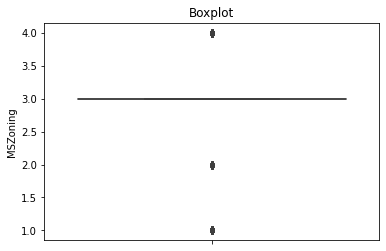

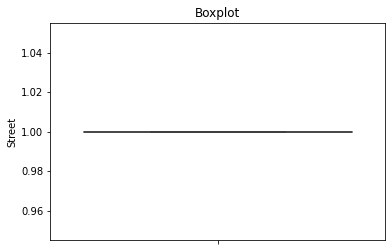

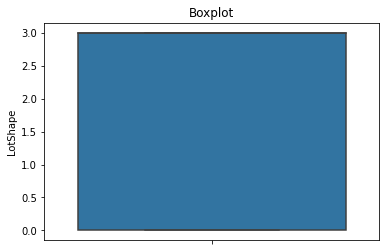

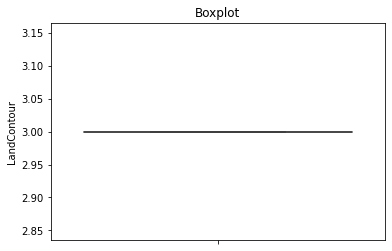

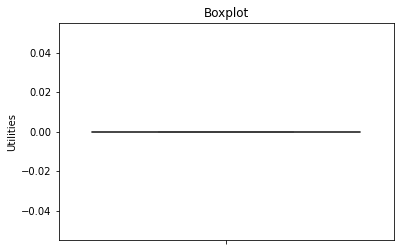

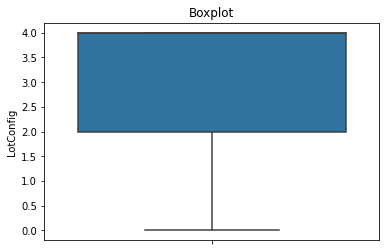

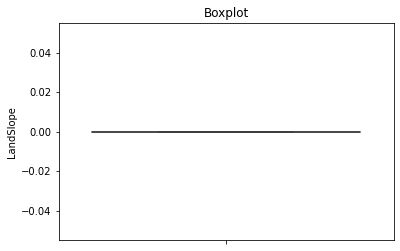

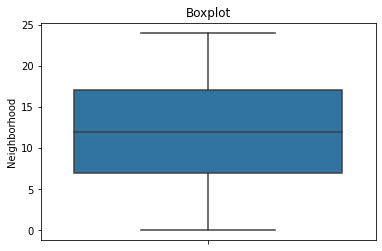

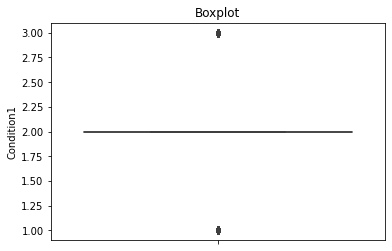

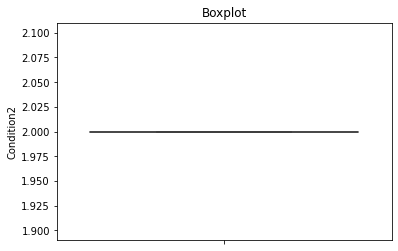

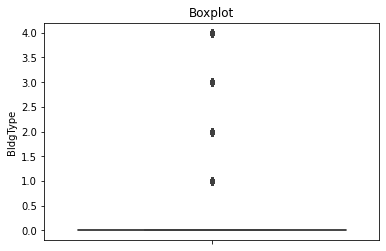

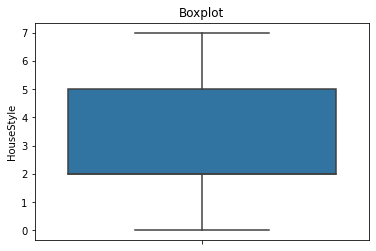

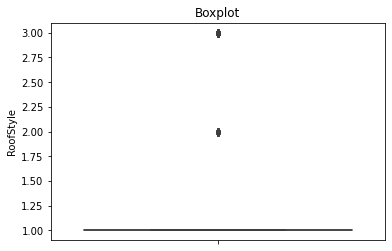

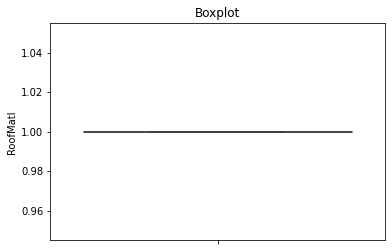

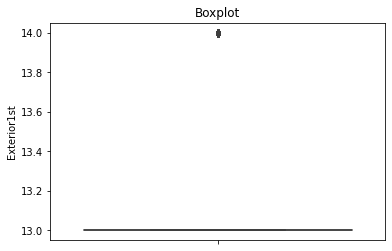

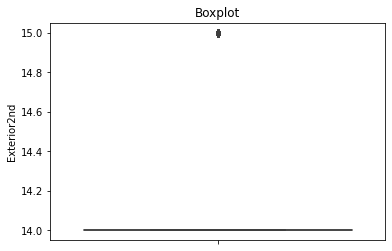

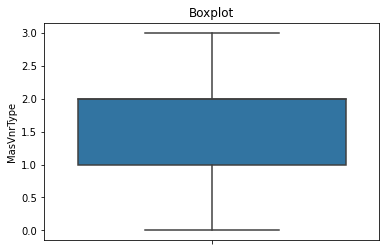

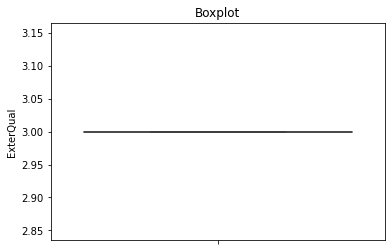

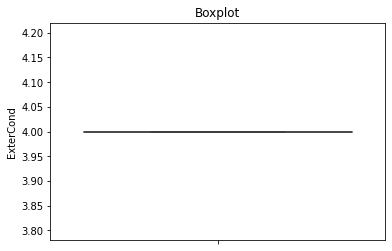

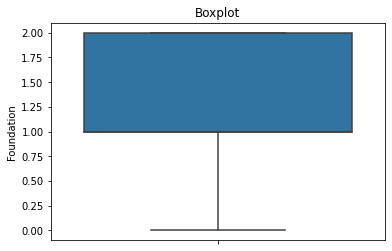

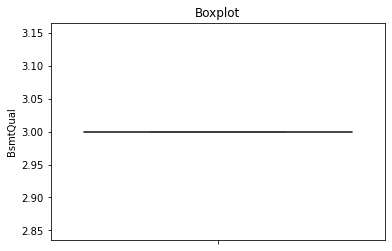

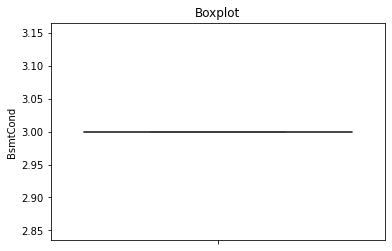

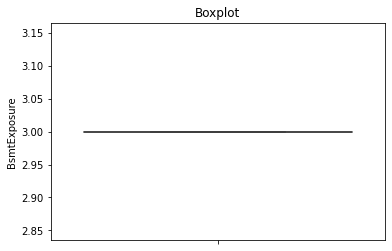

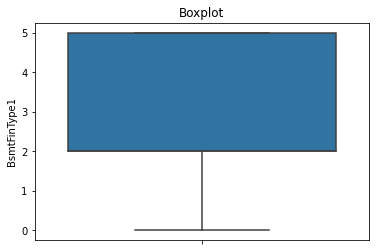

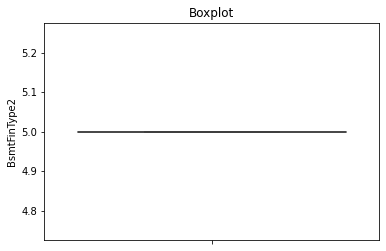

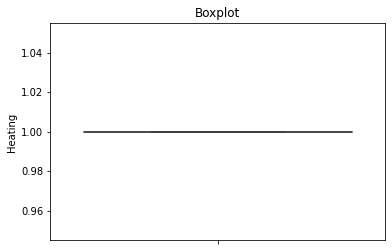

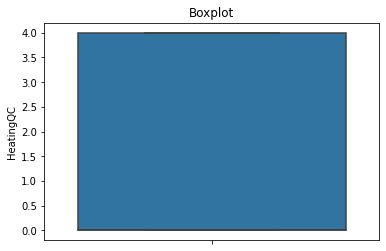

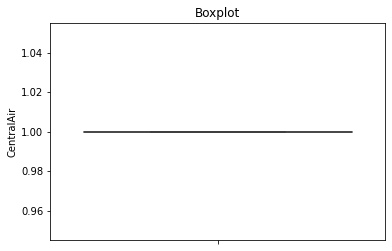

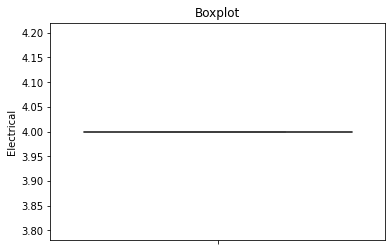

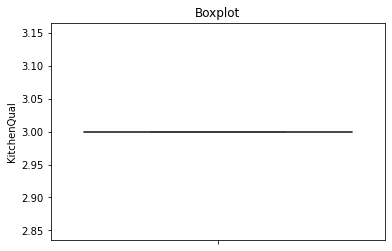

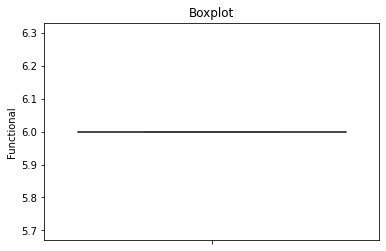

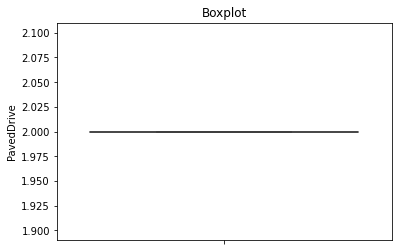

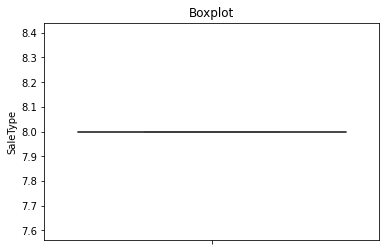

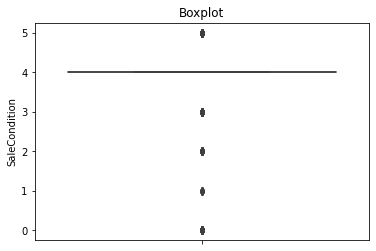

In [ ]:
# Check for the presence of outliers in the categorical data again
for feat in categorical_df:
    plt.subplot(1,1,1)
    sns.boxplot(y = combined_df[feat])
    plt.title("Boxplot")
    plt.show()

In [ ]:
# Identify the skewness in the categorical data
for cat in categorical_df:
    cat_skewed = combined_df[cat].skew()
    print(f"{cat}", cat_skewed)

MSZoning -1.410799715713537
Street 0
LotShape -0.6180074661788829
LandContour 0
Utilities 0
LotConfig -1.1969012059819362
LandSlope 0
Neighborhood 0.01626935770093015
Condition1 -0.40332669089801587
Condition2 0
BldgType 2.1933884721231625
HouseStyle 0.3172593354155327
RoofStyle 1.516308466906074
RoofMatl 0
Exterior1st 7.013922894315169
Exterior2nd 5.75322452698341
MasVnrType -0.07045631083637861
ExterQual 0
ExterCond 0
Foundation -0.5723015745823071
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 -0.0902919570878218
BsmtFinType2 0
Heating 0
HeatingQC 0.48690624436583385
CentralAir 0
Electrical 0
KitchenQual 0
Functional 0
PavedDrive 0
SaleType 0
SaleCondition -2.7894723560144894


In [ ]:
# Correct the skewness in categorical features of the combined data if skewness is greater than 0.3.
for cat in categorical_df:
    cat_skewed = combined_df[cat].skew()
    if (cat_skewed) > 0.3:
        combined_df[cat] = np.log1p(combined_df[cat])

In [ ]:
# Confirm the skewness in the categorical data again
for cat in categorical_df:
    cat_skewed = combined_df[cat].skew()
    print(f"{cat}", cat_skewed)

MSZoning -1.410799715713537
Street 0
LotShape -0.6180074661788829
LandContour 0
Utilities 0
LotConfig -1.1969012059819362
LandSlope 0
Neighborhood 0.01626935770093015
Condition1 -0.40332669089801587
Condition2 0
BldgType 1.9710655816947498
HouseStyle -0.7779733665885056
RoofStyle 1.5087692761500657
RoofMatl 0
Exterior1st 7.013922894315206
Exterior2nd 5.753224526983387
MasVnrType -0.07045631083637861
ExterQual 0
ExterCond 0
Foundation -0.5723015745823071
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 -0.0902919570878218
BsmtFinType2 0
Heating 0
HeatingQC 0.25743617404969776
CentralAir 0
Electrical 0
KitchenQual 0
Functional 0
PavedDrive 0
SaleType 0
SaleCondition -2.7894723560144894


**Feature Engineering**


In [ ]:
# Reconcatenate the data
x_train = combined_df[:len(train_df)]
x_test = combined_df[len(train_df):]

In [ ]:
# Identify the correlations in the numerical data

# Independent variables
X_num = x_train[numerical_df]

# Dependent variable
YY = Y

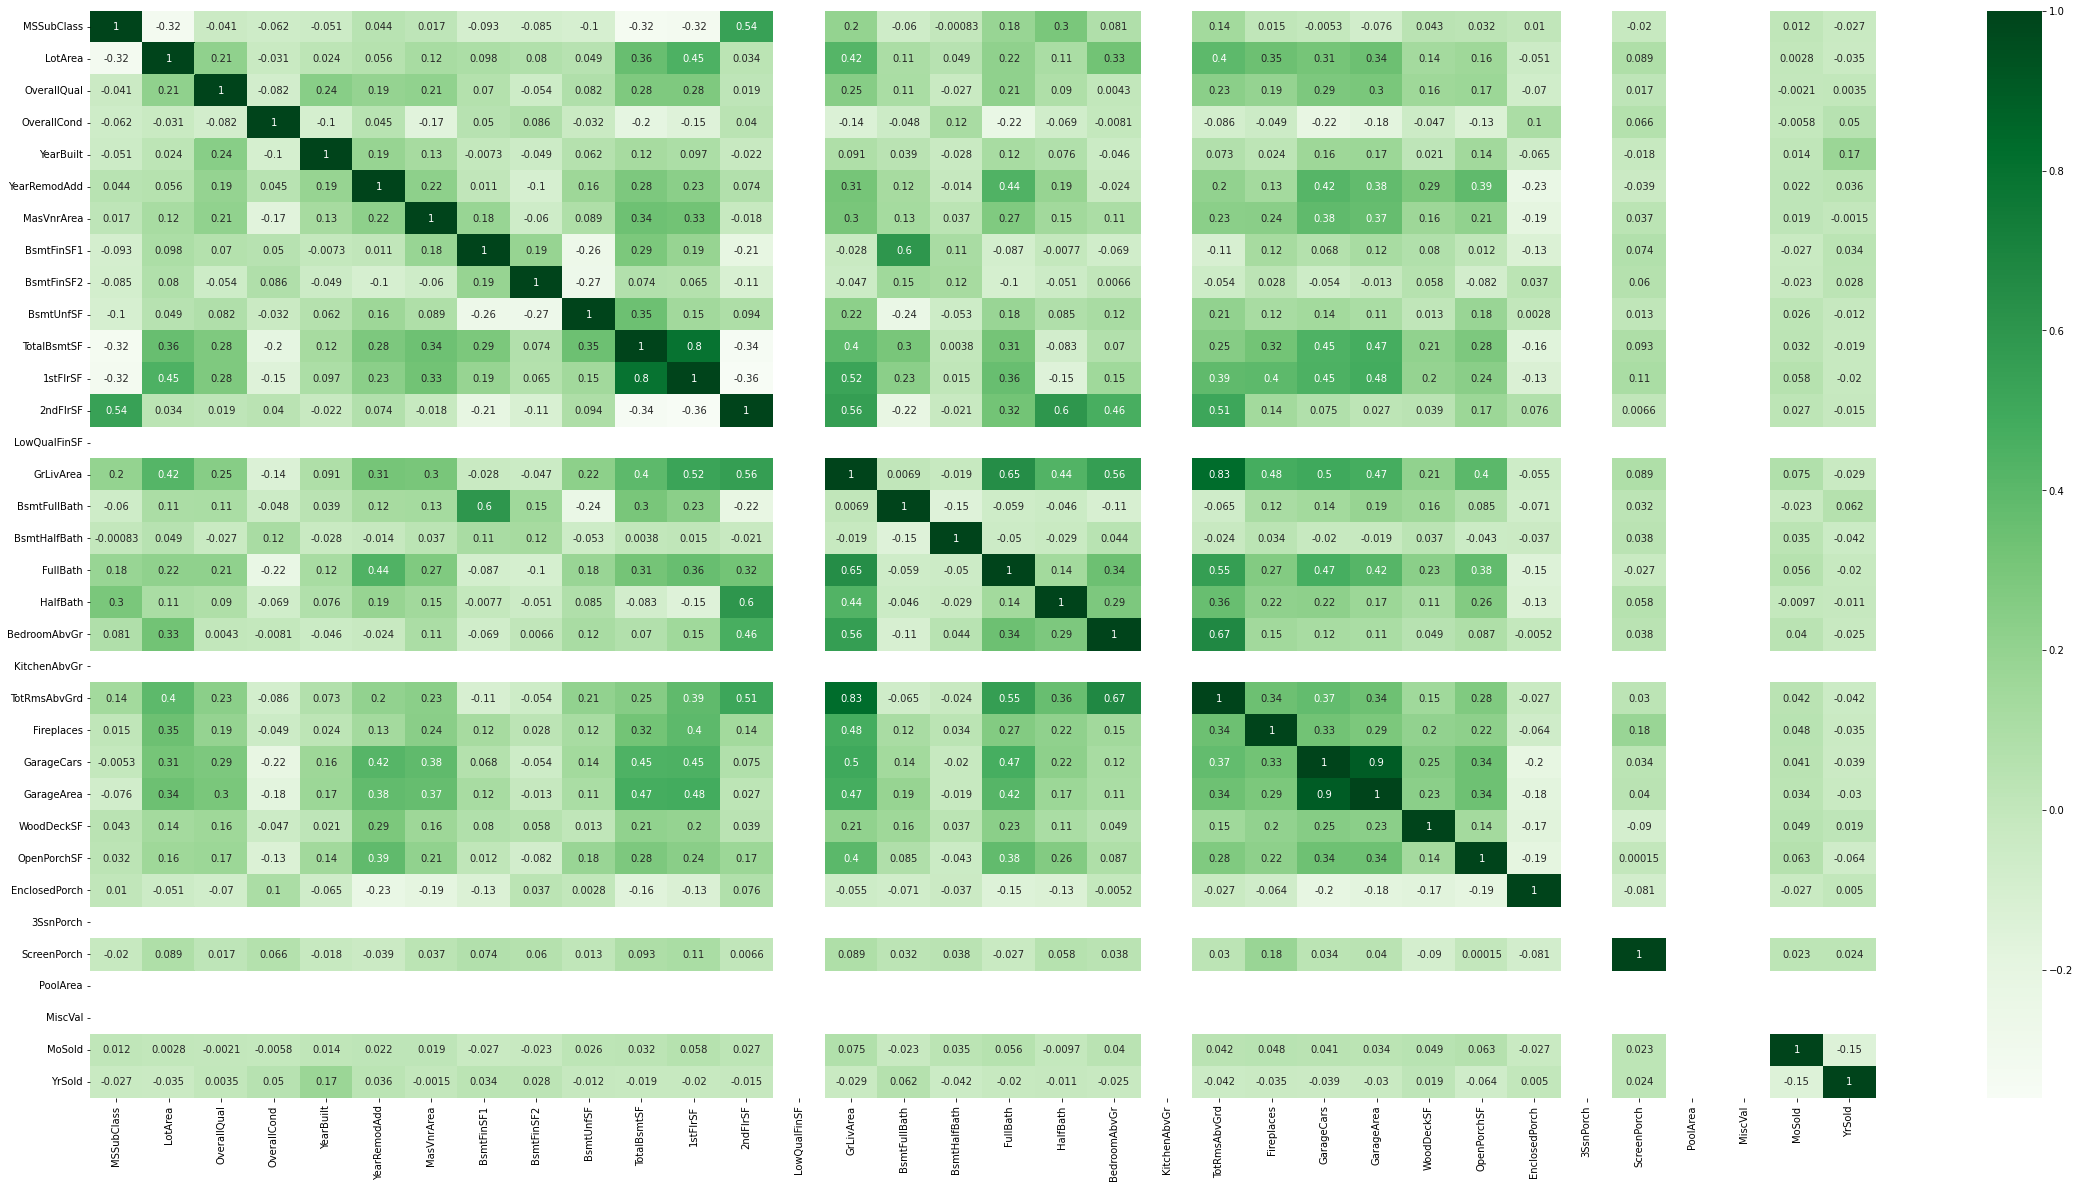

In [ ]:
# Generate a correlation
matrix = X_num.corr()
plt.figure(figsize = [40, 20])
sns.heatmap(matrix, annot = True, cmap = "Greens");

In [ ]:
# Select strong correlations among features
cor_pairs = matrix.unstack()
sorted_pairs = cor_pairs.sort_values(kind = 'quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]

print(strong_pairs)

TotalBsmtSF    1stFlrSF         0.795894
1stFlrSF       TotalBsmtSF      0.795894
TotRmsAbvGrd   GrLivArea        0.826202
GrLivArea      TotRmsAbvGrd     0.826202
GarageArea     GarageCars       0.896274
GarageCars     GarageArea       0.896274
MSSubClass     MSSubClass       1.000000
BsmtFullBath   BsmtFullBath     1.000000
ScreenPorch    ScreenPorch      1.000000
LotArea        LotArea          1.000000
OverallQual    OverallQual      1.000000
OverallCond    OverallCond      1.000000
YearBuilt      YearBuilt        1.000000
YearRemodAdd   YearRemodAdd     1.000000
MasVnrArea     MasVnrArea       1.000000
BsmtFinSF1     BsmtFinSF1       1.000000
BsmtFinSF2     BsmtFinSF2       1.000000
BsmtUnfSF      BsmtUnfSF        1.000000
TotalBsmtSF    TotalBsmtSF      1.000000
1stFlrSF       1stFlrSF         1.000000
MoSold         MoSold           1.000000
2ndFlrSF       2ndFlrSF         1.000000
BsmtHalfBath   BsmtHalfBath     1.000000
FullBath       FullBath         1.000000
HalfBath       H

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Get top pairs
def get_top_abs_correlations(df, n=10):
    corr_list = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    corr_list = corr_list.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_list[0:n]

In [ ]:
# Get top 10 correlation pairs
print('Top 10 correlation pairs:')
get_top_abs_correlations(matrix, 10)

Top 10 correlation pairs:


GarageCars    GarageArea      0.896274
GrLivArea     TotRmsAbvGrd    0.826202
TotalBsmtSF   1stFlrSF        0.795894
BedroomAbvGr  TotRmsAbvGrd    0.672462
GrLivArea     FullBath        0.647550
BsmtFinSF1    BsmtFullBath    0.597364
2ndFlrSF      HalfBath        0.596198
              GrLivArea       0.558675
GrLivArea     BedroomAbvGr    0.555964
FullBath      TotRmsAbvGrd    0.553620
dtype: float64

In [ ]:
# Feature Selection
YY = le.fit_transform(YY)
from sklearn.datasets import make_friedman1
from sklearn.svm import SVR
X_num, YY = make_friedman1(n_samples=1460, n_features=34, random_state=42)
estimator = SVR(kernel="linear")
rfe = RFE(estimator, n_features_to_select=5, step=1)
rfe = rfe.fit(X_num, YY)

In [ ]:
num_cols = x_train[numerical_df].columns
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
# Check the RFE ranking
X_num = pd.DataFrame(X_num, columns = [num_cols])
list(zip(X_num.columns, rfe.support_, rfe.ranking_))

[(('MSSubClass',), True, 1),
 (('LotArea',), True, 1),
 (('OverallQual',), False, 12),
 (('OverallCond',), True, 1),
 (('YearBuilt',), True, 1),
 (('YearRemodAdd',), False, 16),
 (('MasVnrArea',), False, 13),
 (('BsmtFinSF1',), False, 3),
 (('BsmtFinSF2',), False, 8),
 (('BsmtUnfSF',), False, 11),
 (('TotalBsmtSF',), False, 2),
 (('1stFlrSF',), False, 18),
 (('2ndFlrSF',), False, 15),
 (('LowQualFinSF',), False, 25),
 (('GrLivArea',), False, 30),
 (('BsmtFullBath',), True, 1),
 (('BsmtHalfBath',), False, 22),
 (('FullBath',), False, 19),
 (('HalfBath',), False, 20),
 (('BedroomAbvGr',), False, 24),
 (('KitchenAbvGr',), False, 29),
 (('TotRmsAbvGrd',), False, 6),
 (('Fireplaces',), False, 21),
 (('GarageCars',), False, 27),
 (('GarageArea',), False, 5),
 (('WoodDeckSF',), False, 10),
 (('OpenPorchSF',), False, 23),
 (('EnclosedPorch',), False, 26),
 (('3SsnPorch',), False, 17),
 (('ScreenPorch',), False, 7),
 (('PoolArea',), False, 28),
 (('MiscVal',), False, 9),
 (('MoSold',), False, 4

In [ ]:
# Columns selected by RFE
cols = X_num.columns[rfe.support_]
cols

MultiIndex([(  'MSSubClass',),
            (     'LotArea',),
            ( 'OverallCond',),
            (   'YearBuilt',),
            ('BsmtFullBath',)],
           )

In [ ]:
# columns not selected by RFE
X_num.columns[~rfe.support_]

MultiIndex([(  'OverallQual',),
            ( 'YearRemodAdd',),
            (   'MasVnrArea',),
            (   'BsmtFinSF1',),
            (   'BsmtFinSF2',),
            (    'BsmtUnfSF',),
            (  'TotalBsmtSF',),
            (     '1stFlrSF',),
            (     '2ndFlrSF',),
            ( 'LowQualFinSF',),
            (    'GrLivArea',),
            ( 'BsmtHalfBath',),
            (     'FullBath',),
            (     'HalfBath',),
            ( 'BedroomAbvGr',),
            ( 'KitchenAbvGr',),
            ( 'TotRmsAbvGrd',),
            (   'Fireplaces',),
            (   'GarageCars',),
            (   'GarageArea',),
            (   'WoodDeckSF',),
            (  'OpenPorchSF',),
            ('EnclosedPorch',),
            (    '3SsnPorch',),
            (  'ScreenPorch',),
            (     'PoolArea',),
            (      'MiscVal',),
            (       'MoSold',),
            (       'YrSold',)],
           )

In [ ]:
# Generate a pair plot for the selected numerical features
num_vals = x_train[['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'BsmtFullBath', 'TotRmsAbvGrd', 'MoSold']]
num_vals.head()

MSSubClass  LotArea  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  \
0    4.110874   8450.0     1.791759   7.604894    6.561031     6.753438   
1    3.044522   9600.0     2.197225   7.604894    6.886532     7.141245   
2    4.110874  11250.0     1.791759   7.604894    6.188264     6.825460   
3    4.262680   9550.0     1.791759   7.604894    5.379897     6.629363   
4    4.110874  14260.0     1.791759   7.604894    6.486161     7.044033   

   BsmtFullBath  TotRmsAbvGrd  MoSold  
0      0.693147           8.0       2  
1      0.000000           6.0       5  
2      0.693147           6.0       9  
3      0.693147           7.0       2  
4      0.693147           9.0      12

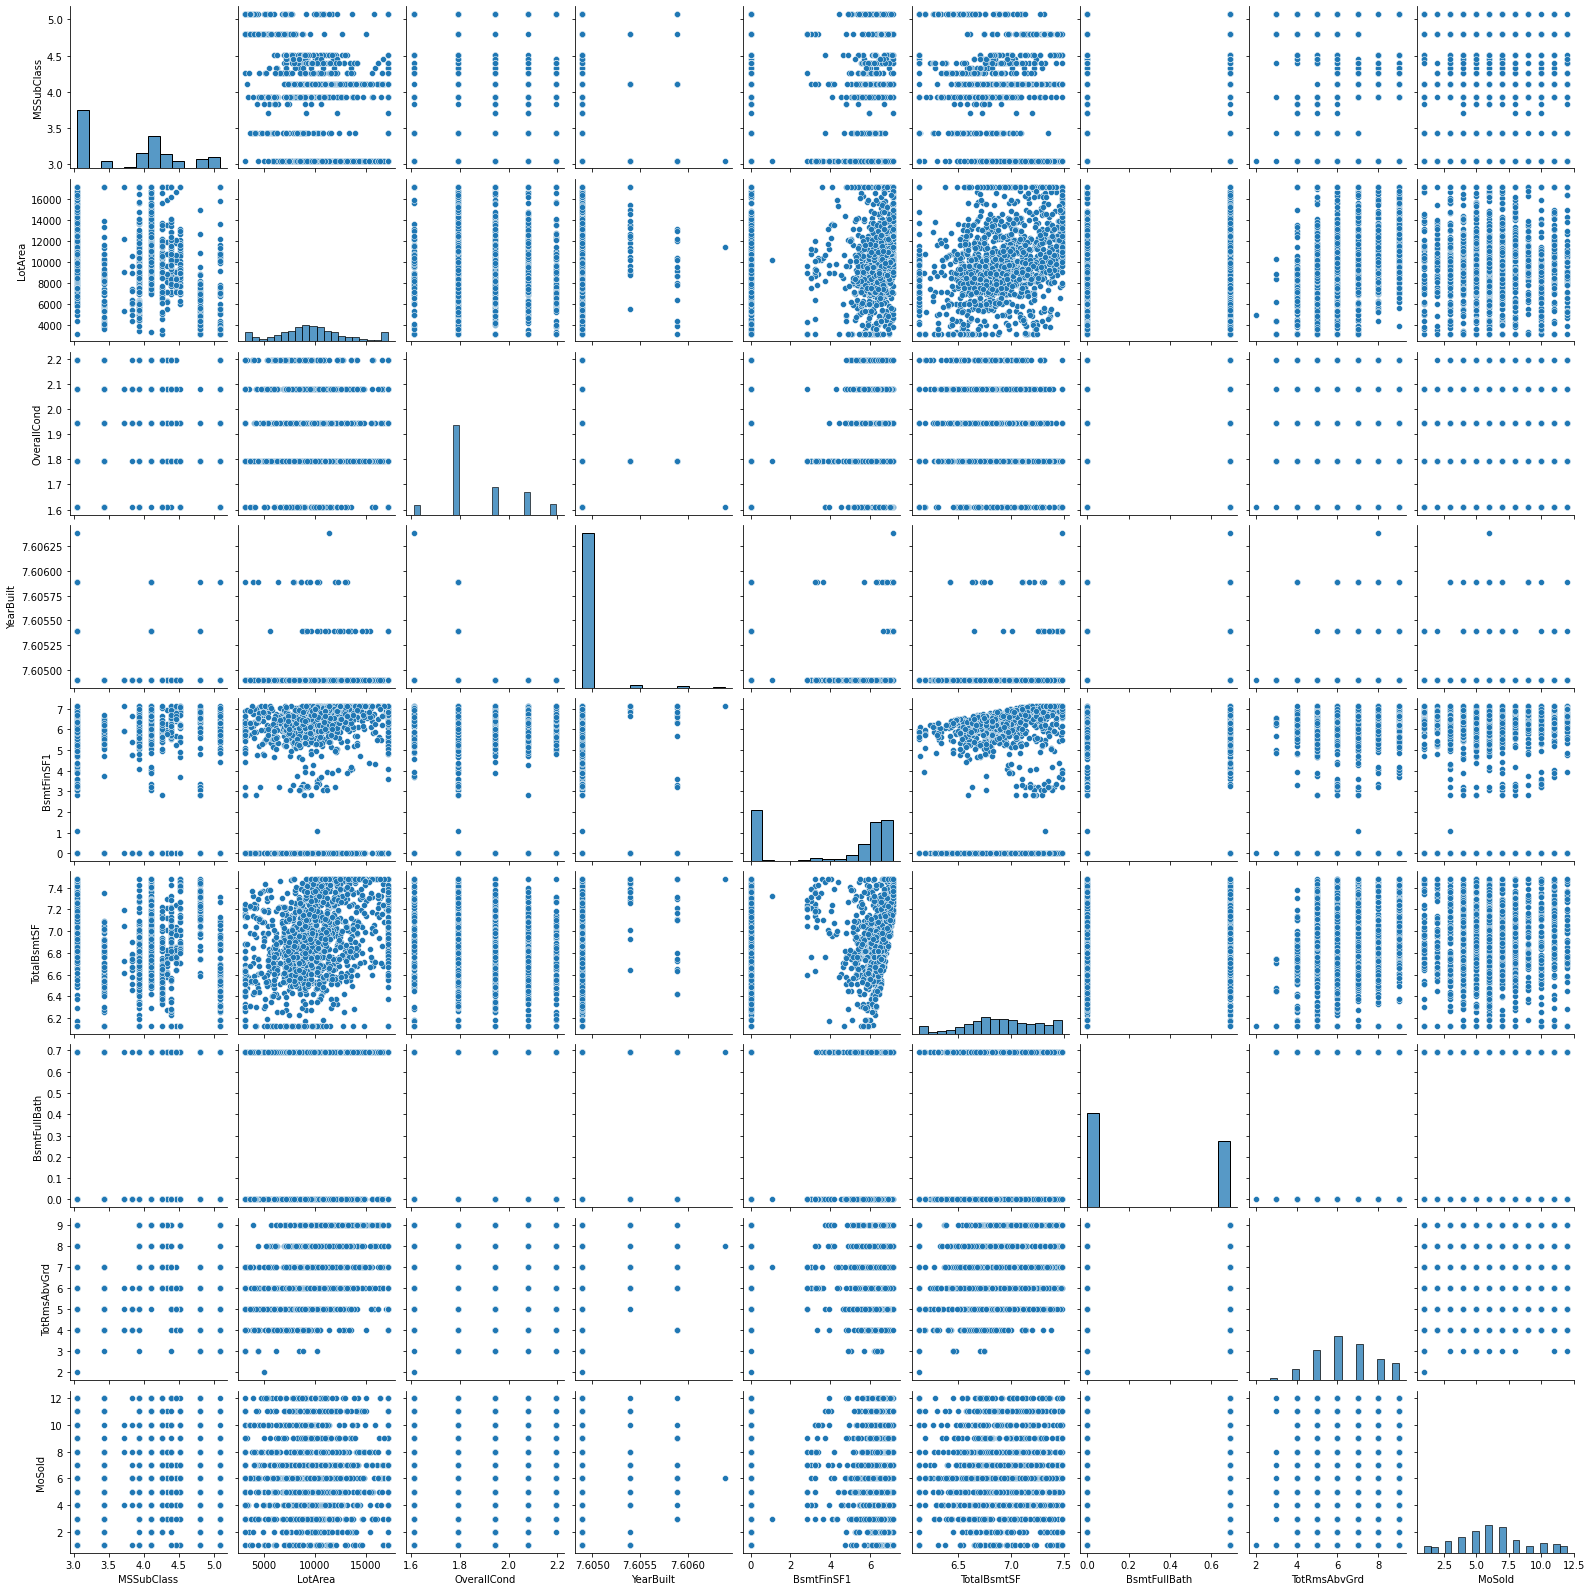

In [ ]:
sns.pairplot(num_vals)

In [ ]:
# Collecting the categorical data
cat_vars = x_train[categorical_df.columns]
Y = pd.DataFrame(Y, columns = ['SalePrice'])

In [ ]:
# Perform the chi test and determine the f score and the p value
f_p_values = chi2(cat_vars, Y.astype('int'))
f_p_values

(array([1.46499522e+01, 0.00000000e+00, 1.13663823e+02, 0.00000000e+00,
                   nan, 3.47365296e+00,            nan, 5.30292443e+01,
        2.88666296e+00, 0.00000000e+00, 1.29853392e+01, 2.65261817e+01,
        5.16611076e-01, 0.00000000e+00, 1.95858683e-04, 2.11675218e-04,
        6.29269669e-01, 0.00000000e+00, 0.00000000e+00, 1.07050372e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27064492e+01,
        0.00000000e+00, 0.00000000e+00, 1.93570853e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.93700114e+01]),
 array([6.58875414e-04, 1.00000000e+00, 2.08072400e-25, 1.00000000e+00,
                   nan, 1.76078303e-01,            nan, 3.05383737e-12,
        2.36139752e-01, 1.00000000e+00, 1.51450050e-03, 1.73745205e-06,
        7.72359211e-01, 1.00000000e+00, 9.99902075e-01, 9.99894168e-01,
        7.30055417e-01, 1.00000000e+00, 1.00000000e+00, 5.67945967e-24,
        1.00000000e+00

In [ ]:
# Representing the p values in list form
p_values = pd.Series(f_p_values[1])
p_values.index = categorical_df.columns
p_values

MSZoning         6.588754e-04
Street           1.000000e+00
LotShape         2.080724e-25
LandContour      1.000000e+00
Utilities                 NaN
LotConfig        1.760783e-01
LandSlope                 NaN
Neighborhood     3.053837e-12
Condition1       2.361398e-01
Condition2       1.000000e+00
BldgType         1.514500e-03
HouseStyle       1.737452e-06
RoofStyle        7.723592e-01
RoofMatl         1.000000e+00
Exterior1st      9.999021e-01
Exterior2nd      9.998942e-01
MasVnrType       7.300554e-01
ExterQual        1.000000e+00
ExterCond        1.000000e+00
Foundation       5.679460e-24
BsmtQual         1.000000e+00
BsmtCond         1.000000e+00
BsmtExposure     1.000000e+00
BsmtFinType1     1.741124e-03
BsmtFinType2     1.000000e+00
Heating          1.000000e+00
HeatingQC        9.260264e-43
CentralAir       1.000000e+00
Electrical       1.000000e+00
KitchenQual      1.000000e+00
Functional       1.000000e+00
PavedDrive       1.000000e+00
SaleType         1.000000e+00
SaleCondit

In [ ]:
# Sorting the p values in ascending order
p_values.sort_values(ascending = True)

HeatingQC        9.260264e-43
LotShape         2.080724e-25
Foundation       5.679460e-24
Neighborhood     3.053837e-12
HouseStyle       1.737452e-06
SaleCondition    6.220932e-05
MSZoning         6.588754e-04
BldgType         1.514500e-03
BsmtFinType1     1.741124e-03
LotConfig        1.760783e-01
Condition1       2.361398e-01
MasVnrType       7.300554e-01
RoofStyle        7.723592e-01
Exterior2nd      9.998942e-01
Exterior1st      9.999021e-01
Condition2       1.000000e+00
PavedDrive       1.000000e+00
Functional       1.000000e+00
KitchenQual      1.000000e+00
Electrical       1.000000e+00
CentralAir       1.000000e+00
Street           1.000000e+00
Heating          1.000000e+00
BsmtCond         1.000000e+00
BsmtExposure     1.000000e+00
BsmtQual         1.000000e+00
LandContour      1.000000e+00
ExterCond        1.000000e+00
SaleType         1.000000e+00
RoofMatl         1.000000e+00
BsmtFinType2     1.000000e+00
ExterQual        1.000000e+00
Utilities                 NaN
LandSlope 

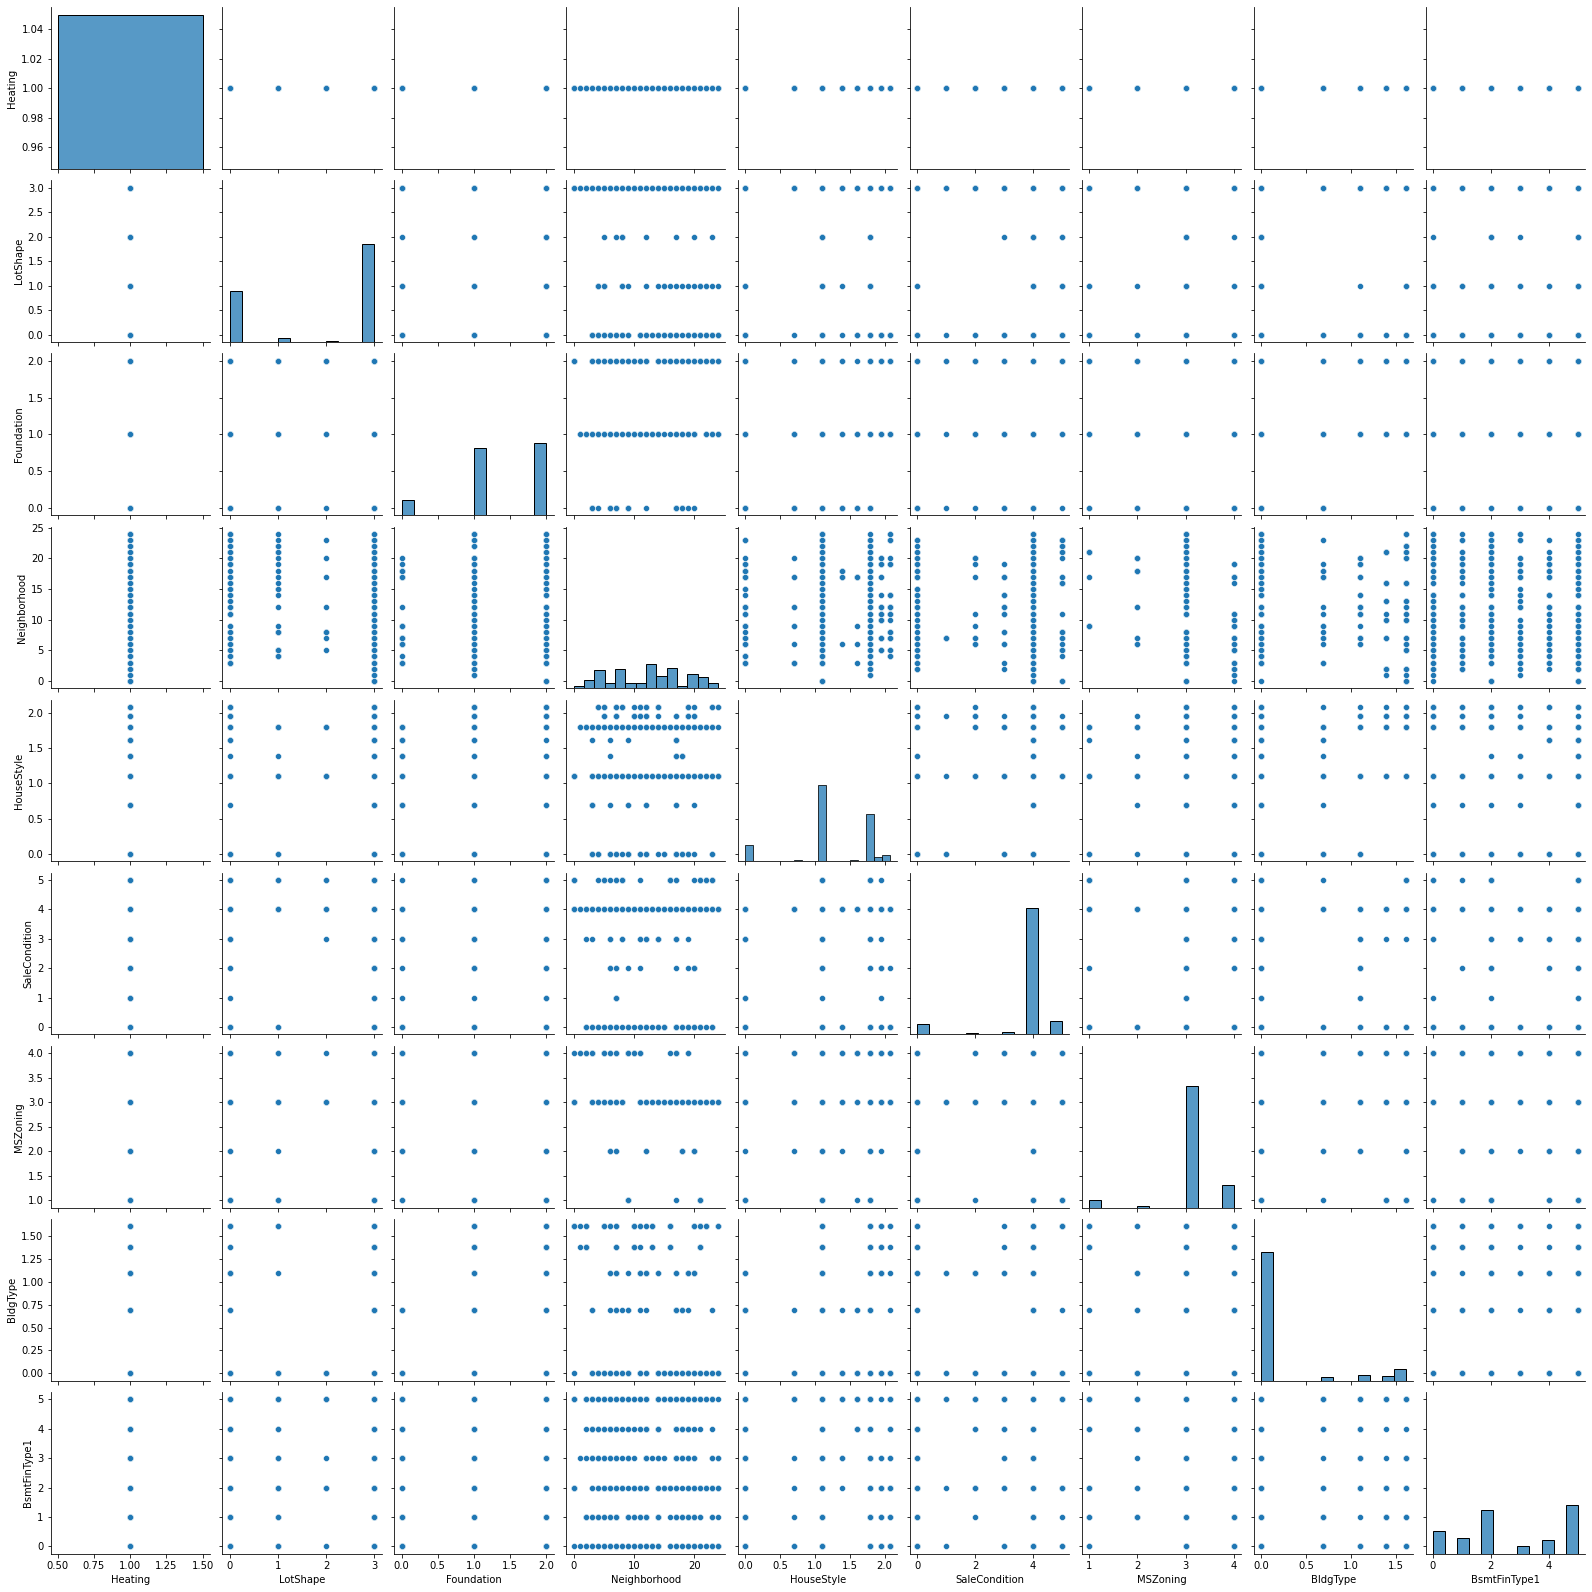

In [ ]:
# Plot a pair plot for categorical data
selected_cats = x_train[['Heating', 'LotShape', 'Foundation', 'Neighborhood', 'HouseStyle', 'SaleCondition', 
                        'MSZoning', 'BldgType', 'BsmtFinType1']]
sns.pairplot(selected_cats)

In [ ]:
# Compile separately the selected data for train and test sets
selected_train = pd.concat([num_vals, selected_cats], axis = 1)
selected_test = pd.concat([x_test[num_vals.columns], x_test[selected_cats.columns]], axis = 1)

In [ ]:
# Check the shape of the selected train data
x_train = selected_train
x_train.shape

(1460, 18)

In [ ]:
# Check the shape of the target variable
y_train = Y
y_train.shape

(1460, 1)

In [ ]:
# Check the shape of the selected test data
x_test = selected_test
x_test.shape

(1459, 18)

**Data Training**

In [ ]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(5, shuffle = True, random_state = 4).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, selected_train, Y, scoring = "neg_mean_squared_error", cv = kf))
    return(rmse)
def rmse_CV_test(model):
    kf = KFold(5, shuffle = True, random_state = 4).get_n_splits(train_df.value)
    rmse = np.sqrt(-cross_val_score(model, x_test, y_test, scoring = "neg_mean_squared_error", cv = kf))
    return (rmse)

In [ ]:
import xgboost as XGB
the_model = XGB.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, learning_rate = 0.05, max_depth = 3,
                            min_child_weight = 1.7817, n_estimators = 2200, reg_alpha = 0.4640, reg_lambda = 0.8571,
                            subsample = 0.5213, random_state = 7, nthread = -1)
the_model.fit(x_train, y_train)

[15:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
             min_child_weight=1.7817, n_estimators=2200, nthread=-1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             subsample=0.5213)

Prediksi

In [ ]:
y_pred = np.floor(np.expm1(the_model.predict(x_test)))
y_pred

array([120636., 176919., 186731., ..., 196878., 153769., 209361.],
      dtype=float32)

Jadikan csv

In [ ]:
submission_df = pd.DataFrame()
submission_df['Id'] = test_df['Id']
submission_df['SalePrice'] = y_pred
submission_df.to_csv('submission_data.csv', index=False)

In [ ]:
#Cek Hasil 

hasil = pd.read_csv('/content/submission_data.csv')

In [ ]:
hasil

Id  SalePrice
0     1461   120636.0
1     1462   176919.0
2     1463   186731.0
3     1464   206889.0
4     1465   189820.0
...    ...        ...
1454  2915    95046.0
1455  2916    91828.0
1456  2917   196878.0
1457  2918   153769.0
1458  2919   209361.0

[1459 rows x 2 columns]